In [ ]:
# Connect Google Drive and import libraries
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

data_directory = '/content/drive/MyDrive/Colab Notebooks/DataFruits'

def list_files(directory):
    filepaths = []
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg'):
                filepaths.append(os.path.join(root, filename))
    return filepaths

# List image files in training, test, and validation directories
train_filepaths = list_files(os.path.join(data_directory, 'train'))
test_filepaths = list_files(os.path.join(data_directory, 'test'))
val_filepaths = list_files(os.path.join(data_directory, 'validation'))

def image_processing(filepath):
    labels = [str(filepath[i]).split("/")[-2] for i in range(len(filepath))]
    filepath_series = pd.Series(filepath, name='Filepath').astype(str)
    labels_series = pd.Series(labels, name='Label')
    df = pd.concat([filepath_series, labels_series], axis=1)
    df = df.sample(frac=1).reset_index(drop=True)
    return df
# Create DataFrame for training, test, and validation sets
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')
train_df.head(5)


Mounted at /content/drive
-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['ginger' 'orange' 'kiwi' 'tomato' 'bell pepper' 'cauliflower'
 'watermelon' 'sweetpotato' 'chilli pepper' 'garlic' 'lettuce' 'lemon'
 'apple' 'grapes' 'sweetcorn' 'carrot' 'paprika' 'raddish' 'spinach'
 'eggplant' 'cucumber' 'potato' 'peas' 'soy beans' 'corn' 'beetroot'
 'banana' 'capsicum' 'jalepeno' 'pineapple' 'pomegranate' 'mango' 'pear'
 'turnip' 'cabbage' 'onion']


,Filepath,Label
0,/content/drive/MyDrive/Colab Notebooks/DataFru...,ginger
1,/content/drive/MyDrive/Colab Notebooks/DataFru...,orange
2,/content/drive/MyDrive/Colab Notebooks/DataFru...,kiwi
3,/content/drive/MyDrive/Colab Notebooks/DataFru...,tomato
4,/content/drive/MyDrive/Colab Notebooks/DataFru...,bell pepper


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Load pre-trained MobileNetV2 model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
# Function to extract features from images
def extract_features(filepaths, model, size=(224, 224)):
    features = []
    for filepath in tqdm(filepaths):
        img = load_img(filepath, target_size=size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
        features.append(model.predict(img_array)[0])
    return np.array(features)

# Extract features for train, validation, and test sets
train_features = extract_features(train_df['Filepath'], pretrained_model)
val_features = extract_features(val_df['Filepath'], pretrained_model)
test_features = extract_features(test_df['Filepath'], pretrained_model)


9406464/9406464 [==============================] - 0s 0us/step


  0%|          | 0/2780 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/2780 [00:02<1:44:25,  2.25s/it]

1/1 [==============================] - 0s 50ms/step


  0%|          | 2/2780 [00:02<58:52,  1.27s/it]  

1/1 [==============================] - 0s 52ms/step


  0%|          | 3/2780 [00:03<43:46,  1.06it/s]

1/1 [==============================] - 0s 49ms/step


  0%|          | 4/2780 [00:03<34:39,  1.33it/s]

1/1 [==============================] - 0s 60ms/step


  0%|          | 5/2780 [00:04<37:40,  1.23it/s]

1/1 [==============================] - 0s 45ms/step


  0%|          | 6/2780 [00:05<30:37,  1.51it/s]

1/1 [==============================] - 0s 47ms/step


  0%|          | 7/2780 [00:05<29:42,  1.56it/s]

1/1 [==============================] - 0s 47ms/step


  0%|          | 8/2780 [00:07<46:13,  1.00s/it]

1/1 [==============================] - 0s 47ms/step


  0%|          | 9/2780 [00:08<39:06,  1.18it/s]

1/1 [==============================] - 0s 48ms/step


  0%|          | 10/2780 [00:08<33:04,  1.40it/s]

1/1 [==============================] - 0s 44ms/step


  0%|          | 11/2780 [00:08<30:30,  1.51it/s]

1/1 [==============================] - 0s 47ms/step


  0%|          | 12/2780 [00:09<26:45,  1.72it/s]

1/1 [==============================] - 0s 46ms/step


  0%|          | 13/2780 [00:09<23:39,  1.95it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 14/2780 [00:10<23:23,  1.97it/s]

1/1 [==============================] - 0s 152ms/step


  1%|          | 15/2780 [00:10<26:22,  1.75it/s]

1/1 [==============================] - 0s 47ms/step


  1%|          | 16/2780 [00:11<23:05,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 17/2780 [00:11<22:38,  2.03it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 18/2780 [00:12<21:25,  2.15it/s]

1/1 [==============================] - 0s 70ms/step


  1%|          | 19/2780 [00:12<22:40,  2.03it/s]

1/1 [==============================] - 0s 86ms/step


  1%|          | 20/2780 [00:13<21:04,  2.18it/s]

1/1 [==============================] - 0s 70ms/step


  1%|          | 21/2780 [00:13<21:25,  2.15it/s]

1/1 [==============================] - 0s 79ms/step


  1%|          | 22/2780 [00:14<21:18,  2.16it/s]

1/1 [==============================] - 0s 69ms/step


  1%|          | 23/2780 [00:14<21:44,  2.11it/s]

1/1 [==============================] - 0s 78ms/step


  1%|          | 24/2780 [00:15<22:38,  2.03it/s]

1/1 [==============================] - 0s 73ms/step


  1%|          | 25/2780 [00:15<21:13,  2.16it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 26/2780 [00:15<21:16,  2.16it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 27/2780 [00:16<19:35,  2.34it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 28/2780 [00:16<19:22,  2.37it/s]

1/1 [==============================] - 0s 58ms/step


  1%|          | 29/2780 [00:17<19:10,  2.39it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 30/2780 [00:17<18:37,  2.46it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 31/2780 [00:17<18:32,  2.47it/s]

1/1 [==============================] - 0s 70ms/step


  1%|          | 32/2780 [00:18<20:41,  2.21it/s]

1/1 [==============================] - 0s 67ms/step


  1%|          | 33/2780 [00:19<26:14,  1.74it/s]

1/1 [==============================] - 0s 85ms/step


  1%|          | 34/2780 [00:19<24:52,  1.84it/s]

1/1 [==============================] - 0s 45ms/step


  1%|▏         | 35/2780 [00:20<25:47,  1.77it/s]

1/1 [==============================] - 0s 43ms/step


  1%|▏         | 36/2780 [00:20<23:15,  1.97it/s]

1/1 [==============================] - 0s 74ms/step


  1%|▏         | 37/2780 [00:21<23:22,  1.96it/s]

1/1 [==============================] - 0s 48ms/step


  1%|▏         | 38/2780 [00:21<17:58,  2.54it/s]

1/1 [==============================] - 0s 44ms/step


  1%|▏         | 39/2780 [00:21<13:57,  3.27it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▏         | 40/2780 [00:22<17:56,  2.54it/s]

1/1 [==============================] - 0s 45ms/step


  1%|▏         | 41/2780 [00:22<23:34,  1.94it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 42/2780 [00:23<25:01,  1.82it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 43/2780 [00:23<23:29,  1.94it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▏         | 44/2780 [00:24<21:08,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 45/2780 [00:24<20:12,  2.26it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 46/2780 [00:25<19:39,  2.32it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 47/2780 [00:25<19:37,  2.32it/s]

1/1 [==============================] - 0s 71ms/step


  2%|▏         | 48/2780 [00:25<19:03,  2.39it/s]

1/1 [==============================] - 0s 85ms/step


  2%|▏         | 49/2780 [00:26<19:21,  2.35it/s]

1/1 [==============================] - 0s 70ms/step


  2%|▏         | 50/2780 [00:26<22:03,  2.06it/s]

1/1 [==============================] - 0s 72ms/step


  2%|▏         | 51/2780 [00:27<21:55,  2.07it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 52/2780 [00:27<21:08,  2.15it/s]

1/1 [==============================] - 0s 82ms/step


  2%|▏         | 53/2780 [00:28<23:22,  1.94it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 54/2780 [00:28<22:41,  2.00it/s]

1/1 [==============================] - 0s 57ms/step


  2%|▏         | 55/2780 [00:29<22:19,  2.03it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 56/2780 [00:30<23:24,  1.94it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 57/2780 [00:30<23:16,  1.95it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 58/2780 [00:31<23:34,  1.92it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 59/2780 [00:31<17:53,  2.53it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 60/2780 [00:31<18:54,  2.40it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 61/2780 [00:32<22:08,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 62/2780 [00:32<21:14,  2.13it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 63/2780 [00:33<20:16,  2.23it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 64/2780 [00:34<26:36,  1.70it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 65/2780 [00:34<23:22,  1.94it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 66/2780 [00:34<22:03,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 67/2780 [00:35<22:09,  2.04it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▏         | 68/2780 [00:35<21:29,  2.10it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 69/2780 [00:36<26:05,  1.73it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 70/2780 [00:37<29:13,  1.55it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 71/2780 [00:37<26:38,  1.70it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 72/2780 [00:38<24:08,  1.87it/s]

1/1 [==============================] - 0s 84ms/step


  3%|▎         | 73/2780 [00:38<25:47,  1.75it/s]

1/1 [==============================] - 0s 75ms/step


  3%|▎         | 74/2780 [00:39<25:52,  1.74it/s]

1/1 [==============================] - 0s 78ms/step


  3%|▎         | 75/2780 [00:39<24:17,  1.86it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 76/2780 [00:40<24:56,  1.81it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 77/2780 [00:40<23:48,  1.89it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 78/2780 [00:41<25:57,  1.74it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 79/2780 [00:42<23:19,  1.93it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 80/2780 [00:42<22:10,  2.03it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 81/2780 [00:42<21:25,  2.10it/s]

1/1 [==============================] - 0s 49ms/step


  3%|▎         | 82/2780 [00:43<21:36,  2.08it/s]

1/1 [==============================] - 0s 67ms/step


  3%|▎         | 83/2780 [00:43<20:42,  2.17it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 84/2780 [00:44<20:28,  2.19it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 85/2780 [00:45<25:04,  1.79it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 86/2780 [00:45<23:09,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 87/2780 [00:45<17:46,  2.53it/s]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 88/2780 [00:46<18:48,  2.39it/s]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 89/2780 [00:46<18:29,  2.43it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 90/2780 [00:46<18:57,  2.36it/s]

1/1 [==============================] - 0s 52ms/step


  3%|▎         | 91/2780 [00:47<26:04,  1.72it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 92/2780 [00:48<23:52,  1.88it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 93/2780 [00:48<21:36,  2.07it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 94/2780 [00:48<19:38,  2.28it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 95/2780 [00:49<18:58,  2.36it/s]

1/1 [==============================] - 0s 54ms/step


  3%|▎         | 96/2780 [00:49<20:52,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 97/2780 [00:50<19:49,  2.26it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 98/2780 [00:50<20:46,  2.15it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▎         | 99/2780 [00:51<19:54,  2.25it/s]

1/1 [==============================] - 0s 62ms/step


  4%|▎         | 100/2780 [00:51<19:08,  2.33it/s]

1/1 [==============================] - 0s 71ms/step


  4%|▎         | 101/2780 [00:52<18:56,  2.36it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▎         | 102/2780 [00:52<21:38,  2.06it/s]

1/1 [==============================] - 0s 70ms/step


  4%|▎         | 103/2780 [00:53<21:39,  2.06it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▎         | 104/2780 [00:54<26:54,  1.66it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 105/2780 [00:54<27:54,  1.60it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 106/2780 [00:55<32:40,  1.36it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 107/2780 [00:56<30:21,  1.47it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 108/2780 [00:56<26:59,  1.65it/s]

1/1 [==============================] - 0s 54ms/step


  4%|▍         | 109/2780 [00:57<25:08,  1.77it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 110/2780 [00:57<22:41,  1.96it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 111/2780 [00:58<25:09,  1.77it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 112/2780 [00:58<23:39,  1.88it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 113/2780 [00:59<24:15,  1.83it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 114/2780 [00:59<24:13,  1.83it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 115/2780 [01:00<21:30,  2.06it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▍         | 116/2780 [01:00<20:45,  2.14it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 117/2780 [01:01<20:30,  2.16it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 118/2780 [01:01<20:56,  2.12it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 119/2780 [01:01<20:33,  2.16it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 120/2780 [01:02<20:00,  2.22it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 121/2780 [01:02<20:26,  2.17it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 122/2780 [01:03<21:38,  2.05it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 123/2780 [01:03<20:15,  2.19it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 124/2780 [01:04<18:46,  2.36it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 125/2780 [01:04<19:02,  2.32it/s]

1/1 [==============================] - 0s 70ms/step


  5%|▍         | 126/2780 [01:05<21:20,  2.07it/s]

1/1 [==============================] - 0s 75ms/step


  5%|▍         | 127/2780 [01:05<22:08,  2.00it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▍         | 128/2780 [01:06<20:57,  2.11it/s]

1/1 [==============================] - 0s 71ms/step


  5%|▍         | 129/2780 [01:06<20:22,  2.17it/s]

1/1 [==============================] - 0s 69ms/step


  5%|▍         | 130/2780 [01:07<20:32,  2.15it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 131/2780 [01:07<23:15,  1.90it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 132/2780 [01:08<27:54,  1.58it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 133/2780 [01:09<25:08,  1.75it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 134/2780 [01:09<23:42,  1.86it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 135/2780 [01:09<22:05,  2.00it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 136/2780 [01:10<20:34,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 137/2780 [01:10<19:20,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 138/2780 [01:11<21:12,  2.08it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 139/2780 [01:11<20:17,  2.17it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 140/2780 [01:12<20:51,  2.11it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 141/2780 [01:12<16:18,  2.70it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 142/2780 [01:12<17:17,  2.54it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 143/2780 [01:13<20:03,  2.19it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 144/2780 [01:13<19:23,  2.27it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 145/2780 [01:14<19:26,  2.26it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 146/2780 [01:14<19:46,  2.22it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 147/2780 [01:15<19:30,  2.25it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 148/2780 [01:15<20:36,  2.13it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▌         | 149/2780 [01:16<22:22,  1.96it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 150/2780 [01:16<23:18,  1.88it/s]

1/1 [==============================] - 0s 77ms/step


  5%|▌         | 151/2780 [01:17<28:07,  1.56it/s]

1/1 [==============================] - 0s 79ms/step


  5%|▌         | 152/2780 [01:18<34:19,  1.28it/s]

1/1 [==============================] - 0s 77ms/step


  6%|▌         | 153/2780 [01:19<33:15,  1.32it/s]

1/1 [==============================] - 0s 76ms/step


  6%|▌         | 154/2780 [01:20<38:30,  1.14it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 155/2780 [01:21<31:48,  1.38it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 156/2780 [01:21<30:50,  1.42it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 157/2780 [01:22<29:03,  1.50it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 158/2780 [01:22<27:02,  1.62it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 159/2780 [01:23<26:19,  1.66it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 160/2780 [01:23<25:02,  1.74it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 161/2780 [01:24<24:27,  1.78it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 162/2780 [01:24<23:43,  1.84it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 163/2780 [01:25<24:35,  1.77it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 164/2780 [01:25<21:32,  2.02it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 165/2780 [01:26<21:03,  2.07it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 166/2780 [01:26<19:50,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 167/2780 [01:27<20:08,  2.16it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 168/2780 [01:27<21:48,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 169/2780 [01:28<21:05,  2.06it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 170/2780 [01:28<19:32,  2.23it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 171/2780 [01:29<19:40,  2.21it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 172/2780 [01:29<18:36,  2.34it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 173/2780 [01:29<18:17,  2.38it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▋         | 174/2780 [01:30<20:39,  2.10it/s]

1/1 [==============================] - 0s 101ms/step


  6%|▋         | 175/2780 [01:30<20:38,  2.10it/s]

1/1 [==============================] - 0s 75ms/step


  6%|▋         | 176/2780 [01:31<20:15,  2.14it/s]

1/1 [==============================] - 0s 78ms/step


  6%|▋         | 177/2780 [01:31<20:19,  2.13it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▋         | 178/2780 [01:32<19:30,  2.22it/s]

1/1 [==============================] - 0s 76ms/step


  6%|▋         | 179/2780 [01:32<20:04,  2.16it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▋         | 180/2780 [01:33<20:56,  2.07it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 181/2780 [01:33<22:21,  1.94it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 182/2780 [01:34<21:58,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 183/2780 [01:34<23:15,  1.86it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 184/2780 [01:35<23:38,  1.83it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 185/2780 [01:35<21:47,  1.98it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 186/2780 [01:36<20:03,  2.16it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 187/2780 [01:36<18:50,  2.29it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 188/2780 [01:37<19:11,  2.25it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 189/2780 [01:37<21:18,  2.03it/s]

1/1 [==============================] - 0s 58ms/step


  7%|▋         | 190/2780 [01:38<19:40,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 191/2780 [01:38<19:52,  2.17it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 192/2780 [01:38<17:49,  2.42it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 193/2780 [01:39<18:11,  2.37it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 194/2780 [01:39<20:54,  2.06it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 195/2780 [01:40<21:35,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 196/2780 [01:41<22:06,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 197/2780 [01:41<20:48,  2.07it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 198/2780 [01:41<21:15,  2.02it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 199/2780 [01:42<20:26,  2.10it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 200/2780 [01:42<19:08,  2.25it/s]

1/1 [==============================] - 0s 59ms/step


  7%|▋         | 201/2780 [01:43<18:59,  2.26it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 202/2780 [01:43<18:57,  2.27it/s]

1/1 [==============================] - 0s 76ms/step


  7%|▋         | 203/2780 [01:44<18:54,  2.27it/s]

1/1 [==============================] - 0s 79ms/step


  7%|▋         | 204/2780 [01:45<25:31,  1.68it/s]

1/1 [==============================] - 0s 69ms/step


  7%|▋         | 205/2780 [01:45<24:37,  1.74it/s]

1/1 [==============================] - 0s 71ms/step


  7%|▋         | 206/2780 [01:46<23:29,  1.83it/s]

1/1 [==============================] - 0s 68ms/step


  7%|▋         | 207/2780 [01:46<22:39,  1.89it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 208/2780 [01:47<25:29,  1.68it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 209/2780 [01:47<24:41,  1.74it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 210/2780 [01:48<23:00,  1.86it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 211/2780 [01:48<22:16,  1.92it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 212/2780 [01:49<20:08,  2.13it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 213/2780 [01:50<27:10,  1.57it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 214/2780 [01:50<25:18,  1.69it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 215/2780 [01:51<25:29,  1.68it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 216/2780 [01:51<23:16,  1.84it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 217/2780 [01:52<23:47,  1.80it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 218/2780 [01:52<22:09,  1.93it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 219/2780 [01:53<20:48,  2.05it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 220/2780 [01:53<19:52,  2.15it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 221/2780 [01:53<19:40,  2.17it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 222/2780 [01:54<19:10,  2.22it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 223/2780 [01:54<20:30,  2.08it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 224/2780 [01:55<20:50,  2.04it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 225/2780 [01:55<19:51,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 226/2780 [01:56<28:03,  1.52it/s]

1/1 [==============================] - 0s 76ms/step


  8%|▊         | 227/2780 [01:57<29:44,  1.43it/s]

1/1 [==============================] - 0s 75ms/step


  8%|▊         | 228/2780 [01:58<28:02,  1.52it/s]

1/1 [==============================] - 0s 76ms/step


  8%|▊         | 229/2780 [01:58<25:17,  1.68it/s]

1/1 [==============================] - 0s 70ms/step


  8%|▊         | 230/2780 [01:59<23:55,  1.78it/s]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 231/2780 [01:59<22:54,  1.85it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 232/2780 [02:00<23:20,  1.82it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 233/2780 [02:00<22:00,  1.93it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 234/2780 [02:01<21:02,  2.02it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 235/2780 [02:01<20:36,  2.06it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 236/2780 [02:01<18:46,  2.26it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▊         | 237/2780 [02:02<18:52,  2.25it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▊         | 238/2780 [02:03<21:33,  1.97it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▊         | 239/2780 [02:03<19:37,  2.16it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▊         | 240/2780 [02:03<18:51,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▊         | 241/2780 [02:04<18:57,  2.23it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▊         | 242/2780 [02:04<21:09,  2.00it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▊         | 243/2780 [02:05<21:24,  1.98it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 244/2780 [02:06<23:02,  1.83it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 245/2780 [02:06<22:34,  1.87it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 246/2780 [02:06<20:44,  2.04it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 247/2780 [02:07<23:07,  1.83it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 248/2780 [02:08<21:13,  1.99it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 249/2780 [02:08<19:14,  2.19it/s]

1/1 [==============================] - 0s 60ms/step


  9%|▉         | 250/2780 [02:08<19:14,  2.19it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 251/2780 [02:09<19:21,  2.18it/s]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 252/2780 [02:09<19:13,  2.19it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▉         | 253/2780 [02:10<20:02,  2.10it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▉         | 254/2780 [02:10<21:45,  1.93it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▉         | 255/2780 [02:11<20:47,  2.02it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▉         | 256/2780 [02:11<19:58,  2.11it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▉         | 257/2780 [02:12<21:24,  1.96it/s]

1/1 [==============================] - 0s 78ms/step


  9%|▉         | 258/2780 [02:12<22:07,  1.90it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 259/2780 [02:13<22:06,  1.90it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 260/2780 [02:13<21:45,  1.93it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 261/2780 [02:14<20:07,  2.09it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 262/2780 [02:14<19:46,  2.12it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 263/2780 [02:15<21:57,  1.91it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 264/2780 [02:15<21:21,  1.96it/s]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 265/2780 [02:16<21:13,  1.98it/s]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 266/2780 [02:16<20:53,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 267/2780 [02:17<20:24,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 268/2780 [02:17<20:37,  2.03it/s]

1/1 [==============================] - 0s 47ms/step


 10%|▉         | 269/2780 [02:18<21:03,  1.99it/s]

1/1 [==============================] - 0s 48ms/step


 10%|▉         | 270/2780 [02:18<20:58,  1.99it/s]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 271/2780 [02:19<20:20,  2.06it/s]

1/1 [==============================] - 0s 47ms/step


 10%|▉         | 272/2780 [02:19<20:29,  2.04it/s]

1/1 [==============================] - 0s 51ms/step


 10%|▉         | 273/2780 [02:20<19:27,  2.15it/s]

1/1 [==============================] - 0s 52ms/step


 10%|▉         | 274/2780 [02:20<19:38,  2.13it/s]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 275/2780 [02:21<20:18,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 276/2780 [02:21<18:17,  2.28it/s]

1/1 [==============================] - 0s 50ms/step


 10%|▉         | 277/2780 [02:22<20:02,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 10%|█         | 278/2780 [02:22<20:03,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 10%|█         | 279/2780 [02:23<19:20,  2.16it/s]

1/1 [==============================] - 0s 73ms/step


 10%|█         | 280/2780 [02:23<20:53,  1.99it/s]

1/1 [==============================] - 0s 80ms/step


 10%|█         | 281/2780 [02:24<21:52,  1.90it/s]

1/1 [==============================] - 0s 74ms/step


 10%|█         | 282/2780 [02:24<22:57,  1.81it/s]

1/1 [==============================] - 0s 78ms/step


 10%|█         | 283/2780 [02:25<24:06,  1.73it/s]

1/1 [==============================] - 0s 78ms/step


 10%|█         | 284/2780 [02:26<24:24,  1.70it/s]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 285/2780 [02:26<23:04,  1.80it/s]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 286/2780 [02:26<20:57,  1.98it/s]

1/1 [==============================] - 0s 47ms/step


 10%|█         | 287/2780 [02:27<16:14,  2.56it/s]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 288/2780 [02:27<17:08,  2.42it/s]

1/1 [==============================] - 0s 47ms/step


 10%|█         | 289/2780 [02:27<16:50,  2.46it/s]

1/1 [==============================] - 0s 49ms/step


 10%|█         | 290/2780 [02:28<18:51,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 10%|█         | 291/2780 [02:28<17:32,  2.37it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 292/2780 [02:29<16:55,  2.45it/s]

1/1 [==============================] - 0s 46ms/step


 11%|█         | 293/2780 [02:29<17:09,  2.42it/s]

1/1 [==============================] - 0s 46ms/step


 11%|█         | 294/2780 [02:30<18:35,  2.23it/s]

1/1 [==============================] - 0s 50ms/step


 11%|█         | 295/2780 [02:30<17:46,  2.33it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 296/2780 [02:30<17:27,  2.37it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 297/2780 [02:31<18:23,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 298/2780 [02:31<17:07,  2.42it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 299/2780 [02:32<18:34,  2.23it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 300/2780 [02:32<18:29,  2.23it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 301/2780 [02:33<18:47,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 302/2780 [02:33<17:54,  2.31it/s]

1/1 [==============================] - 0s 62ms/step


 11%|█         | 303/2780 [02:34<22:41,  1.82it/s]

1/1 [==============================] - 0s 46ms/step


 11%|█         | 304/2780 [02:34<21:28,  1.92it/s]

1/1 [==============================] - 0s 56ms/step


 11%|█         | 305/2780 [02:35<20:26,  2.02it/s]

1/1 [==============================] - 0s 46ms/step


 11%|█         | 306/2780 [02:35<20:21,  2.03it/s]

1/1 [==============================] - 0s 93ms/step


 11%|█         | 307/2780 [02:36<23:04,  1.79it/s]

1/1 [==============================] - 0s 85ms/step


 11%|█         | 308/2780 [02:37<22:24,  1.84it/s]

1/1 [==============================] - 0s 101ms/step


 11%|█         | 309/2780 [02:37<22:18,  1.85it/s]

1/1 [==============================] - 0s 82ms/step


 11%|█         | 310/2780 [02:38<22:02,  1.87it/s]

1/1 [==============================] - 0s 84ms/step


 11%|█         | 311/2780 [02:38<19:09,  2.15it/s]

1/1 [==============================] - 0s 77ms/step


 11%|█         | 312/2780 [02:39<21:25,  1.92it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█▏        | 313/2780 [02:39<23:13,  1.77it/s]

1/1 [==============================] - 0s 50ms/step


 11%|█▏        | 314/2780 [02:40<23:23,  1.76it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█▏        | 315/2780 [02:40<22:11,  1.85it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█▏        | 316/2780 [02:41<21:20,  1.92it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█▏        | 317/2780 [02:41<22:32,  1.82it/s]

1/1 [==============================] - 0s 50ms/step


 11%|█▏        | 318/2780 [02:42<22:13,  1.85it/s]

1/1 [==============================] - 0s 46ms/step


 11%|█▏        | 319/2780 [02:42<20:49,  1.97it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 320/2780 [02:43<25:22,  1.62it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 321/2780 [02:44<23:49,  1.72it/s]

1/1 [==============================] - 0s 51ms/step


 12%|█▏        | 322/2780 [02:44<23:11,  1.77it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 323/2780 [02:45<20:55,  1.96it/s]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 324/2780 [02:45<20:09,  2.03it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 325/2780 [02:45<19:14,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 326/2780 [02:46<19:53,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 327/2780 [02:47<23:13,  1.76it/s]

1/1 [==============================] - 0s 48ms/step


 12%|█▏        | 328/2780 [02:47<20:50,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 329/2780 [02:48<20:30,  1.99it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 330/2780 [02:48<18:42,  2.18it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 331/2780 [02:49<19:30,  2.09it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 332/2780 [02:49<15:12,  2.68it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█▏        | 333/2780 [02:49<16:57,  2.40it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 334/2780 [02:50<16:53,  2.41it/s]

1/1 [==============================] - 0s 74ms/step


 12%|█▏        | 335/2780 [02:50<17:14,  2.36it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 336/2780 [02:50<17:42,  2.30it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█▏        | 337/2780 [02:51<19:38,  2.07it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█▏        | 338/2780 [02:52<20:27,  1.99it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 339/2780 [02:52<19:50,  2.05it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 340/2780 [02:53<19:13,  2.12it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 341/2780 [02:53<22:12,  1.83it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▏        | 342/2780 [02:54<22:07,  1.84it/s]

1/1 [==============================] - 0s 52ms/step


 12%|█▏        | 343/2780 [02:54<21:24,  1.90it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 344/2780 [02:55<19:37,  2.07it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 345/2780 [02:55<19:14,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 346/2780 [02:55<17:58,  2.26it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 347/2780 [02:56<16:59,  2.39it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 348/2780 [02:56<18:18,  2.21it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 349/2780 [02:57<18:41,  2.17it/s]

1/1 [==============================] - 0s 51ms/step


 13%|█▎        | 350/2780 [02:57<17:33,  2.31it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 351/2780 [02:58<17:46,  2.28it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 352/2780 [02:58<19:01,  2.13it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 353/2780 [02:59<19:51,  2.04it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 354/2780 [02:59<19:03,  2.12it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 355/2780 [03:00<18:46,  2.15it/s]

1/1 [==============================] - 0s 54ms/step


 13%|█▎        | 356/2780 [03:00<19:00,  2.12it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 357/2780 [03:01<18:39,  2.16it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 358/2780 [03:01<20:03,  2.01it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 359/2780 [03:02<18:48,  2.14it/s]

1/1 [==============================] - 0s 73ms/step


 13%|█▎        | 360/2780 [03:02<22:35,  1.79it/s]

1/1 [==============================] - 0s 81ms/step


 13%|█▎        | 361/2780 [03:03<23:34,  1.71it/s]

1/1 [==============================] - 0s 75ms/step


 13%|█▎        | 362/2780 [03:04<24:05,  1.67it/s]

1/1 [==============================] - 0s 83ms/step


 13%|█▎        | 363/2780 [03:04<22:15,  1.81it/s]

1/1 [==============================] - 0s 109ms/step


 13%|█▎        | 364/2780 [03:05<23:29,  1.71it/s]

1/1 [==============================] - 0s 79ms/step


 13%|█▎        | 365/2780 [03:05<21:14,  1.90it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 366/2780 [03:06<20:59,  1.92it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 367/2780 [03:06<20:44,  1.94it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 368/2780 [03:06<19:37,  2.05it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 369/2780 [03:07<18:43,  2.15it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 370/2780 [03:07<19:04,  2.11it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 371/2780 [03:08<19:17,  2.08it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 372/2780 [03:08<19:38,  2.04it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 373/2780 [03:09<19:16,  2.08it/s]

1/1 [==============================] - 0s 51ms/step


 13%|█▎        | 374/2780 [03:09<15:04,  2.66it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 375/2780 [03:09<15:41,  2.55it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 376/2780 [03:10<19:08,  2.09it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▎        | 377/2780 [03:11<18:44,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▎        | 378/2780 [03:11<17:59,  2.23it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▎        | 379/2780 [03:11<17:32,  2.28it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▎        | 380/2780 [03:12<16:43,  2.39it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▎        | 381/2780 [03:12<17:37,  2.27it/s]

1/1 [==============================] - 0s 60ms/step


 14%|█▎        | 382/2780 [03:13<22:29,  1.78it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 383/2780 [03:14<21:23,  1.87it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▍        | 384/2780 [03:14<21:21,  1.87it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 385/2780 [03:15<20:16,  1.97it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 386/2780 [03:15<19:11,  2.08it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▍        | 387/2780 [03:15<19:52,  2.01it/s]

1/1 [==============================] - 0s 81ms/step


 14%|█▍        | 388/2780 [03:16<21:41,  1.84it/s]

1/1 [==============================] - 0s 79ms/step


 14%|█▍        | 389/2780 [03:17<21:12,  1.88it/s]

1/1 [==============================] - 0s 74ms/step


 14%|█▍        | 390/2780 [03:17<21:49,  1.82it/s]

1/1 [==============================] - 0s 83ms/step


 14%|█▍        | 391/2780 [03:18<22:06,  1.80it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 392/2780 [03:18<23:45,  1.68it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 393/2780 [03:19<21:40,  1.84it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▍        | 394/2780 [03:19<20:48,  1.91it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 395/2780 [03:20<19:15,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 396/2780 [03:20<21:04,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 397/2780 [03:21<21:44,  1.83it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▍        | 398/2780 [03:21<21:00,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 399/2780 [03:22<19:41,  2.02it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 400/2780 [03:22<20:10,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 401/2780 [03:23<19:23,  2.05it/s]

1/1 [==============================] - 0s 55ms/step


 14%|█▍        | 402/2780 [03:23<20:05,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 403/2780 [03:24<19:54,  1.99it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 404/2780 [03:24<18:30,  2.14it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▍        | 405/2780 [03:25<19:10,  2.07it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█▍        | 406/2780 [03:25<18:32,  2.13it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▍        | 407/2780 [03:26<19:25,  2.04it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▍        | 408/2780 [03:26<17:45,  2.23it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▍        | 409/2780 [03:27<17:50,  2.21it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 410/2780 [03:27<17:01,  2.32it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 411/2780 [03:27<17:10,  2.30it/s]

1/1 [==============================] - 0s 53ms/step


 15%|█▍        | 412/2780 [03:28<19:55,  1.98it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█▍        | 413/2780 [03:29<20:03,  1.97it/s]

1/1 [==============================] - 0s 72ms/step


 15%|█▍        | 414/2780 [03:29<21:43,  1.82it/s]

1/1 [==============================] - 0s 73ms/step


 15%|█▍        | 415/2780 [03:29<17:18,  2.28it/s]

1/1 [==============================] - 0s 72ms/step


 15%|█▍        | 416/2780 [03:30<19:27,  2.03it/s]

1/1 [==============================] - 0s 76ms/step


 15%|█▌        | 417/2780 [03:31<19:34,  2.01it/s]

1/1 [==============================] - 0s 82ms/step


 15%|█▌        | 418/2780 [03:31<19:16,  2.04it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█▌        | 419/2780 [03:32<19:27,  2.02it/s]

1/1 [==============================] - 0s 53ms/step


 15%|█▌        | 420/2780 [03:32<19:00,  2.07it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 421/2780 [03:32<17:52,  2.20it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 422/2780 [03:33<19:10,  2.05it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▌        | 423/2780 [03:33<18:03,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 15%|█▌        | 424/2780 [03:35<26:31,  1.48it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▌        | 425/2780 [03:35<24:27,  1.60it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▌        | 426/2780 [03:35<21:03,  1.86it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 427/2780 [03:36<20:12,  1.94it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 428/2780 [03:36<19:05,  2.05it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█▌        | 429/2780 [03:37<17:41,  2.21it/s]

1/1 [==============================] - 0s 46ms/step


 15%|█▌        | 430/2780 [03:37<17:14,  2.27it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▌        | 431/2780 [03:38<17:44,  2.21it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 432/2780 [03:38<18:47,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 433/2780 [03:39<19:28,  2.01it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█▌        | 434/2780 [03:39<15:26,  2.53it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 435/2780 [03:39<16:50,  2.32it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 436/2780 [03:40<17:29,  2.23it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 437/2780 [03:40<17:35,  2.22it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▌        | 438/2780 [03:41<16:49,  2.32it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 439/2780 [03:41<17:50,  2.19it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 440/2780 [03:42<17:04,  2.28it/s]

1/1 [==============================] - 0s 78ms/step


 16%|█▌        | 441/2780 [03:42<17:53,  2.18it/s]

1/1 [==============================] - 0s 77ms/step


 16%|█▌        | 442/2780 [03:43<17:58,  2.17it/s]

1/1 [==============================] - 0s 87ms/step


 16%|█▌        | 443/2780 [03:43<17:55,  2.17it/s]

1/1 [==============================] - 0s 73ms/step


 16%|█▌        | 444/2780 [03:44<20:11,  1.93it/s]

1/1 [==============================] - 0s 86ms/step


 16%|█▌        | 445/2780 [03:44<20:14,  1.92it/s]

1/1 [==============================] - 0s 77ms/step


 16%|█▌        | 446/2780 [03:45<20:06,  1.93it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▌        | 447/2780 [03:45<19:51,  1.96it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▌        | 448/2780 [03:47<33:52,  1.15it/s]

1/1 [==============================] - 0s 53ms/step


 16%|█▌        | 449/2780 [03:48<36:33,  1.06it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▌        | 450/2780 [03:48<30:36,  1.27it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 451/2780 [03:49<25:03,  1.55it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▋        | 452/2780 [03:49<22:28,  1.73it/s]

1/1 [==============================] - 0s 61ms/step


 16%|█▋        | 453/2780 [03:50<20:23,  1.90it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▋        | 454/2780 [03:50<18:55,  2.05it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▋        | 455/2780 [03:50<18:07,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▋        | 456/2780 [03:51<17:50,  2.17it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▋        | 457/2780 [03:51<18:20,  2.11it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▋        | 458/2780 [03:52<17:20,  2.23it/s]

1/1 [==============================] - 0s 57ms/step


 17%|█▋        | 459/2780 [03:52<17:00,  2.27it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█▋        | 460/2780 [03:53<25:40,  1.51it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█▋        | 461/2780 [03:54<25:05,  1.54it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 462/2780 [03:54<23:00,  1.68it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 463/2780 [03:55<20:26,  1.89it/s]

1/1 [==============================] - 0s 108ms/step


 17%|█▋        | 464/2780 [03:55<20:13,  1.91it/s]

1/1 [==============================] - 0s 79ms/step


 17%|█▋        | 465/2780 [03:56<23:43,  1.63it/s]

1/1 [==============================] - 0s 75ms/step


 17%|█▋        | 466/2780 [03:57<21:54,  1.76it/s]

1/1 [==============================] - 0s 77ms/step


 17%|█▋        | 467/2780 [03:57<20:44,  1.86it/s]

1/1 [==============================] - 0s 74ms/step


 17%|█▋        | 468/2780 [03:57<19:48,  1.95it/s]

1/1 [==============================] - 0s 77ms/step


 17%|█▋        | 469/2780 [03:58<19:56,  1.93it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█▋        | 470/2780 [03:59<19:49,  1.94it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 471/2780 [03:59<20:36,  1.87it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█▋        | 472/2780 [04:00<20:19,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 473/2780 [04:00<19:43,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 474/2780 [04:00<18:07,  2.12it/s]

1/1 [==============================] - 0s 53ms/step


 17%|█▋        | 475/2780 [04:01<17:25,  2.21it/s]

1/1 [==============================] - 0s 52ms/step


 17%|█▋        | 476/2780 [04:03<30:48,  1.25it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 477/2780 [04:03<26:55,  1.43it/s]

1/1 [==============================] - 0s 52ms/step


 17%|█▋        | 478/2780 [04:04<31:15,  1.23it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 479/2780 [04:05<28:06,  1.36it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 480/2780 [04:05<24:33,  1.56it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 481/2780 [04:06<22:46,  1.68it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█▋        | 482/2780 [04:06<26:32,  1.44it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 483/2780 [04:07<25:10,  1.52it/s]

1/1 [==============================] - 0s 50ms/step


 17%|█▋        | 484/2780 [04:08<24:07,  1.59it/s]

1/1 [==============================] - 0s 50ms/step


 17%|█▋        | 485/2780 [04:08<21:18,  1.80it/s]

1/1 [==============================] - 0s 75ms/step


 17%|█▋        | 486/2780 [04:08<19:08,  2.00it/s]

1/1 [==============================] - 0s 80ms/step


 18%|█▊        | 487/2780 [04:09<19:03,  2.01it/s]

1/1 [==============================] - 0s 78ms/step


 18%|█▊        | 488/2780 [04:09<18:19,  2.09it/s]

1/1 [==============================] - 0s 76ms/step


 18%|█▊        | 489/2780 [04:10<19:39,  1.94it/s]

1/1 [==============================] - 0s 80ms/step


 18%|█▊        | 490/2780 [04:10<20:37,  1.85it/s]

1/1 [==============================] - 0s 77ms/step


 18%|█▊        | 491/2780 [04:11<23:45,  1.61it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 492/2780 [04:12<21:32,  1.77it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 493/2780 [04:12<20:14,  1.88it/s]

1/1 [==============================] - 0s 54ms/step


 18%|█▊        | 494/2780 [04:13<20:20,  1.87it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 495/2780 [04:13<21:05,  1.81it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 496/2780 [04:14<19:49,  1.92it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 497/2780 [04:14<20:48,  1.83it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 498/2780 [04:15<19:14,  1.98it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 499/2780 [04:15<18:32,  2.05it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 500/2780 [04:16<18:43,  2.03it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 501/2780 [04:16<21:11,  1.79it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 502/2780 [04:17<19:33,  1.94it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 503/2780 [04:17<18:51,  2.01it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 504/2780 [04:18<20:21,  1.86it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 505/2780 [04:18<18:39,  2.03it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 506/2780 [04:19<18:16,  2.07it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 507/2780 [04:19<18:23,  2.06it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 508/2780 [04:20<19:17,  1.96it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 509/2780 [04:20<20:36,  1.84it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 510/2780 [04:21<16:08,  2.34it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 511/2780 [04:21<16:57,  2.23it/s]

1/1 [==============================] - 0s 80ms/step


 18%|█▊        | 512/2780 [04:22<17:35,  2.15it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 513/2780 [04:22<18:18,  2.06it/s]

1/1 [==============================] - 0s 78ms/step


 18%|█▊        | 514/2780 [04:23<18:51,  2.00it/s]

1/1 [==============================] - 0s 77ms/step


 19%|█▊        | 515/2780 [04:23<19:15,  1.96it/s]

1/1 [==============================] - 0s 83ms/step


 19%|█▊        | 516/2780 [04:24<20:52,  1.81it/s]

1/1 [==============================] - 0s 80ms/step


 19%|█▊        | 517/2780 [04:24<20:44,  1.82it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▊        | 518/2780 [04:25<20:28,  1.84it/s]

1/1 [==============================] - 0s 51ms/step


 19%|█▊        | 519/2780 [04:25<19:16,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▊        | 520/2780 [04:26<17:39,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▊        | 521/2780 [04:26<16:55,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 522/2780 [04:27<16:19,  2.30it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 523/2780 [04:27<17:25,  2.16it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 524/2780 [04:27<16:59,  2.21it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▉        | 525/2780 [04:28<16:16,  2.31it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▉        | 526/2780 [04:28<15:41,  2.39it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 527/2780 [04:29<15:58,  2.35it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▉        | 528/2780 [04:29<16:34,  2.27it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 529/2780 [04:30<15:36,  2.40it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 530/2780 [04:30<15:06,  2.48it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 531/2780 [04:30<16:27,  2.28it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 532/2780 [04:31<17:14,  2.17it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 533/2780 [04:31<18:16,  2.05it/s]

1/1 [==============================] - 0s 51ms/step


 19%|█▉        | 534/2780 [04:32<18:10,  2.06it/s]

1/1 [==============================] - 0s 51ms/step


 19%|█▉        | 535/2780 [04:33<19:14,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 536/2780 [04:33<19:28,  1.92it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 537/2780 [04:34<18:24,  2.03it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 538/2780 [04:34<18:07,  2.06it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 539/2780 [04:34<17:07,  2.18it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▉        | 540/2780 [04:35<17:12,  2.17it/s]

1/1 [==============================] - 0s 71ms/step


 19%|█▉        | 541/2780 [04:35<18:36,  2.01it/s]

1/1 [==============================] - 0s 77ms/step


 19%|█▉        | 542/2780 [04:36<17:56,  2.08it/s]

1/1 [==============================] - 0s 87ms/step


 20%|█▉        | 543/2780 [04:36<17:06,  2.18it/s]

1/1 [==============================] - 0s 80ms/step


 20%|█▉        | 544/2780 [04:37<20:09,  1.85it/s]

1/1 [==============================] - 0s 84ms/step


 20%|█▉        | 545/2780 [04:38<20:18,  1.83it/s]

1/1 [==============================] - 0s 50ms/step


 20%|█▉        | 546/2780 [04:38<18:25,  2.02it/s]

1/1 [==============================] - 0s 64ms/step


 20%|█▉        | 547/2780 [04:38<16:54,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 20%|█▉        | 548/2780 [04:39<16:43,  2.22it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 549/2780 [04:39<15:47,  2.35it/s]

1/1 [==============================] - 0s 47ms/step


 20%|█▉        | 550/2780 [04:40<16:59,  2.19it/s]

1/1 [==============================] - 0s 51ms/step


 20%|█▉        | 551/2780 [04:40<18:36,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 552/2780 [04:41<17:46,  2.09it/s]

1/1 [==============================] - 0s 47ms/step


 20%|█▉        | 553/2780 [04:41<16:18,  2.28it/s]

1/1 [==============================] - 0s 51ms/step


 20%|█▉        | 554/2780 [04:42<18:07,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 555/2780 [04:42<17:10,  2.16it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 556/2780 [04:43<17:33,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 557/2780 [04:43<18:16,  2.03it/s]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 558/2780 [04:43<17:07,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 559/2780 [04:44<16:15,  2.28it/s]

1/1 [==============================] - 0s 58ms/step


 20%|██        | 560/2780 [04:45<20:22,  1.82it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 561/2780 [04:45<19:03,  1.94it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 562/2780 [04:46<19:40,  1.88it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 563/2780 [04:46<18:27,  2.00it/s]

1/1 [==============================] - 0s 49ms/step


 20%|██        | 564/2780 [04:47<18:13,  2.03it/s]

1/1 [==============================] - 0s 55ms/step


 20%|██        | 565/2780 [04:47<18:01,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 566/2780 [04:47<17:02,  2.16it/s]

1/1 [==============================] - 0s 58ms/step


 20%|██        | 567/2780 [04:48<16:06,  2.29it/s]

1/1 [==============================] - 0s 81ms/step


 20%|██        | 568/2780 [04:48<17:28,  2.11it/s]

1/1 [==============================] - 0s 71ms/step


 20%|██        | 569/2780 [04:49<22:55,  1.61it/s]

1/1 [==============================] - 0s 77ms/step


 21%|██        | 570/2780 [04:50<22:53,  1.61it/s]

1/1 [==============================] - 0s 80ms/step


 21%|██        | 571/2780 [04:50<21:26,  1.72it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 572/2780 [04:51<21:20,  1.72it/s]

1/1 [==============================] - 0s 55ms/step


 21%|██        | 573/2780 [04:52<21:30,  1.71it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 574/2780 [04:52<19:08,  1.92it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 575/2780 [04:52<17:41,  2.08it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 576/2780 [04:53<16:45,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 577/2780 [04:53<18:41,  1.96it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 578/2780 [04:54<19:02,  1.93it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██        | 579/2780 [04:54<17:11,  2.13it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 580/2780 [04:55<16:54,  2.17it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 581/2780 [04:55<16:42,  2.19it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 582/2780 [04:56<16:55,  2.16it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 583/2780 [04:56<15:28,  2.37it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 584/2780 [04:56<15:41,  2.33it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██        | 585/2780 [04:57<15:30,  2.36it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██        | 586/2780 [04:57<15:59,  2.29it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 587/2780 [04:58<17:44,  2.06it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██        | 588/2780 [04:58<16:28,  2.22it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 589/2780 [04:59<15:47,  2.31it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 590/2780 [04:59<15:33,  2.35it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██▏       | 591/2780 [05:00<15:35,  2.34it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██▏       | 592/2780 [05:00<15:27,  2.36it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██▏       | 593/2780 [05:01<17:43,  2.06it/s]

1/1 [==============================] - 0s 76ms/step


 21%|██▏       | 594/2780 [05:01<17:50,  2.04it/s]

1/1 [==============================] - 0s 71ms/step


 21%|██▏       | 595/2780 [05:02<17:30,  2.08it/s]

1/1 [==============================] - 0s 81ms/step


 21%|██▏       | 596/2780 [05:02<17:30,  2.08it/s]

1/1 [==============================] - 0s 79ms/step


 21%|██▏       | 597/2780 [05:03<17:38,  2.06it/s]

1/1 [==============================] - 0s 84ms/step


 22%|██▏       | 598/2780 [05:03<19:11,  1.90it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 599/2780 [05:04<24:40,  1.47it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 600/2780 [05:05<22:27,  1.62it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 601/2780 [05:05<19:33,  1.86it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 602/2780 [05:06<19:46,  1.84it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 603/2780 [05:06<18:30,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 604/2780 [05:06<16:55,  2.14it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 605/2780 [05:07<15:32,  2.33it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 606/2780 [05:07<17:42,  2.05it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 607/2780 [05:08<16:39,  2.18it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 608/2780 [05:08<16:55,  2.14it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▏       | 609/2780 [05:09<16:40,  2.17it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 610/2780 [05:09<17:23,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 611/2780 [05:10<16:30,  2.19it/s]

1/1 [==============================] - 0s 66ms/step


 22%|██▏       | 612/2780 [05:10<16:59,  2.13it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 613/2780 [05:11<17:28,  2.07it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 614/2780 [05:11<17:51,  2.02it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 615/2780 [05:12<16:48,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 616/2780 [05:12<16:48,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 617/2780 [05:12<17:00,  2.12it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 618/2780 [05:13<17:59,  2.00it/s]

1/1 [==============================] - 0s 84ms/step


 22%|██▏       | 619/2780 [05:14<22:56,  1.57it/s]

1/1 [==============================] - 0s 79ms/step


 22%|██▏       | 620/2780 [05:15<22:14,  1.62it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 621/2780 [05:15<20:48,  1.73it/s]

1/1 [==============================] - 0s 79ms/step


 22%|██▏       | 622/2780 [05:16<21:12,  1.70it/s]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 623/2780 [05:16<20:47,  1.73it/s]

1/1 [==============================] - 0s 83ms/step


 22%|██▏       | 624/2780 [05:17<20:14,  1.78it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 625/2780 [05:17<18:43,  1.92it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 626/2780 [05:18<18:23,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 627/2780 [05:18<17:51,  2.01it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 628/2780 [05:19<18:15,  1.97it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 629/2780 [05:19<17:44,  2.02it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 630/2780 [05:19<16:31,  2.17it/s]

1/1 [==============================] - 0s 56ms/step


 23%|██▎       | 631/2780 [05:20<17:55,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 632/2780 [05:21<17:18,  2.07it/s]

1/1 [==============================] - 0s 57ms/step


 23%|██▎       | 633/2780 [05:21<17:43,  2.02it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 634/2780 [05:21<15:57,  2.24it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 635/2780 [05:22<15:53,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 636/2780 [05:22<15:43,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 637/2780 [05:23<16:28,  2.17it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 638/2780 [05:23<15:36,  2.29it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 639/2780 [05:24<16:02,  2.23it/s]

1/1 [==============================] - 0s 55ms/step


 23%|██▎       | 640/2780 [05:24<16:01,  2.23it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 641/2780 [05:25<16:10,  2.20it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 642/2780 [05:25<18:33,  1.92it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 643/2780 [05:26<16:57,  2.10it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 644/2780 [05:26<16:39,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 645/2780 [05:27<20:33,  1.73it/s]

1/1 [==============================] - 0s 77ms/step


 23%|██▎       | 646/2780 [05:27<19:21,  1.84it/s]

1/1 [==============================] - 0s 82ms/step


 23%|██▎       | 647/2780 [05:28<19:21,  1.84it/s]

1/1 [==============================] - 0s 77ms/step


 23%|██▎       | 648/2780 [05:29<27:35,  1.29it/s]

1/1 [==============================] - 0s 74ms/step


 23%|██▎       | 649/2780 [05:30<23:52,  1.49it/s]

1/1 [==============================] - 0s 70ms/step


 23%|██▎       | 650/2780 [05:30<22:10,  1.60it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 651/2780 [05:31<19:32,  1.82it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 652/2780 [05:31<21:23,  1.66it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 653/2780 [05:32<18:35,  1.91it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 654/2780 [05:32<19:14,  1.84it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 655/2780 [05:33<18:06,  1.96it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 656/2780 [05:33<17:59,  1.97it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 657/2780 [05:33<16:36,  2.13it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 658/2780 [05:34<15:27,  2.29it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▎       | 659/2780 [05:34<12:15,  2.88it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▎       | 660/2780 [05:35<15:25,  2.29it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 661/2780 [05:35<16:33,  2.13it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 662/2780 [05:36<15:05,  2.34it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 663/2780 [05:36<14:14,  2.48it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 664/2780 [05:36<16:05,  2.19it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 665/2780 [05:38<22:48,  1.55it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 666/2780 [05:38<21:16,  1.66it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 667/2780 [05:38<18:56,  1.86it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 668/2780 [05:39<16:42,  2.11it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 669/2780 [05:39<17:41,  1.99it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 670/2780 [05:40<18:33,  1.90it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▍       | 671/2780 [05:40<18:03,  1.95it/s]

1/1 [==============================] - 0s 81ms/step


 24%|██▍       | 672/2780 [05:41<18:07,  1.94it/s]

1/1 [==============================] - 0s 78ms/step


 24%|██▍       | 673/2780 [05:43<30:14,  1.16it/s]

1/1 [==============================] - 0s 81ms/step


 24%|██▍       | 674/2780 [05:43<26:04,  1.35it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 675/2780 [05:43<22:54,  1.53it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 676/2780 [05:44<21:40,  1.62it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 677/2780 [05:44<18:53,  1.86it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 678/2780 [05:45<17:31,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 679/2780 [05:45<19:48,  1.77it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 680/2780 [05:46<18:50,  1.86it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 681/2780 [05:46<18:27,  1.89it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▍       | 682/2780 [05:47<17:37,  1.98it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 683/2780 [05:47<17:00,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 684/2780 [05:48<19:03,  1.83it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 685/2780 [05:48<17:28,  2.00it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▍       | 686/2780 [05:49<17:14,  2.02it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▍       | 687/2780 [05:49<16:19,  2.14it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▍       | 688/2780 [05:50<16:49,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 689/2780 [05:50<17:13,  2.02it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▍       | 690/2780 [05:51<18:58,  1.83it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▍       | 691/2780 [05:51<17:29,  1.99it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▍       | 692/2780 [05:52<16:10,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▍       | 693/2780 [05:52<15:58,  2.18it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▍       | 694/2780 [05:53<14:48,  2.35it/s]

1/1 [==============================] - 0s 72ms/step


 25%|██▌       | 695/2780 [05:55<31:24,  1.11it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▌       | 696/2780 [05:55<27:08,  1.28it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▌       | 697/2780 [05:56<25:52,  1.34it/s]

1/1 [==============================] - 0s 75ms/step


 25%|██▌       | 698/2780 [05:56<23:39,  1.47it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▌       | 699/2780 [05:57<20:45,  1.67it/s]

1/1 [==============================] - 0s 74ms/step


 25%|██▌       | 700/2780 [05:57<18:50,  1.84it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 701/2780 [05:58<21:10,  1.64it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 702/2780 [05:58<18:47,  1.84it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 703/2780 [05:59<19:42,  1.76it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 704/2780 [05:59<18:52,  1.83it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 705/2780 [06:00<19:04,  1.81it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 706/2780 [06:00<18:51,  1.83it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 707/2780 [06:01<19:34,  1.76it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 708/2780 [06:02<17:50,  1.94it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 709/2780 [06:02<18:03,  1.91it/s]

1/1 [==============================] - 0s 47ms/step


 26%|██▌       | 710/2780 [06:02<16:22,  2.11it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 711/2780 [06:03<16:02,  2.15it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▌       | 712/2780 [06:03<16:03,  2.15it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 713/2780 [06:04<15:34,  2.21it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 714/2780 [06:04<15:29,  2.22it/s]

1/1 [==============================] - 0s 47ms/step


 26%|██▌       | 715/2780 [06:05<14:49,  2.32it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 716/2780 [06:05<16:00,  2.15it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 717/2780 [06:06<16:28,  2.09it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▌       | 718/2780 [06:07<25:37,  1.34it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██▌       | 719/2780 [06:07<22:50,  1.50it/s]

1/1 [==============================] - 0s 80ms/step


 26%|██▌       | 720/2780 [06:08<21:26,  1.60it/s]

1/1 [==============================] - 0s 83ms/step


 26%|██▌       | 721/2780 [06:09<21:00,  1.63it/s]

1/1 [==============================] - 0s 78ms/step


 26%|██▌       | 722/2780 [06:09<21:38,  1.58it/s]

1/1 [==============================] - 0s 78ms/step


 26%|██▌       | 723/2780 [06:10<20:35,  1.67it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 724/2780 [06:10<18:49,  1.82it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 725/2780 [06:11<17:16,  1.98it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 726/2780 [06:11<16:27,  2.08it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 727/2780 [06:12<16:19,  2.10it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 728/2780 [06:12<15:27,  2.21it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 729/2780 [06:12<15:29,  2.21it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▋       | 730/2780 [06:13<15:43,  2.17it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▋       | 731/2780 [06:13<15:33,  2.19it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▋       | 732/2780 [06:14<15:30,  2.20it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▋       | 733/2780 [06:14<15:16,  2.23it/s]

1/1 [==============================] - 0s 60ms/step


 26%|██▋       | 734/2780 [06:15<15:37,  2.18it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▋       | 735/2780 [06:15<17:50,  1.91it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▋       | 736/2780 [06:16<16:22,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 737/2780 [06:16<15:22,  2.21it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 738/2780 [06:17<15:45,  2.16it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 739/2780 [06:17<15:18,  2.22it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 740/2780 [06:17<15:01,  2.26it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 741/2780 [06:18<14:48,  2.30it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 742/2780 [06:19<17:52,  1.90it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 743/2780 [06:19<17:20,  1.96it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 744/2780 [06:19<16:18,  2.08it/s]

1/1 [==============================] - 0s 84ms/step


 27%|██▋       | 745/2780 [06:20<16:43,  2.03it/s]

1/1 [==============================] - 0s 79ms/step


 27%|██▋       | 746/2780 [06:20<13:33,  2.50it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 747/2780 [06:21<13:46,  2.46it/s]

1/1 [==============================] - 0s 73ms/step


 27%|██▋       | 748/2780 [06:21<14:14,  2.38it/s]

1/1 [==============================] - 0s 70ms/step


 27%|██▋       | 749/2780 [06:22<15:10,  2.23it/s]

1/1 [==============================] - 0s 68ms/step


 27%|██▋       | 750/2780 [06:22<16:33,  2.04it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 751/2780 [06:23<16:07,  2.10it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 752/2780 [06:23<18:48,  1.80it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 753/2780 [06:24<22:22,  1.51it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 754/2780 [06:25<24:48,  1.36it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 755/2780 [06:26<21:49,  1.55it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 756/2780 [06:26<19:35,  1.72it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 757/2780 [06:26<17:34,  1.92it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 758/2780 [06:27<17:43,  1.90it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 759/2780 [06:28<18:29,  1.82it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 760/2780 [06:28<17:35,  1.91it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 761/2780 [06:28<16:04,  2.09it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 762/2780 [06:28<12:27,  2.70it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 763/2780 [06:29<13:20,  2.52it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 764/2780 [06:29<13:47,  2.44it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 765/2780 [06:30<16:57,  1.98it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 766/2780 [06:30<15:33,  2.16it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 767/2780 [06:31<14:54,  2.25it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 768/2780 [06:31<14:29,  2.31it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 769/2780 [06:32<14:33,  2.30it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 770/2780 [06:32<14:41,  2.28it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 771/2780 [06:33<14:20,  2.33it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 772/2780 [06:33<14:51,  2.25it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 773/2780 [06:34<16:13,  2.06it/s]

1/1 [==============================] - 0s 71ms/step


 28%|██▊       | 774/2780 [06:34<16:29,  2.03it/s]

1/1 [==============================] - 0s 76ms/step


 28%|██▊       | 775/2780 [06:35<17:47,  1.88it/s]

1/1 [==============================] - 0s 81ms/step


 28%|██▊       | 776/2780 [06:35<19:36,  1.70it/s]

1/1 [==============================] - 0s 78ms/step


 28%|██▊       | 777/2780 [06:36<19:22,  1.72it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 778/2780 [06:36<17:15,  1.93it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 779/2780 [06:37<16:55,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 780/2780 [06:37<16:24,  2.03it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 781/2780 [06:38<16:10,  2.06it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 782/2780 [06:38<16:04,  2.07it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 783/2780 [06:39<16:25,  2.03it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 784/2780 [06:39<12:46,  2.60it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 785/2780 [06:39<13:35,  2.45it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 786/2780 [06:40<14:05,  2.36it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 787/2780 [06:40<15:33,  2.14it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 788/2780 [06:41<14:46,  2.25it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 789/2780 [06:41<14:07,  2.35it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 790/2780 [06:42<14:15,  2.33it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 791/2780 [06:42<14:50,  2.23it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 792/2780 [06:43<16:05,  2.06it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▊       | 793/2780 [06:43<15:11,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▊       | 794/2780 [06:44<14:22,  2.30it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▊       | 795/2780 [06:44<14:39,  2.26it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▊       | 796/2780 [06:44<14:27,  2.29it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▊       | 797/2780 [06:45<15:06,  2.19it/s]

1/1 [==============================] - 0s 60ms/step


 29%|██▊       | 798/2780 [06:45<14:58,  2.21it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▊       | 799/2780 [06:46<15:07,  2.18it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 800/2780 [06:46<14:02,  2.35it/s]

1/1 [==============================] - 0s 74ms/step


 29%|██▉       | 801/2780 [06:47<15:05,  2.19it/s]

1/1 [==============================] - 0s 73ms/step


 29%|██▉       | 802/2780 [06:47<16:24,  2.01it/s]

1/1 [==============================] - 0s 72ms/step


 29%|██▉       | 803/2780 [06:48<16:15,  2.03it/s]

1/1 [==============================] - 0s 77ms/step


 29%|██▉       | 804/2780 [06:48<16:47,  1.96it/s]

1/1 [==============================] - 0s 83ms/step


 29%|██▉       | 805/2780 [06:49<17:04,  1.93it/s]

1/1 [==============================] - 0s 83ms/step


 29%|██▉       | 806/2780 [06:49<16:43,  1.97it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 807/2780 [06:50<16:04,  2.05it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▉       | 808/2780 [06:50<15:40,  2.10it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 809/2780 [06:51<15:34,  2.11it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 810/2780 [06:51<14:42,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 811/2780 [06:52<15:50,  2.07it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 812/2780 [06:52<17:31,  1.87it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▉       | 813/2780 [06:53<17:00,  1.93it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 814/2780 [06:53<16:48,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 815/2780 [06:54<17:07,  1.91it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 816/2780 [06:54<17:04,  1.92it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 817/2780 [06:55<15:47,  2.07it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 818/2780 [06:55<15:37,  2.09it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 819/2780 [06:56<14:53,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▉       | 820/2780 [06:56<15:18,  2.13it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 821/2780 [06:56<14:10,  2.30it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 822/2780 [06:57<14:45,  2.21it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 823/2780 [06:58<16:18,  2.00it/s]

1/1 [==============================] - 0s 47ms/step


 30%|██▉       | 824/2780 [06:58<16:55,  1.93it/s]

1/1 [==============================] - 0s 50ms/step


 30%|██▉       | 825/2780 [06:59<17:00,  1.91it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 826/2780 [06:59<17:01,  1.91it/s]

1/1 [==============================] - 0s 81ms/step


 30%|██▉       | 827/2780 [07:00<16:22,  1.99it/s]

1/1 [==============================] - 0s 75ms/step


 30%|██▉       | 828/2780 [07:00<15:52,  2.05it/s]

1/1 [==============================] - 0s 74ms/step


 30%|██▉       | 829/2780 [07:01<15:57,  2.04it/s]

1/1 [==============================] - 0s 73ms/step


 30%|██▉       | 830/2780 [07:01<18:17,  1.78it/s]

1/1 [==============================] - 0s 96ms/step


 30%|██▉       | 831/2780 [07:02<17:58,  1.81it/s]

1/1 [==============================] - 0s 77ms/step


 30%|██▉       | 832/2780 [07:03<19:15,  1.69it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 833/2780 [07:03<17:43,  1.83it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 834/2780 [07:04<18:06,  1.79it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 835/2780 [07:04<19:35,  1.66it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███       | 836/2780 [07:05<21:40,  1.49it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 837/2780 [07:06<23:00,  1.41it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 838/2780 [07:06<20:38,  1.57it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 839/2780 [07:07<18:16,  1.77it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 840/2780 [07:07<17:02,  1.90it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 841/2780 [07:08<16:34,  1.95it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 842/2780 [07:08<14:38,  2.21it/s]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 843/2780 [07:09<16:46,  1.92it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 844/2780 [07:09<15:10,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███       | 845/2780 [07:09<14:58,  2.15it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 846/2780 [07:10<14:33,  2.21it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 847/2780 [07:10<13:26,  2.40it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 848/2780 [07:11<12:36,  2.55it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 849/2780 [07:11<12:40,  2.54it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 850/2780 [07:12<13:53,  2.31it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███       | 851/2780 [07:12<14:51,  2.16it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 852/2780 [07:13<14:55,  2.15it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███       | 853/2780 [07:13<16:07,  1.99it/s]

1/1 [==============================] - 0s 72ms/step


 31%|███       | 854/2780 [07:14<15:19,  2.09it/s]

1/1 [==============================] - 0s 82ms/step


 31%|███       | 855/2780 [07:14<16:41,  1.92it/s]

1/1 [==============================] - 0s 72ms/step


 31%|███       | 856/2780 [07:15<20:15,  1.58it/s]

1/1 [==============================] - 0s 79ms/step


 31%|███       | 857/2780 [07:15<18:26,  1.74it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 858/2780 [07:16<17:14,  1.86it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 859/2780 [07:16<13:14,  2.42it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 860/2780 [07:17<18:48,  1.70it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 861/2780 [07:17<16:53,  1.89it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 862/2780 [07:18<18:11,  1.76it/s]

1/1 [==============================] - 0s 78ms/step


 31%|███       | 863/2780 [07:19<17:16,  1.85it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 864/2780 [07:19<16:36,  1.92it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 865/2780 [07:20<17:18,  1.84it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 866/2780 [07:20<16:20,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 867/2780 [07:21<16:40,  1.91it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 868/2780 [07:21<16:11,  1.97it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 869/2780 [07:22<15:29,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 870/2780 [07:22<14:36,  2.18it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███▏      | 871/2780 [07:22<14:19,  2.22it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███▏      | 872/2780 [07:23<16:14,  1.96it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███▏      | 873/2780 [07:24<21:45,  1.46it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 874/2780 [07:25<20:03,  1.58it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███▏      | 875/2780 [07:25<18:16,  1.74it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 876/2780 [07:26<17:52,  1.78it/s]

1/1 [==============================] - 0s 83ms/step


 32%|███▏      | 877/2780 [07:27<21:45,  1.46it/s]

1/1 [==============================] - 0s 81ms/step


 32%|███▏      | 878/2780 [07:27<19:21,  1.64it/s]

1/1 [==============================] - 0s 79ms/step


 32%|███▏      | 879/2780 [07:28<19:04,  1.66it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▏      | 880/2780 [07:28<17:32,  1.81it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 881/2780 [07:29<17:31,  1.81it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 882/2780 [07:29<16:58,  1.86it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 883/2780 [07:29<14:59,  2.11it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 884/2780 [07:30<13:21,  2.37it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 885/2780 [07:30<13:57,  2.26it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 886/2780 [07:31<14:41,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 887/2780 [07:31<15:40,  2.01it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 888/2780 [07:32<15:00,  2.10it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 889/2780 [07:32<16:53,  1.86it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 890/2780 [07:33<15:18,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 891/2780 [07:33<15:55,  1.98it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 892/2780 [07:34<15:32,  2.02it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 893/2780 [07:34<14:53,  2.11it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 894/2780 [07:35<14:39,  2.14it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 895/2780 [07:35<14:19,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 896/2780 [07:35<13:23,  2.34it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 897/2780 [07:36<14:45,  2.13it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 898/2780 [07:37<16:27,  1.90it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 899/2780 [07:37<15:10,  2.07it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 900/2780 [07:38<16:36,  1.89it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 901/2780 [07:38<15:10,  2.06it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 902/2780 [07:39<15:22,  2.04it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 903/2780 [07:39<14:06,  2.22it/s]

1/1 [==============================] - 0s 84ms/step


 33%|███▎      | 904/2780 [07:39<13:31,  2.31it/s]

1/1 [==============================] - 0s 80ms/step


 33%|███▎      | 905/2780 [07:40<13:50,  2.26it/s]

1/1 [==============================] - 0s 77ms/step


 33%|███▎      | 906/2780 [07:40<14:57,  2.09it/s]

1/1 [==============================] - 0s 79ms/step


 33%|███▎      | 907/2780 [07:41<16:00,  1.95it/s]

1/1 [==============================] - 0s 87ms/step


 33%|███▎      | 908/2780 [07:41<16:24,  1.90it/s]

1/1 [==============================] - 0s 81ms/step


 33%|███▎      | 909/2780 [07:42<16:06,  1.94it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 910/2780 [07:43<16:23,  1.90it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 911/2780 [07:43<15:20,  2.03it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 912/2780 [07:44<19:57,  1.56it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 913/2780 [07:44<18:22,  1.69it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 914/2780 [07:45<19:10,  1.62it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 915/2780 [07:46<17:57,  1.73it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 916/2780 [07:46<18:25,  1.69it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 917/2780 [07:47<16:36,  1.87it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 918/2780 [07:47<14:27,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 919/2780 [07:47<15:13,  2.04it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 920/2780 [07:48<14:24,  2.15it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 921/2780 [07:48<14:26,  2.15it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 922/2780 [07:49<14:25,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 923/2780 [07:49<13:30,  2.29it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 924/2780 [07:50<13:10,  2.35it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 925/2780 [07:50<12:26,  2.49it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 926/2780 [07:50<12:41,  2.44it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 927/2780 [07:51<15:41,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 928/2780 [07:52<16:32,  1.87it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 929/2780 [07:52<14:40,  2.10it/s]

1/1 [==============================] - 0s 73ms/step


 33%|███▎      | 930/2780 [07:53<14:52,  2.07it/s]

1/1 [==============================] - 0s 71ms/step


 33%|███▎      | 931/2780 [07:53<14:17,  2.16it/s]

1/1 [==============================] - 0s 71ms/step


 34%|███▎      | 932/2780 [07:53<14:37,  2.11it/s]

1/1 [==============================] - 0s 76ms/step


 34%|███▎      | 933/2780 [07:54<14:10,  2.17it/s]

1/1 [==============================] - 0s 73ms/step


 34%|███▎      | 934/2780 [07:54<11:53,  2.59it/s]

1/1 [==============================] - 0s 75ms/step


 34%|███▎      | 935/2780 [07:55<16:08,  1.91it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▎      | 936/2780 [07:56<17:22,  1.77it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▎      | 937/2780 [07:56<17:36,  1.74it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▎      | 938/2780 [07:57<16:32,  1.86it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 939/2780 [07:57<18:17,  1.68it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 940/2780 [07:58<17:35,  1.74it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 941/2780 [07:59<18:09,  1.69it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 942/2780 [07:59<15:39,  1.96it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 943/2780 [07:59<15:31,  1.97it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 944/2780 [08:00<14:58,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 945/2780 [08:00<15:57,  1.92it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 946/2780 [08:01<15:07,  2.02it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 947/2780 [08:01<14:27,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 948/2780 [08:02<14:11,  2.15it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 949/2780 [08:02<12:57,  2.35it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 950/2780 [08:02<12:32,  2.43it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 951/2780 [08:03<11:52,  2.57it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 952/2780 [08:03<12:21,  2.47it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 953/2780 [08:04<14:09,  2.15it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 954/2780 [08:04<13:27,  2.26it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 955/2780 [08:05<13:18,  2.28it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 956/2780 [08:05<14:02,  2.16it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▍      | 957/2780 [08:06<14:14,  2.13it/s]

1/1 [==============================] - 0s 82ms/step


 34%|███▍      | 958/2780 [08:06<13:16,  2.29it/s]

1/1 [==============================] - 0s 73ms/step


 34%|███▍      | 959/2780 [08:06<13:18,  2.28it/s]

1/1 [==============================] - 0s 72ms/step


 35%|███▍      | 960/2780 [08:07<14:01,  2.16it/s]

1/1 [==============================] - 0s 74ms/step


 35%|███▍      | 961/2780 [08:07<14:37,  2.07it/s]

1/1 [==============================] - 0s 81ms/step


 35%|███▍      | 962/2780 [08:08<14:53,  2.04it/s]

1/1 [==============================] - 0s 73ms/step


 35%|███▍      | 963/2780 [08:08<15:12,  1.99it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▍      | 964/2780 [08:09<17:45,  1.70it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 965/2780 [08:10<15:54,  1.90it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▍      | 966/2780 [08:10<15:40,  1.93it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 967/2780 [08:11<14:47,  2.04it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▍      | 968/2780 [08:11<14:11,  2.13it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▍      | 969/2780 [08:12<14:50,  2.03it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▍      | 970/2780 [08:12<13:48,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▍      | 971/2780 [08:12<14:17,  2.11it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▍      | 972/2780 [08:13<14:00,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▌      | 973/2780 [08:13<13:24,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 974/2780 [08:14<15:54,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 975/2780 [08:14<14:16,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 976/2780 [08:15<14:32,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 977/2780 [08:16<16:14,  1.85it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 978/2780 [08:16<16:39,  1.80it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 979/2780 [08:17<15:37,  1.92it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 980/2780 [08:18<19:25,  1.54it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 981/2780 [08:18<18:08,  1.65it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▌      | 982/2780 [08:19<17:52,  1.68it/s]

1/1 [==============================] - 0s 74ms/step


 35%|███▌      | 983/2780 [08:19<20:03,  1.49it/s]

1/1 [==============================] - 0s 73ms/step


 35%|███▌      | 984/2780 [08:20<18:20,  1.63it/s]

1/1 [==============================] - 0s 70ms/step


 35%|███▌      | 985/2780 [08:21<18:58,  1.58it/s]

1/1 [==============================] - 0s 77ms/step


 35%|███▌      | 986/2780 [08:21<17:59,  1.66it/s]

1/1 [==============================] - 0s 73ms/step


 36%|███▌      | 987/2780 [08:22<16:19,  1.83it/s]

1/1 [==============================] - 0s 79ms/step


 36%|███▌      | 988/2780 [08:22<15:52,  1.88it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 989/2780 [08:22<15:03,  1.98it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 990/2780 [08:23<14:31,  2.05it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 991/2780 [08:23<14:01,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 992/2780 [08:24<13:04,  2.28it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 993/2780 [08:24<13:37,  2.19it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 994/2780 [08:25<13:18,  2.24it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 995/2780 [08:25<13:46,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 996/2780 [08:26<14:10,  2.10it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 997/2780 [08:26<13:39,  2.18it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 998/2780 [08:26<12:57,  2.29it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 999/2780 [08:27<12:49,  2.31it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 1000/2780 [08:27<12:40,  2.34it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 1001/2780 [08:28<13:29,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 1002/2780 [08:28<12:18,  2.41it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 1003/2780 [08:29<11:57,  2.48it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 1004/2780 [08:29<12:24,  2.38it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 1005/2780 [08:29<12:28,  2.37it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 1006/2780 [08:30<13:47,  2.14it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 1007/2780 [08:31<14:48,  2.00it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▋      | 1008/2780 [08:31<13:35,  2.17it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▋      | 1009/2780 [08:31<13:22,  2.21it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▋      | 1010/2780 [08:32<12:29,  2.36it/s]

1/1 [==============================] - 0s 77ms/step


 36%|███▋      | 1011/2780 [08:32<14:12,  2.08it/s]

1/1 [==============================] - 0s 80ms/step


 36%|███▋      | 1012/2780 [08:34<26:12,  1.12it/s]

1/1 [==============================] - 0s 79ms/step


 36%|███▋      | 1013/2780 [08:35<26:19,  1.12it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▋      | 1014/2780 [08:35<21:42,  1.36it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 1015/2780 [08:36<18:40,  1.58it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 1016/2780 [08:36<16:35,  1.77it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 1017/2780 [08:37<15:43,  1.87it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 1018/2780 [08:37<12:16,  2.39it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 1019/2780 [08:37<12:53,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 1020/2780 [08:38<12:36,  2.33it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 1021/2780 [08:38<14:20,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 1022/2780 [08:39<15:16,  1.92it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 1023/2780 [08:39<15:18,  1.91it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 1024/2780 [08:40<14:35,  2.01it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 1025/2780 [08:40<14:35,  2.00it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 1026/2780 [08:41<14:10,  2.06it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 1027/2780 [08:42<16:14,  1.80it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 1028/2780 [08:42<16:26,  1.78it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 1029/2780 [08:43<17:29,  1.67it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 1030/2780 [08:43<16:00,  1.82it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 1031/2780 [08:44<15:53,  1.83it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 1032/2780 [08:44<14:32,  2.00it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 1033/2780 [08:45<14:17,  2.04it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 1034/2780 [08:45<13:30,  2.15it/s]

1/1 [==============================] - 0s 69ms/step


 37%|███▋      | 1035/2780 [08:46<14:09,  2.05it/s]

1/1 [==============================] - 0s 77ms/step


 37%|███▋      | 1036/2780 [08:46<13:39,  2.13it/s]

1/1 [==============================] - 0s 77ms/step


 37%|███▋      | 1037/2780 [08:47<14:20,  2.03it/s]

1/1 [==============================] - 0s 66ms/step


 37%|███▋      | 1038/2780 [08:47<13:51,  2.09it/s]

1/1 [==============================] - 0s 79ms/step


 37%|███▋      | 1039/2780 [08:48<14:57,  1.94it/s]

1/1 [==============================] - 0s 72ms/step


 37%|███▋      | 1040/2780 [08:48<15:17,  1.90it/s]

1/1 [==============================] - 0s 81ms/step


 37%|███▋      | 1041/2780 [08:48<12:20,  2.35it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 1042/2780 [08:49<12:38,  2.29it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 1043/2780 [08:49<12:50,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 1044/2780 [08:50<12:49,  2.26it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 1045/2780 [08:50<12:41,  2.28it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 1046/2780 [08:51<16:36,  1.74it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 1047/2780 [08:51<14:37,  1.97it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 1048/2780 [08:52<14:11,  2.03it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 1049/2780 [08:52<13:48,  2.09it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 1050/2780 [08:53<15:37,  1.84it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 1051/2780 [08:54<15:29,  1.86it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 1052/2780 [08:54<14:34,  1.98it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 1053/2780 [08:54<13:04,  2.20it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 1054/2780 [08:55<14:09,  2.03it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 1055/2780 [08:55<13:07,  2.19it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 1056/2780 [08:56<13:51,  2.07it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 1057/2780 [08:56<14:48,  1.94it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 1058/2780 [08:57<15:39,  1.83it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 1059/2780 [08:58<15:01,  1.91it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 1060/2780 [08:58<14:51,  1.93it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 1061/2780 [08:58<13:28,  2.13it/s]

1/1 [==============================] - 0s 98ms/step


 38%|███▊      | 1062/2780 [08:59<13:58,  2.05it/s]

1/1 [==============================] - 0s 70ms/step


 38%|███▊      | 1063/2780 [08:59<13:37,  2.10it/s]

1/1 [==============================] - 0s 83ms/step


 38%|███▊      | 1064/2780 [09:00<14:39,  1.95it/s]

1/1 [==============================] - 0s 73ms/step


 38%|███▊      | 1065/2780 [09:00<14:19,  2.00it/s]

1/1 [==============================] - 0s 88ms/step


 38%|███▊      | 1066/2780 [09:01<14:43,  1.94it/s]

1/1 [==============================] - 0s 70ms/step


 38%|███▊      | 1067/2780 [09:01<14:41,  1.94it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 1068/2780 [09:02<15:11,  1.88it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 1069/2780 [09:02<14:06,  2.02it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 1070/2780 [09:03<15:20,  1.86it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▊      | 1071/2780 [09:04<15:34,  1.83it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▊      | 1072/2780 [09:04<15:16,  1.86it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▊      | 1073/2780 [09:05<15:05,  1.89it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▊      | 1074/2780 [09:05<13:58,  2.03it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▊      | 1075/2780 [09:07<23:04,  1.23it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▊      | 1076/2780 [09:07<19:54,  1.43it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▊      | 1077/2780 [09:08<19:39,  1.44it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 1078/2780 [09:08<18:26,  1.54it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 1079/2780 [09:09<16:18,  1.74it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 1080/2780 [09:09<14:25,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 1081/2780 [09:09<13:23,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 1082/2780 [09:10<12:48,  2.21it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 1083/2780 [09:10<14:01,  2.02it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 1084/2780 [09:11<14:35,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 1085/2780 [09:11<13:36,  2.08it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 1086/2780 [09:12<12:59,  2.17it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 1087/2780 [09:12<13:56,  2.02it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 1088/2780 [09:13<13:35,  2.07it/s]

1/1 [==============================] - 0s 72ms/step


 39%|███▉      | 1089/2780 [09:14<15:58,  1.76it/s]

1/1 [==============================] - 0s 80ms/step


 39%|███▉      | 1090/2780 [09:14<15:17,  1.84it/s]

1/1 [==============================] - 0s 116ms/step


 39%|███▉      | 1091/2780 [09:15<15:15,  1.84it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 1092/2780 [09:15<15:03,  1.87it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 1093/2780 [09:16<14:22,  1.96it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 1094/2780 [09:16<15:44,  1.79it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 1095/2780 [09:17<14:29,  1.94it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 1096/2780 [09:17<13:12,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 1097/2780 [09:17<12:23,  2.26it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 1098/2780 [09:18<12:36,  2.22it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 1099/2780 [09:18<12:49,  2.19it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 1100/2780 [09:19<12:17,  2.28it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 1101/2780 [09:19<11:39,  2.40it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 1102/2780 [09:20<11:44,  2.38it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 1103/2780 [09:20<11:39,  2.40it/s]

1/1 [==============================] - 0s 49ms/step


 40%|███▉      | 1104/2780 [09:20<12:05,  2.31it/s]

1/1 [==============================] - 0s 50ms/step


 40%|███▉      | 1105/2780 [09:21<12:28,  2.24it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 1106/2780 [09:21<11:46,  2.37it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 1107/2780 [09:22<11:16,  2.47it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 1108/2780 [09:22<12:41,  2.20it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 1109/2780 [09:23<12:49,  2.17it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 1110/2780 [09:23<12:40,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 1111/2780 [09:24<12:31,  2.22it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 1112/2780 [09:24<09:48,  2.83it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 1113/2780 [09:24<10:18,  2.70it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 1114/2780 [09:25<11:04,  2.51it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 1115/2780 [09:25<11:29,  2.41it/s]

1/1 [==============================] - 0s 72ms/step


 40%|████      | 1116/2780 [09:26<11:57,  2.32it/s]

1/1 [==============================] - 0s 72ms/step


 40%|████      | 1117/2780 [09:26<13:34,  2.04it/s]

1/1 [==============================] - 0s 78ms/step


 40%|████      | 1118/2780 [09:27<14:27,  1.91it/s]

1/1 [==============================] - 0s 85ms/step


 40%|████      | 1119/2780 [09:27<14:21,  1.93it/s]

1/1 [==============================] - 0s 85ms/step


 40%|████      | 1120/2780 [09:27<11:46,  2.35it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 1121/2780 [09:28<14:15,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 1122/2780 [09:29<13:43,  2.01it/s]

1/1 [==============================] - 0s 46ms/step


 40%|████      | 1123/2780 [09:29<10:48,  2.56it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 1124/2780 [09:29<10:36,  2.60it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 1125/2780 [09:30<11:17,  2.44it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 1126/2780 [09:30<09:07,  3.02it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 1127/2780 [09:30<11:28,  2.40it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 1128/2780 [09:31<12:09,  2.27it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 1129/2780 [09:31<12:10,  2.26it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 1130/2780 [09:32<17:14,  1.60it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 1131/2780 [09:33<15:31,  1.77it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 1132/2780 [09:33<14:30,  1.89it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 1133/2780 [09:34<14:16,  1.92it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 1134/2780 [09:34<13:34,  2.02it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 1135/2780 [09:35<13:08,  2.09it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 1136/2780 [09:35<13:46,  1.99it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 1137/2780 [09:36<13:46,  1.99it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 1138/2780 [09:36<13:19,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 1139/2780 [09:37<12:51,  2.13it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 1140/2780 [09:37<13:10,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 1141/2780 [09:38<13:02,  2.10it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 1142/2780 [09:38<15:26,  1.77it/s]

1/1 [==============================] - 0s 73ms/step


 41%|████      | 1143/2780 [09:39<13:47,  1.98it/s]

1/1 [==============================] - 0s 71ms/step


 41%|████      | 1144/2780 [09:39<13:56,  1.96it/s]

1/1 [==============================] - 0s 71ms/step


 41%|████      | 1145/2780 [09:40<19:51,  1.37it/s]

1/1 [==============================] - 0s 76ms/step


 41%|████      | 1146/2780 [09:41<17:05,  1.59it/s]

1/1 [==============================] - 0s 72ms/step


 41%|████▏     | 1147/2780 [09:41<16:08,  1.69it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████▏     | 1148/2780 [09:42<14:50,  1.83it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████▏     | 1149/2780 [09:42<15:01,  1.81it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████▏     | 1150/2780 [09:43<13:30,  2.01it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████▏     | 1151/2780 [09:43<13:52,  1.96it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████▏     | 1152/2780 [09:44<13:50,  1.96it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████▏     | 1153/2780 [09:44<13:51,  1.96it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 1154/2780 [09:45<14:00,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 1155/2780 [09:45<13:15,  2.04it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 1156/2780 [09:46<12:38,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 1157/2780 [09:46<11:24,  2.37it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 1158/2780 [09:46<11:02,  2.45it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 1159/2780 [09:47<10:37,  2.54it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 1160/2780 [09:47<11:23,  2.37it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 1161/2780 [09:48<11:50,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 1162/2780 [09:48<11:51,  2.27it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 1163/2780 [09:49<11:59,  2.25it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 1164/2780 [09:49<11:21,  2.37it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 1165/2780 [09:49<11:02,  2.44it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 1166/2780 [09:50<11:14,  2.39it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 1167/2780 [09:50<11:25,  2.35it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 1168/2780 [09:51<11:33,  2.32it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 1169/2780 [09:51<12:13,  2.20it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████▏     | 1170/2780 [09:52<12:29,  2.15it/s]

1/1 [==============================] - 0s 82ms/step


 42%|████▏     | 1171/2780 [09:52<12:44,  2.10it/s]

1/1 [==============================] - 0s 78ms/step


 42%|████▏     | 1172/2780 [09:53<12:53,  2.08it/s]

1/1 [==============================] - 0s 74ms/step


 42%|████▏     | 1173/2780 [09:53<15:09,  1.77it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████▏     | 1174/2780 [09:54<14:05,  1.90it/s]

1/1 [==============================] - 0s 82ms/step


 42%|████▏     | 1175/2780 [09:54<13:59,  1.91it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 1176/2780 [09:55<13:41,  1.95it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 1177/2780 [09:55<14:11,  1.88it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 1178/2780 [09:56<13:41,  1.95it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 1179/2780 [09:56<12:42,  2.10it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 1180/2780 [09:57<12:49,  2.08it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 1181/2780 [09:57<12:06,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 1182/2780 [09:59<20:02,  1.33it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 1183/2780 [09:59<17:38,  1.51it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 1184/2780 [10:00<16:26,  1.62it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 1185/2780 [10:00<14:32,  1.83it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 1186/2780 [10:00<13:02,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 1187/2780 [10:01<12:37,  2.10it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 1188/2780 [10:01<13:25,  1.98it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 1189/2780 [10:02<13:30,  1.96it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 1190/2780 [10:02<13:28,  1.97it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 1191/2780 [10:03<14:22,  1.84it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 1192/2780 [10:03<11:01,  2.40it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 1193/2780 [10:04<12:00,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 1194/2780 [10:04<11:04,  2.39it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 1195/2780 [10:04<11:36,  2.28it/s]

1/1 [==============================] - 0s 76ms/step


 43%|████▎     | 1196/2780 [10:05<12:04,  2.19it/s]

1/1 [==============================] - 0s 76ms/step


 43%|████▎     | 1197/2780 [10:05<12:02,  2.19it/s]

1/1 [==============================] - 0s 74ms/step


 43%|████▎     | 1198/2780 [10:06<12:10,  2.17it/s]

1/1 [==============================] - 0s 88ms/step


 43%|████▎     | 1199/2780 [10:06<12:57,  2.03it/s]

1/1 [==============================] - 0s 77ms/step


 43%|████▎     | 1200/2780 [10:07<12:27,  2.11it/s]

1/1 [==============================] - 0s 82ms/step


 43%|████▎     | 1201/2780 [10:07<12:57,  2.03it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 1202/2780 [10:08<13:39,  1.92it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████▎     | 1203/2780 [10:08<13:17,  1.98it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 1204/2780 [10:09<12:13,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 1205/2780 [10:09<11:59,  2.19it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 1206/2780 [10:10<12:16,  2.14it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 1207/2780 [10:11<18:16,  1.44it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 1208/2780 [10:11<15:45,  1.66it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 1209/2780 [10:12<14:11,  1.84it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▎     | 1210/2780 [10:12<13:30,  1.94it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▎     | 1211/2780 [10:13<13:18,  1.97it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▎     | 1212/2780 [10:13<12:20,  2.12it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▎     | 1213/2780 [10:14<11:41,  2.23it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▎     | 1214/2780 [10:14<11:44,  2.22it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▎     | 1215/2780 [10:15<12:19,  2.12it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▎     | 1216/2780 [10:15<11:45,  2.22it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 1217/2780 [10:15<11:26,  2.28it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 1218/2780 [10:16<11:20,  2.30it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 1219/2780 [10:16<11:48,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 1220/2780 [10:17<11:54,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▍     | 1221/2780 [10:17<11:07,  2.33it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 1222/2780 [10:18<12:53,  2.01it/s]

1/1 [==============================] - 0s 77ms/step


 44%|████▍     | 1223/2780 [10:18<12:34,  2.06it/s]

1/1 [==============================] - 0s 70ms/step


 44%|████▍     | 1224/2780 [10:19<12:32,  2.07it/s]

1/1 [==============================] - 0s 76ms/step


 44%|████▍     | 1225/2780 [10:19<13:40,  1.89it/s]

1/1 [==============================] - 0s 88ms/step


 44%|████▍     | 1226/2780 [10:20<13:07,  1.97it/s]

1/1 [==============================] - 0s 77ms/step


 44%|████▍     | 1227/2780 [10:20<14:07,  1.83it/s]

1/1 [==============================] - 0s 96ms/step


 44%|████▍     | 1228/2780 [10:21<14:19,  1.81it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 1229/2780 [10:22<15:06,  1.71it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 1230/2780 [10:22<13:58,  1.85it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 1231/2780 [10:23<14:15,  1.81it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 1232/2780 [10:23<13:29,  1.91it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 1233/2780 [10:24<13:28,  1.91it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 1234/2780 [10:24<13:19,  1.93it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 1235/2780 [10:24<12:05,  2.13it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 1236/2780 [10:25<11:12,  2.30it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 1237/2780 [10:25<11:18,  2.28it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 1238/2780 [10:26<12:44,  2.02it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▍     | 1239/2780 [10:26<12:00,  2.14it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▍     | 1240/2780 [10:27<11:55,  2.15it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▍     | 1241/2780 [10:27<11:03,  2.32it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▍     | 1242/2780 [10:28<11:55,  2.15it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▍     | 1243/2780 [10:28<11:59,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 1244/2780 [10:29<13:10,  1.94it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 1245/2780 [10:29<12:13,  2.09it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 1246/2780 [10:30<11:38,  2.20it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 1247/2780 [10:30<11:05,  2.30it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 1248/2780 [10:30<11:23,  2.24it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 1249/2780 [10:31<11:28,  2.22it/s]

1/1 [==============================] - 0s 81ms/step


 45%|████▍     | 1250/2780 [10:31<11:32,  2.21it/s]

1/1 [==============================] - 0s 75ms/step


 45%|████▌     | 1251/2780 [10:32<11:27,  2.22it/s]

1/1 [==============================] - 0s 77ms/step


 45%|████▌     | 1252/2780 [10:32<12:18,  2.07it/s]

1/1 [==============================] - 0s 75ms/step


 45%|████▌     | 1253/2780 [10:33<12:37,  2.02it/s]

1/1 [==============================] - 0s 82ms/step


 45%|████▌     | 1254/2780 [10:33<12:51,  1.98it/s]

1/1 [==============================] - 0s 83ms/step


 45%|████▌     | 1255/2780 [10:34<13:07,  1.94it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 1256/2780 [10:35<16:01,  1.58it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 1257/2780 [10:35<15:40,  1.62it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 1258/2780 [10:36<14:09,  1.79it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 1259/2780 [10:36<12:54,  1.96it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 1260/2780 [10:37<12:53,  1.97it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 1261/2780 [10:37<12:32,  2.02it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 1262/2780 [10:38<11:57,  2.12it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 1263/2780 [10:38<12:27,  2.03it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 1264/2780 [10:39<11:59,  2.11it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 1265/2780 [10:39<12:05,  2.09it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 1266/2780 [10:40<13:42,  1.84it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 1267/2780 [10:40<13:27,  1.87it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 1268/2780 [10:41<14:52,  1.69it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 1269/2780 [10:42<14:45,  1.71it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 1270/2780 [10:42<13:54,  1.81it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 1271/2780 [10:43<13:17,  1.89it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 1272/2780 [10:43<12:34,  2.00it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 1273/2780 [10:44<13:06,  1.92it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 1274/2780 [10:44<12:35,  1.99it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████▌     | 1275/2780 [10:45<12:40,  1.98it/s]

1/1 [==============================] - 0s 82ms/step


 46%|████▌     | 1276/2780 [10:45<13:23,  1.87it/s]

1/1 [==============================] - 0s 81ms/step


 46%|████▌     | 1277/2780 [10:46<15:07,  1.66it/s]

1/1 [==============================] - 0s 76ms/step


 46%|████▌     | 1278/2780 [10:46<14:22,  1.74it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1279/2780 [10:47<14:18,  1.75it/s]

1/1 [==============================] - 0s 84ms/step


 46%|████▌     | 1280/2780 [10:47<13:24,  1.86it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 1281/2780 [10:48<12:50,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 1282/2780 [10:48<13:14,  1.88it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 1283/2780 [10:49<12:34,  1.98it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 1284/2780 [10:49<12:01,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 1285/2780 [10:50<11:38,  2.14it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 1286/2780 [10:50<13:28,  1.85it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 1287/2780 [10:51<13:27,  1.85it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▋     | 1288/2780 [10:51<12:51,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 1289/2780 [10:52<12:18,  2.02it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▋     | 1290/2780 [10:52<12:20,  2.01it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▋     | 1291/2780 [10:53<11:14,  2.21it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 1292/2780 [10:53<11:11,  2.22it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 1293/2780 [10:54<11:12,  2.21it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 1294/2780 [10:54<10:35,  2.34it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 1295/2780 [10:55<11:45,  2.11it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 1296/2780 [10:55<11:35,  2.13it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 1297/2780 [10:56<11:38,  2.12it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 1298/2780 [10:56<10:54,  2.27it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 1299/2780 [10:56<11:23,  2.17it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 1300/2780 [10:57<11:07,  2.22it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 1301/2780 [10:57<12:28,  1.98it/s]

1/1 [==============================] - 0s 73ms/step


 47%|████▋     | 1302/2780 [10:58<12:09,  2.02it/s]

1/1 [==============================] - 0s 71ms/step


 47%|████▋     | 1303/2780 [10:58<12:22,  1.99it/s]

1/1 [==============================] - 0s 80ms/step


 47%|████▋     | 1304/2780 [10:59<11:37,  2.12it/s]

1/1 [==============================] - 0s 72ms/step


 47%|████▋     | 1305/2780 [10:59<11:47,  2.08it/s]

1/1 [==============================] - 0s 79ms/step


 47%|████▋     | 1306/2780 [11:00<13:29,  1.82it/s]

1/1 [==============================] - 0s 72ms/step


 47%|████▋     | 1307/2780 [11:01<13:25,  1.83it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 1308/2780 [11:01<12:35,  1.95it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 1309/2780 [11:02<12:10,  2.01it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 1310/2780 [11:02<11:08,  2.20it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 1311/2780 [11:03<12:24,  1.97it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 1312/2780 [11:03<12:31,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 1313/2780 [11:03<11:59,  2.04it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 1314/2780 [11:04<11:26,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 1315/2780 [11:05<13:34,  1.80it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 1316/2780 [11:05<12:15,  1.99it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 1317/2780 [11:05<11:23,  2.14it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 1318/2780 [11:06<12:37,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 1319/2780 [11:06<11:39,  2.09it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 1320/2780 [11:07<10:44,  2.27it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1321/2780 [11:07<10:32,  2.31it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1322/2780 [11:08<10:14,  2.37it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1323/2780 [11:08<09:33,  2.54it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1324/2780 [11:08<09:32,  2.54it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1325/2780 [11:09<10:07,  2.39it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 1326/2780 [11:09<08:01,  3.02it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1327/2780 [11:09<08:06,  2.99it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 1328/2780 [11:10<09:29,  2.55it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1329/2780 [11:10<10:16,  2.35it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 1330/2780 [11:11<10:30,  2.30it/s]

1/1 [==============================] - 0s 71ms/step


 48%|████▊     | 1331/2780 [11:11<11:06,  2.18it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 1332/2780 [11:12<11:37,  2.08it/s]

1/1 [==============================] - 0s 70ms/step


 48%|████▊     | 1333/2780 [11:12<11:44,  2.05it/s]

1/1 [==============================] - 0s 76ms/step


 48%|████▊     | 1334/2780 [11:13<13:59,  1.72it/s]

1/1 [==============================] - 0s 82ms/step


 48%|████▊     | 1335/2780 [11:14<13:08,  1.83it/s]

1/1 [==============================] - 0s 76ms/step


 48%|████▊     | 1336/2780 [11:14<12:16,  1.96it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1337/2780 [11:14<12:07,  1.98it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 1338/2780 [11:15<11:29,  2.09it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1339/2780 [11:15<11:21,  2.11it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1340/2780 [11:16<10:23,  2.31it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 1341/2780 [11:16<10:01,  2.39it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 1342/2780 [11:17<10:28,  2.29it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 1343/2780 [11:17<10:32,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 1344/2780 [11:18<10:56,  2.19it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1345/2780 [11:18<11:51,  2.02it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 1346/2780 [11:19<11:41,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1347/2780 [11:19<11:24,  2.09it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 1348/2780 [11:19<11:09,  2.14it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 1349/2780 [11:20<11:46,  2.02it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 1350/2780 [11:20<11:25,  2.09it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▊     | 1351/2780 [11:21<11:13,  2.12it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 1352/2780 [11:22<12:06,  1.96it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▊     | 1353/2780 [11:22<10:59,  2.16it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 1354/2780 [11:22<10:24,  2.28it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 1355/2780 [11:23<10:33,  2.25it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1356/2780 [11:23<10:30,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 1357/2780 [11:24<10:22,  2.29it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1358/2780 [11:24<10:26,  2.27it/s]

1/1 [==============================] - 0s 72ms/step


 49%|████▉     | 1359/2780 [11:25<11:18,  2.09it/s]

1/1 [==============================] - 0s 73ms/step


 49%|████▉     | 1360/2780 [11:25<12:41,  1.86it/s]

1/1 [==============================] - 0s 73ms/step


 49%|████▉     | 1361/2780 [11:26<12:38,  1.87it/s]

1/1 [==============================] - 0s 76ms/step


 49%|████▉     | 1362/2780 [11:26<11:48,  2.00it/s]

1/1 [==============================] - 0s 70ms/step


 49%|████▉     | 1363/2780 [11:27<11:39,  2.02it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 1364/2780 [11:27<09:22,  2.52it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 1365/2780 [11:28<11:20,  2.08it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 1366/2780 [11:28<11:35,  2.03it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 1367/2780 [11:29<11:35,  2.03it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 1368/2780 [11:29<11:29,  2.05it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 1369/2780 [11:29<11:17,  2.08it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 1370/2780 [11:30<10:35,  2.22it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 1371/2780 [11:30<09:59,  2.35it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 1372/2780 [11:31<09:48,  2.39it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1373/2780 [11:31<10:48,  2.17it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 1374/2780 [11:32<09:56,  2.36it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1375/2780 [11:32<10:21,  2.26it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 1376/2780 [11:33<11:27,  2.04it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 1377/2780 [11:33<10:43,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 1378/2780 [11:33<10:27,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 1379/2780 [11:34<09:46,  2.39it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 1380/2780 [11:34<10:47,  2.16it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 1381/2780 [11:35<10:14,  2.27it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 1382/2780 [11:35<09:32,  2.44it/s]

1/1 [==============================] - 0s 56ms/step


 50%|████▉     | 1383/2780 [11:36<11:01,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 1384/2780 [11:36<10:20,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 1385/2780 [11:37<10:30,  2.21it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 1386/2780 [11:37<10:28,  2.22it/s]

1/1 [==============================] - 0s 66ms/step


 50%|████▉     | 1387/2780 [11:37<10:01,  2.31it/s]

1/1 [==============================] - 0s 76ms/step


 50%|████▉     | 1388/2780 [11:38<10:31,  2.21it/s]

1/1 [==============================] - 0s 69ms/step


 50%|████▉     | 1389/2780 [11:38<10:29,  2.21it/s]

1/1 [==============================] - 0s 86ms/step


 50%|█████     | 1390/2780 [11:39<10:33,  2.20it/s]

1/1 [==============================] - 0s 72ms/step


 50%|█████     | 1391/2780 [11:39<12:17,  1.88it/s]

1/1 [==============================] - 0s 73ms/step


 50%|█████     | 1392/2780 [11:40<11:35,  1.99it/s]

1/1 [==============================] - 0s 79ms/step


 50%|█████     | 1393/2780 [11:40<11:56,  1.94it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 1394/2780 [11:41<14:06,  1.64it/s]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 1395/2780 [11:42<12:25,  1.86it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 1396/2780 [11:42<12:11,  1.89it/s]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 1397/2780 [11:43<10:53,  2.12it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 1398/2780 [11:43<10:02,  2.29it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 1399/2780 [11:43<10:11,  2.26it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 1400/2780 [11:44<12:15,  1.88it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 1401/2780 [11:45<11:40,  1.97it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 1402/2780 [11:45<11:31,  1.99it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 1403/2780 [11:46<11:26,  2.01it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1404/2780 [11:46<08:53,  2.58it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1405/2780 [11:46<08:56,  2.56it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1406/2780 [11:47<10:12,  2.24it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1407/2780 [11:47<10:01,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1408/2780 [11:47<09:18,  2.46it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 1409/2780 [11:48<12:34,  1.82it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 1410/2780 [11:49<11:38,  1.96it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1411/2780 [11:49<10:57,  2.08it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1412/2780 [11:49<10:19,  2.21it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████     | 1413/2780 [11:50<11:05,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 1414/2780 [11:50<10:22,  2.19it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████     | 1415/2780 [11:51<11:04,  2.05it/s]

1/1 [==============================] - 0s 70ms/step


 51%|█████     | 1416/2780 [11:52<13:21,  1.70it/s]

1/1 [==============================] - 0s 78ms/step


 51%|█████     | 1417/2780 [11:52<13:39,  1.66it/s]

1/1 [==============================] - 0s 71ms/step


 51%|█████     | 1418/2780 [11:53<13:51,  1.64it/s]

1/1 [==============================] - 0s 79ms/step


 51%|█████     | 1419/2780 [11:54<14:16,  1.59it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1420/2780 [11:54<14:04,  1.61it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 1421/2780 [11:55<12:12,  1.86it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1422/2780 [11:56<14:07,  1.60it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1423/2780 [11:56<13:40,  1.65it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 1424/2780 [11:56<12:30,  1.81it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████▏    | 1425/2780 [11:57<12:35,  1.79it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 1426/2780 [11:57<11:41,  1.93it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 1427/2780 [11:58<11:05,  2.03it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████▏    | 1428/2780 [11:59<12:44,  1.77it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████▏    | 1429/2780 [11:59<12:21,  1.82it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████▏    | 1430/2780 [12:00<11:20,  1.98it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████▏    | 1431/2780 [12:00<10:37,  2.12it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1432/2780 [12:00<10:24,  2.16it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 1433/2780 [12:01<09:36,  2.34it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1434/2780 [12:01<09:46,  2.30it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1435/2780 [12:02<09:48,  2.29it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1436/2780 [12:02<09:31,  2.35it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1437/2780 [12:03<09:51,  2.27it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1438/2780 [12:03<09:49,  2.28it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1439/2780 [12:03<10:03,  2.22it/s]

1/1 [==============================] - 0s 85ms/step


 52%|█████▏    | 1440/2780 [12:04<10:38,  2.10it/s]

1/1 [==============================] - 0s 81ms/step


 52%|█████▏    | 1441/2780 [12:04<10:30,  2.13it/s]

1/1 [==============================] - 0s 74ms/step


 52%|█████▏    | 1442/2780 [12:05<10:18,  2.16it/s]

1/1 [==============================] - 0s 77ms/step


 52%|█████▏    | 1443/2780 [12:05<10:11,  2.19it/s]

1/1 [==============================] - 0s 87ms/step


 52%|█████▏    | 1444/2780 [12:06<10:18,  2.16it/s]

1/1 [==============================] - 0s 74ms/step


 52%|█████▏    | 1445/2780 [12:06<10:50,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1446/2780 [12:07<12:14,  1.82it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1447/2780 [12:08<14:03,  1.58it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1448/2780 [12:09<14:56,  1.49it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1449/2780 [12:09<13:36,  1.63it/s]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 1450/2780 [12:10<13:26,  1.65it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1451/2780 [12:10<12:24,  1.78it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 1452/2780 [12:11<11:14,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 1453/2780 [12:11<10:18,  2.14it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1454/2780 [12:11<08:13,  2.68it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 1455/2780 [12:11<08:10,  2.70it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 1456/2780 [12:12<08:45,  2.52it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1457/2780 [12:12<08:58,  2.45it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1458/2780 [12:13<09:49,  2.24it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1459/2780 [12:13<09:47,  2.25it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 1460/2780 [12:14<09:17,  2.37it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1461/2780 [12:14<09:03,  2.43it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1462/2780 [12:15<09:30,  2.31it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1463/2780 [12:15<10:21,  2.12it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1464/2780 [12:15<09:33,  2.29it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 1465/2780 [12:16<09:49,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1466/2780 [12:16<09:59,  2.19it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 1467/2780 [12:17<10:15,  2.13it/s]

1/1 [==============================] - 0s 75ms/step


 53%|█████▎    | 1468/2780 [12:17<10:12,  2.14it/s]

1/1 [==============================] - 0s 72ms/step


 53%|█████▎    | 1469/2780 [12:18<11:19,  1.93it/s]

1/1 [==============================] - 0s 80ms/step


 53%|█████▎    | 1470/2780 [12:19<11:46,  1.85it/s]

1/1 [==============================] - 0s 76ms/step


 53%|█████▎    | 1471/2780 [12:19<11:21,  1.92it/s]

1/1 [==============================] - 0s 76ms/step


 53%|█████▎    | 1472/2780 [12:20<11:36,  1.88it/s]

1/1 [==============================] - 0s 76ms/step


 53%|█████▎    | 1473/2780 [12:20<10:51,  2.01it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1474/2780 [12:20<10:17,  2.11it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 1475/2780 [12:21<09:37,  2.26it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 1476/2780 [12:21<09:20,  2.33it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 1477/2780 [12:22<09:34,  2.27it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1478/2780 [12:22<08:50,  2.45it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1479/2780 [12:24<16:31,  1.31it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1480/2780 [12:24<14:08,  1.53it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 1481/2780 [12:25<17:37,  1.23it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1482/2780 [12:26<14:58,  1.44it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1483/2780 [12:26<13:44,  1.57it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1484/2780 [12:27<12:25,  1.74it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1485/2780 [12:27<12:04,  1.79it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1486/2780 [12:27<11:11,  1.93it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1487/2780 [12:28<10:57,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▎    | 1488/2780 [12:28<10:09,  2.12it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▎    | 1489/2780 [12:29<11:30,  1.87it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 1490/2780 [12:29<10:44,  2.00it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▎    | 1491/2780 [12:30<10:48,  1.99it/s]

1/1 [==============================] - 0s 82ms/step


 54%|█████▎    | 1492/2780 [12:30<10:16,  2.09it/s]

1/1 [==============================] - 0s 72ms/step


 54%|█████▎    | 1493/2780 [12:31<10:17,  2.08it/s]

1/1 [==============================] - 0s 71ms/step


 54%|█████▎    | 1494/2780 [12:31<10:50,  1.98it/s]

1/1 [==============================] - 0s 72ms/step


 54%|█████▍    | 1495/2780 [12:32<10:34,  2.02it/s]

1/1 [==============================] - 0s 83ms/step


 54%|█████▍    | 1496/2780 [12:32<10:12,  2.10it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████▍    | 1497/2780 [12:33<11:34,  1.85it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 1498/2780 [12:34<16:13,  1.32it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1499/2780 [12:35<14:33,  1.47it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 1500/2780 [12:35<13:22,  1.59it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 1501/2780 [12:36<12:24,  1.72it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 1502/2780 [12:36<13:07,  1.62it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 1503/2780 [12:37<13:31,  1.57it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 1504/2780 [12:38<12:09,  1.75it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 1505/2780 [12:38<11:27,  1.85it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 1506/2780 [12:38<10:53,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 1507/2780 [12:39<10:10,  2.09it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1508/2780 [12:39<09:39,  2.20it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1509/2780 [12:40<10:28,  2.02it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 1510/2780 [12:40<10:54,  1.94it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 1511/2780 [12:41<10:58,  1.93it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1512/2780 [12:41<10:48,  1.95it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 1513/2780 [12:42<11:37,  1.82it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 1514/2780 [12:42<10:07,  2.09it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1515/2780 [12:43<09:47,  2.15it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 1516/2780 [12:43<09:14,  2.28it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▍    | 1517/2780 [12:44<10:26,  2.02it/s]

1/1 [==============================] - 0s 77ms/step


 55%|█████▍    | 1518/2780 [12:45<14:10,  1.48it/s]

1/1 [==============================] - 0s 75ms/step


 55%|█████▍    | 1519/2780 [12:45<13:07,  1.60it/s]

1/1 [==============================] - 0s 84ms/step


 55%|█████▍    | 1520/2780 [12:46<12:20,  1.70it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████▍    | 1521/2780 [12:46<11:27,  1.83it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 1522/2780 [12:47<14:30,  1.45it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 1523/2780 [12:48<13:06,  1.60it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 1524/2780 [12:48<11:22,  1.84it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 1525/2780 [12:49<10:26,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 1526/2780 [12:49<09:32,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▍    | 1527/2780 [12:49<09:01,  2.32it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 1528/2780 [12:50<09:12,  2.26it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 1529/2780 [12:50<09:09,  2.28it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 1530/2780 [12:51<09:20,  2.23it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 1531/2780 [12:51<09:04,  2.29it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 1532/2780 [12:52<11:25,  1.82it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 1533/2780 [12:52<10:45,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 1534/2780 [12:53<09:37,  2.16it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 1535/2780 [12:53<09:22,  2.21it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 1536/2780 [12:54<09:44,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 1537/2780 [12:54<10:02,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 1538/2780 [12:55<12:12,  1.69it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 1539/2780 [12:55<10:53,  1.90it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 1540/2780 [12:56<10:28,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▌    | 1541/2780 [12:56<09:54,  2.08it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▌    | 1542/2780 [12:57<11:49,  1.74it/s]

1/1 [==============================] - 0s 74ms/step


 56%|█████▌    | 1543/2780 [12:58<11:23,  1.81it/s]

1/1 [==============================] - 0s 70ms/step


 56%|█████▌    | 1544/2780 [12:58<11:30,  1.79it/s]

1/1 [==============================] - 0s 77ms/step


 56%|█████▌    | 1545/2780 [12:59<12:45,  1.61it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▌    | 1546/2780 [12:59<11:30,  1.79it/s]

1/1 [==============================] - 0s 83ms/step


 56%|█████▌    | 1547/2780 [13:00<10:28,  1.96it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1548/2780 [13:00<09:45,  2.10it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 1549/2780 [13:01<09:46,  2.10it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1550/2780 [13:01<09:05,  2.25it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1551/2780 [13:01<08:55,  2.29it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 1552/2780 [13:02<09:19,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1553/2780 [13:02<09:33,  2.14it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1554/2780 [13:03<09:51,  2.07it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 1555/2780 [13:03<09:31,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 1556/2780 [13:04<08:59,  2.27it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 1557/2780 [13:04<09:12,  2.21it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 1558/2780 [13:05<11:01,  1.85it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1559/2780 [13:05<10:42,  1.90it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 1560/2780 [13:06<11:32,  1.76it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 1561/2780 [13:07<11:04,  1.83it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 1562/2780 [13:07<10:41,  1.90it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 1563/2780 [13:08<13:29,  1.50it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▋    | 1564/2780 [13:09<16:02,  1.26it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▋    | 1565/2780 [13:10<14:40,  1.38it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▋    | 1566/2780 [13:10<13:08,  1.54it/s]

1/1 [==============================] - 0s 70ms/step


 56%|█████▋    | 1567/2780 [13:11<12:38,  1.60it/s]

1/1 [==============================] - 0s 78ms/step


 56%|█████▋    | 1568/2780 [13:11<12:17,  1.64it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▋    | 1569/2780 [13:12<11:38,  1.73it/s]

1/1 [==============================] - 0s 75ms/step


 56%|█████▋    | 1570/2780 [13:12<11:15,  1.79it/s]

1/1 [==============================] - 0s 78ms/step


 57%|█████▋    | 1571/2780 [13:13<10:57,  1.84it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1572/2780 [13:13<11:06,  1.81it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 1573/2780 [13:14<12:07,  1.66it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1574/2780 [13:15<12:41,  1.58it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 1575/2780 [13:15<12:17,  1.63it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 1576/2780 [13:16<12:22,  1.62it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1577/2780 [13:16<11:01,  1.82it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 1578/2780 [13:17<10:58,  1.82it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1579/2780 [13:17<09:50,  2.03it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1580/2780 [13:18<07:43,  2.59it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1581/2780 [13:18<07:43,  2.59it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 1582/2780 [13:18<07:32,  2.65it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1583/2780 [13:19<07:32,  2.64it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 1584/2780 [13:19<08:34,  2.33it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1585/2780 [13:20<08:30,  2.34it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1586/2780 [13:20<08:54,  2.23it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1587/2780 [13:20<08:36,  2.31it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 1588/2780 [13:21<09:06,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1589/2780 [13:21<08:35,  2.31it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 1590/2780 [13:22<09:21,  2.12it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1591/2780 [13:22<09:10,  2.16it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1592/2780 [13:23<08:45,  2.26it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 1593/2780 [13:23<09:12,  2.15it/s]

1/1 [==============================] - 0s 75ms/step


 57%|█████▋    | 1594/2780 [13:24<09:00,  2.19it/s]

1/1 [==============================] - 0s 74ms/step


 57%|█████▋    | 1595/2780 [13:24<09:06,  2.17it/s]

1/1 [==============================] - 0s 70ms/step


 57%|█████▋    | 1596/2780 [13:25<09:04,  2.17it/s]

1/1 [==============================] - 0s 78ms/step


 57%|█████▋    | 1597/2780 [13:25<09:02,  2.18it/s]

1/1 [==============================] - 0s 69ms/step


 57%|█████▋    | 1598/2780 [13:26<08:52,  2.22it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 1599/2780 [13:26<11:42,  1.68it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 1600/2780 [13:27<10:59,  1.79it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 1601/2780 [13:28<11:01,  1.78it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 1602/2780 [13:28<08:27,  2.32it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1603/2780 [13:28<08:13,  2.39it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 1604/2780 [13:29<08:31,  2.30it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 1605/2780 [13:29<08:06,  2.41it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 1606/2780 [13:29<07:52,  2.48it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 1607/2780 [13:30<08:32,  2.29it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 1608/2780 [13:30<08:07,  2.41it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 1609/2780 [13:30<07:40,  2.54it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1610/2780 [13:31<07:23,  2.64it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1611/2780 [13:31<09:05,  2.14it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 1612/2780 [13:32<08:50,  2.20it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1613/2780 [13:32<09:28,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 1614/2780 [13:33<08:36,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 1615/2780 [13:33<08:27,  2.30it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 1616/2780 [13:34<08:31,  2.27it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 1617/2780 [13:34<08:12,  2.36it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 1618/2780 [13:34<08:02,  2.41it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 1619/2780 [13:35<08:05,  2.39it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 1620/2780 [13:35<07:29,  2.58it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 1621/2780 [13:36<08:06,  2.38it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 1622/2780 [13:36<08:16,  2.33it/s]

1/1 [==============================] - 0s 72ms/step


 58%|█████▊    | 1623/2780 [13:37<08:42,  2.21it/s]

1/1 [==============================] - 0s 71ms/step


 58%|█████▊    | 1624/2780 [13:37<08:27,  2.28it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 1625/2780 [13:37<08:06,  2.37it/s]

1/1 [==============================] - 0s 71ms/step


 58%|█████▊    | 1626/2780 [13:38<09:08,  2.10it/s]

1/1 [==============================] - 0s 88ms/step


 59%|█████▊    | 1627/2780 [13:39<09:29,  2.02it/s]

1/1 [==============================] - 0s 69ms/step


 59%|█████▊    | 1628/2780 [13:39<08:41,  2.21it/s]

1/1 [==============================] - 0s 71ms/step


 59%|█████▊    | 1629/2780 [13:40<09:53,  1.94it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▊    | 1630/2780 [13:40<09:42,  1.97it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▊    | 1631/2780 [13:41<09:30,  2.01it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▊    | 1632/2780 [13:41<09:09,  2.09it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▊    | 1633/2780 [13:41<08:18,  2.30it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1634/2780 [13:42<08:40,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 1635/2780 [13:42<08:28,  2.25it/s]

1/1 [==============================] - 0s 53ms/step


 59%|█████▉    | 1636/2780 [13:43<08:34,  2.22it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1637/2780 [13:43<06:44,  2.83it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 1638/2780 [13:43<07:26,  2.56it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1639/2780 [13:44<07:58,  2.38it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 1640/2780 [13:44<08:13,  2.31it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 1641/2780 [13:45<08:32,  2.22it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 1642/2780 [13:45<08:33,  2.21it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1643/2780 [13:46<10:44,  1.76it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1644/2780 [13:47<10:11,  1.86it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 1645/2780 [13:47<10:20,  1.83it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 1646/2780 [13:48<09:51,  1.92it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1647/2780 [13:48<09:03,  2.09it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 1648/2780 [13:48<08:31,  2.21it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 1649/2780 [13:49<08:40,  2.17it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 1650/2780 [13:49<08:27,  2.22it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 1651/2780 [13:50<08:16,  2.27it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 1652/2780 [13:50<08:17,  2.27it/s]

1/1 [==============================] - 0s 68ms/step


 59%|█████▉    | 1653/2780 [13:51<08:24,  2.23it/s]

1/1 [==============================] - 0s 70ms/step


 59%|█████▉    | 1654/2780 [13:51<08:49,  2.13it/s]

1/1 [==============================] - 0s 76ms/step


 60%|█████▉    | 1655/2780 [13:52<08:55,  2.10it/s]

1/1 [==============================] - 0s 76ms/step


 60%|█████▉    | 1656/2780 [13:52<08:35,  2.18it/s]

1/1 [==============================] - 0s 71ms/step


 60%|█████▉    | 1657/2780 [13:52<08:34,  2.18it/s]

1/1 [==============================] - 0s 73ms/step


 60%|█████▉    | 1658/2780 [13:53<08:44,  2.14it/s]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 1659/2780 [13:54<11:09,  1.67it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 1660/2780 [13:54<10:35,  1.76it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 1661/2780 [13:55<09:42,  1.92it/s]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 1662/2780 [13:55<09:20,  1.99it/s]

1/1 [==============================] - 0s 47ms/step


 60%|█████▉    | 1663/2780 [13:56<09:25,  1.98it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 1664/2780 [13:56<08:35,  2.16it/s]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 1665/2780 [13:57<09:03,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 1666/2780 [13:57<08:25,  2.20it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 1667/2780 [13:57<07:51,  2.36it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 1668/2780 [13:58<08:08,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 1669/2780 [13:58<08:00,  2.31it/s]

1/1 [==============================] - 0s 46ms/step


 60%|██████    | 1670/2780 [13:59<08:31,  2.17it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 1671/2780 [13:59<09:04,  2.04it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 1672/2780 [14:00<09:20,  1.98it/s]

1/1 [==============================] - 0s 47ms/step


 60%|██████    | 1673/2780 [14:00<09:26,  1.96it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 1674/2780 [14:01<09:48,  1.88it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 1675/2780 [14:02<11:14,  1.64it/s]

1/1 [==============================] - 0s 46ms/step


 60%|██████    | 1676/2780 [14:02<10:23,  1.77it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 1677/2780 [14:03<09:05,  2.02it/s]

1/1 [==============================] - 0s 90ms/step


 60%|██████    | 1678/2780 [14:03<10:07,  1.81it/s]

1/1 [==============================] - 0s 72ms/step


 60%|██████    | 1679/2780 [14:04<10:09,  1.81it/s]

1/1 [==============================] - 0s 71ms/step


 60%|██████    | 1680/2780 [14:04<10:24,  1.76it/s]

1/1 [==============================] - 0s 69ms/step


 60%|██████    | 1681/2780 [14:05<09:35,  1.91it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████    | 1682/2780 [14:05<09:41,  1.89it/s]

1/1 [==============================] - 0s 76ms/step


 61%|██████    | 1683/2780 [14:06<11:27,  1.59it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1684/2780 [14:07<10:27,  1.75it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 1685/2780 [14:07<09:37,  1.90it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1686/2780 [14:08<09:34,  1.90it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 1687/2780 [14:09<11:38,  1.57it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 1688/2780 [14:09<11:04,  1.64it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 1689/2780 [14:10<11:43,  1.55it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 1690/2780 [14:10<10:12,  1.78it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1691/2780 [14:11<11:30,  1.58it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 1692/2780 [14:11<10:14,  1.77it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1693/2780 [14:12<09:07,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1694/2780 [14:12<08:46,  2.06it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 1695/2780 [14:13<10:44,  1.68it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 1696/2780 [14:14<11:11,  1.61it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 1697/2780 [14:14<10:24,  1.73it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1698/2780 [14:15<09:51,  1.83it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 1699/2780 [14:15<09:26,  1.91it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 1700/2780 [14:15<08:41,  2.07it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 1701/2780 [14:16<08:23,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 1702/2780 [14:16<07:50,  2.29it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████▏   | 1703/2780 [14:17<08:24,  2.14it/s]

1/1 [==============================] - 0s 76ms/step


 61%|██████▏   | 1704/2780 [14:18<09:38,  1.86it/s]

1/1 [==============================] - 0s 73ms/step


 61%|██████▏   | 1705/2780 [14:18<09:22,  1.91it/s]

1/1 [==============================] - 0s 73ms/step


 61%|██████▏   | 1706/2780 [14:19<11:43,  1.53it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████▏   | 1707/2780 [14:20<11:04,  1.61it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████▏   | 1708/2780 [14:20<10:22,  1.72it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████▏   | 1709/2780 [14:20<09:39,  1.85it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1710/2780 [14:21<07:28,  2.39it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 1711/2780 [14:21<06:53,  2.59it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 1712/2780 [14:21<07:15,  2.45it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1713/2780 [14:22<07:15,  2.45it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 1714/2780 [14:22<07:31,  2.36it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1715/2780 [14:23<07:15,  2.45it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1716/2780 [14:23<06:53,  2.57it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 1717/2780 [14:24<08:09,  2.17it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1718/2780 [14:24<08:07,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1719/2780 [14:24<07:50,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 1720/2780 [14:25<07:38,  2.31it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1721/2780 [14:25<08:02,  2.19it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1722/2780 [14:26<08:01,  2.20it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1723/2780 [14:26<07:31,  2.34it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 1724/2780 [14:27<07:35,  2.32it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 1725/2780 [14:27<08:29,  2.07it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 1726/2780 [14:28<07:42,  2.28it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 1727/2780 [14:28<07:22,  2.38it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1728/2780 [14:28<07:35,  2.31it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1729/2780 [14:29<07:58,  2.19it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 1730/2780 [14:29<07:33,  2.32it/s]

1/1 [==============================] - 0s 73ms/step


 62%|██████▏   | 1731/2780 [14:30<08:17,  2.11it/s]

1/1 [==============================] - 0s 72ms/step


 62%|██████▏   | 1732/2780 [14:30<08:09,  2.14it/s]

1/1 [==============================] - 0s 76ms/step


 62%|██████▏   | 1733/2780 [14:31<08:41,  2.01it/s]

1/1 [==============================] - 0s 73ms/step


 62%|██████▏   | 1734/2780 [14:32<13:39,  1.28it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1735/2780 [14:33<14:31,  1.20it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 1736/2780 [14:34<12:06,  1.44it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 1737/2780 [14:35<13:36,  1.28it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 1738/2780 [14:35<11:41,  1.49it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1739/2780 [14:36<10:40,  1.63it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 1740/2780 [14:36<09:25,  1.84it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 1741/2780 [14:36<08:37,  2.01it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1742/2780 [14:37<08:05,  2.14it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1743/2780 [14:37<07:44,  2.23it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1744/2780 [14:38<07:47,  2.22it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1745/2780 [14:38<07:34,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1746/2780 [14:38<07:02,  2.45it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1747/2780 [14:39<07:19,  2.35it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1748/2780 [14:39<07:41,  2.23it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1749/2780 [14:40<07:41,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 1750/2780 [14:40<07:49,  2.19it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 1751/2780 [14:41<10:06,  1.70it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1752/2780 [14:42<10:09,  1.69it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 1753/2780 [14:42<09:03,  1.89it/s]

1/1 [==============================] - 0s 82ms/step


 63%|██████▎   | 1754/2780 [14:43<11:31,  1.48it/s]

1/1 [==============================] - 0s 69ms/step


 63%|██████▎   | 1755/2780 [14:43<10:10,  1.68it/s]

1/1 [==============================] - 0s 69ms/step


 63%|██████▎   | 1756/2780 [14:44<09:23,  1.82it/s]

1/1 [==============================] - 0s 72ms/step


 63%|██████▎   | 1757/2780 [14:45<09:37,  1.77it/s]

1/1 [==============================] - 0s 77ms/step


 63%|██████▎   | 1758/2780 [14:45<09:18,  1.83it/s]

1/1 [==============================] - 0s 72ms/step


 63%|██████▎   | 1759/2780 [14:46<09:27,  1.80it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1760/2780 [14:46<09:16,  1.83it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1761/2780 [14:47<10:30,  1.62it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1762/2780 [14:47<09:36,  1.76it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1763/2780 [14:48<08:41,  1.95it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1764/2780 [14:48<08:01,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 1765/2780 [14:49<08:02,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▎   | 1766/2780 [14:49<09:54,  1.71it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▎   | 1767/2780 [14:50<08:36,  1.96it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▎   | 1768/2780 [14:50<08:45,  1.93it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▎   | 1769/2780 [14:51<08:50,  1.90it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▎   | 1770/2780 [14:51<08:34,  1.96it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▎   | 1771/2780 [14:52<10:31,  1.60it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▎   | 1772/2780 [14:53<09:31,  1.76it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1773/2780 [14:53<09:07,  1.84it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1774/2780 [14:54<08:22,  2.00it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 1775/2780 [14:54<08:10,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1776/2780 [14:55<08:24,  1.99it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 1777/2780 [14:55<07:31,  2.22it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 1778/2780 [14:55<07:35,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 1779/2780 [14:56<07:54,  2.11it/s]

1/1 [==============================] - 0s 69ms/step


 64%|██████▍   | 1780/2780 [14:56<07:42,  2.16it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▍   | 1781/2780 [14:57<08:21,  1.99it/s]

1/1 [==============================] - 0s 76ms/step


 64%|██████▍   | 1782/2780 [14:57<08:42,  1.91it/s]

1/1 [==============================] - 0s 78ms/step


 64%|██████▍   | 1783/2780 [14:58<08:29,  1.96it/s]

1/1 [==============================] - 0s 76ms/step


 64%|██████▍   | 1784/2780 [14:59<09:22,  1.77it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 1785/2780 [14:59<09:05,  1.82it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 1786/2780 [15:00<08:54,  1.86it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1787/2780 [15:00<09:56,  1.66it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1788/2780 [15:01<09:04,  1.82it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1789/2780 [15:01<08:11,  2.02it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1790/2780 [15:02<08:17,  1.99it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1791/2780 [15:02<08:23,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 1792/2780 [15:03<07:28,  2.20it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 1793/2780 [15:03<07:18,  2.25it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 1794/2780 [15:04<07:59,  2.06it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 1795/2780 [15:04<07:58,  2.06it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 1796/2780 [15:05<10:01,  1.64it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 1797/2780 [15:06<09:41,  1.69it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 1798/2780 [15:06<08:57,  1.83it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 1799/2780 [15:06<08:36,  1.90it/s]

1/1 [==============================] - 0s 46ms/step


 65%|██████▍   | 1800/2780 [15:07<07:41,  2.12it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 1801/2780 [15:07<07:24,  2.20it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 1802/2780 [15:08<07:11,  2.26it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 1803/2780 [15:08<07:15,  2.24it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 1804/2780 [15:08<07:02,  2.31it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▍   | 1805/2780 [15:09<06:52,  2.37it/s]

1/1 [==============================] - 0s 78ms/step


 65%|██████▍   | 1806/2780 [15:09<07:16,  2.23it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▌   | 1807/2780 [15:10<07:33,  2.15it/s]

1/1 [==============================] - 0s 74ms/step


 65%|██████▌   | 1808/2780 [15:11<08:18,  1.95it/s]

1/1 [==============================] - 0s 75ms/step


 65%|██████▌   | 1809/2780 [15:11<08:19,  1.94it/s]

1/1 [==============================] - 0s 75ms/step


 65%|██████▌   | 1810/2780 [15:12<08:43,  1.85it/s]

1/1 [==============================] - 0s 77ms/step


 65%|██████▌   | 1811/2780 [15:12<08:18,  1.94it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 1812/2780 [15:12<07:36,  2.12it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 1813/2780 [15:13<07:25,  2.17it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 1814/2780 [15:13<07:30,  2.15it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 1815/2780 [15:14<06:50,  2.35it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 1816/2780 [15:14<06:40,  2.40it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 1817/2780 [15:15<06:39,  2.41it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 1818/2780 [15:15<06:29,  2.47it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 1819/2780 [15:15<06:42,  2.39it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 1820/2780 [15:16<07:02,  2.27it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 1821/2780 [15:16<06:58,  2.29it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 1822/2780 [15:17<06:46,  2.36it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 1823/2780 [15:17<08:07,  1.96it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 1824/2780 [15:18<07:47,  2.04it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 1825/2780 [15:18<07:45,  2.05it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 1826/2780 [15:19<08:45,  1.82it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 1827/2780 [15:19<08:05,  1.96it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 1828/2780 [15:20<07:16,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 1829/2780 [15:20<06:54,  2.29it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 1830/2780 [15:20<06:29,  2.44it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 1831/2780 [15:21<06:55,  2.28it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 1832/2780 [15:21<06:31,  2.42it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 1833/2780 [15:22<06:24,  2.46it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 1834/2780 [15:22<07:00,  2.25it/s]

1/1 [==============================] - 0s 71ms/step


 66%|██████▌   | 1835/2780 [15:23<07:07,  2.21it/s]

1/1 [==============================] - 0s 95ms/step


 66%|██████▌   | 1836/2780 [15:23<05:55,  2.65it/s]

1/1 [==============================] - 0s 72ms/step


 66%|██████▌   | 1837/2780 [15:23<06:28,  2.43it/s]

1/1 [==============================] - 0s 72ms/step


 66%|██████▌   | 1838/2780 [15:24<07:06,  2.21it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 1839/2780 [15:24<07:22,  2.12it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 1840/2780 [15:25<07:30,  2.09it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 1841/2780 [15:26<08:22,  1.87it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▋   | 1842/2780 [15:26<07:45,  2.02it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 1843/2780 [15:26<07:17,  2.14it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 1844/2780 [15:27<07:22,  2.12it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▋   | 1845/2780 [15:27<07:40,  2.03it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▋   | 1846/2780 [15:28<07:54,  1.97it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▋   | 1847/2780 [15:28<07:20,  2.12it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▋   | 1848/2780 [15:29<07:49,  1.98it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1849/2780 [15:29<07:41,  2.02it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1850/2780 [15:30<07:17,  2.13it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1851/2780 [15:30<06:34,  2.35it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1852/2780 [15:31<07:23,  2.09it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1853/2780 [15:31<06:52,  2.25it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1854/2780 [15:32<07:18,  2.11it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1855/2780 [15:32<05:44,  2.68it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 1856/2780 [15:32<05:50,  2.63it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 1857/2780 [15:33<06:59,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1858/2780 [15:33<07:14,  2.12it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1859/2780 [15:34<06:55,  2.22it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1860/2780 [15:34<06:44,  2.27it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1861/2780 [15:35<07:33,  2.02it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1862/2780 [15:35<07:20,  2.08it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████▋   | 1863/2780 [15:36<07:33,  2.02it/s]

1/1 [==============================] - 0s 81ms/step


 67%|██████▋   | 1864/2780 [15:36<08:04,  1.89it/s]

1/1 [==============================] - 0s 73ms/step


 67%|██████▋   | 1865/2780 [15:37<07:47,  1.96it/s]

1/1 [==============================] - 0s 83ms/step


 67%|██████▋   | 1866/2780 [15:37<07:38,  1.99it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████▋   | 1867/2780 [15:38<07:15,  2.10it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 1868/2780 [15:38<07:42,  1.97it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████▋   | 1869/2780 [15:39<07:27,  2.03it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1870/2780 [15:39<07:02,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 1871/2780 [15:40<06:34,  2.30it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 1872/2780 [15:40<07:01,  2.15it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 1873/2780 [15:41<07:09,  2.11it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1874/2780 [15:41<07:25,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1875/2780 [15:42<07:03,  2.14it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1876/2780 [15:42<07:23,  2.04it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1877/2780 [15:43<07:08,  2.11it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1878/2780 [15:44<09:30,  1.58it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1879/2780 [15:44<08:19,  1.80it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1880/2780 [15:44<07:15,  2.07it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 1881/2780 [15:45<07:03,  2.12it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1882/2780 [15:45<07:45,  1.93it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1883/2780 [15:46<07:30,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1884/2780 [15:46<07:41,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 1885/2780 [15:47<07:21,  2.03it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1886/2780 [15:47<06:52,  2.17it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1887/2780 [15:48<06:37,  2.25it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1888/2780 [15:48<06:35,  2.26it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 1889/2780 [15:48<06:07,  2.43it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1890/2780 [15:49<06:35,  2.25it/s]

1/1 [==============================] - 0s 70ms/step


 68%|██████▊   | 1891/2780 [15:49<07:29,  1.98it/s]

1/1 [==============================] - 0s 70ms/step


 68%|██████▊   | 1892/2780 [15:50<07:55,  1.87it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 1893/2780 [15:51<07:24,  2.00it/s]

1/1 [==============================] - 0s 70ms/step


 68%|██████▊   | 1894/2780 [15:51<07:15,  2.04it/s]

1/1 [==============================] - 0s 80ms/step


 68%|██████▊   | 1895/2780 [15:52<07:27,  1.98it/s]

1/1 [==============================] - 0s 74ms/step


 68%|██████▊   | 1896/2780 [15:52<07:11,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1897/2780 [15:52<07:08,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1898/2780 [15:53<07:44,  1.90it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1899/2780 [15:54<07:35,  1.93it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1900/2780 [15:54<07:43,  1.90it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1901/2780 [15:54<07:07,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1902/2780 [15:55<07:08,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1903/2780 [15:55<06:28,  2.26it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 1904/2780 [15:56<06:35,  2.21it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▊   | 1905/2780 [15:56<06:51,  2.13it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 1906/2780 [15:57<06:40,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 1907/2780 [15:58<10:13,  1.42it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 1908/2780 [15:58<09:13,  1.58it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▊   | 1909/2780 [15:59<08:34,  1.69it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▊   | 1910/2780 [15:59<07:39,  1.89it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 1911/2780 [16:00<07:20,  1.97it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 1912/2780 [16:00<07:13,  2.00it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 1913/2780 [16:01<06:54,  2.09it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 1914/2780 [16:01<05:37,  2.56it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 1915/2780 [16:01<05:33,  2.60it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 1916/2780 [16:02<05:37,  2.56it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 1917/2780 [16:02<05:56,  2.42it/s]

1/1 [==============================] - 0s 81ms/step


 69%|██████▉   | 1918/2780 [16:03<06:46,  2.12it/s]

1/1 [==============================] - 0s 76ms/step


 69%|██████▉   | 1919/2780 [16:03<06:47,  2.11it/s]

1/1 [==============================] - 0s 70ms/step


 69%|██████▉   | 1920/2780 [16:04<06:34,  2.18it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▉   | 1921/2780 [16:04<07:23,  1.94it/s]

1/1 [==============================] - 0s 85ms/step


 69%|██████▉   | 1922/2780 [16:05<08:35,  1.67it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 1923/2780 [16:06<07:59,  1.79it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 1924/2780 [16:06<07:16,  1.96it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 1925/2780 [16:06<05:47,  2.46it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 1926/2780 [16:07<06:12,  2.29it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 1927/2780 [16:07<05:58,  2.38it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 1928/2780 [16:07<05:33,  2.56it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 1929/2780 [16:08<05:27,  2.60it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 1930/2780 [16:08<05:38,  2.51it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 1931/2780 [16:09<06:06,  2.32it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 1932/2780 [16:09<06:03,  2.33it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 1933/2780 [16:09<05:58,  2.36it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 1934/2780 [16:10<05:50,  2.41it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 1935/2780 [16:10<05:33,  2.54it/s]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 1936/2780 [16:11<05:16,  2.67it/s]

1/1 [==============================] - 0s 44ms/step


 70%|██████▉   | 1937/2780 [16:11<05:08,  2.73it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 1938/2780 [16:11<05:09,  2.72it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 1939/2780 [16:12<05:55,  2.37it/s]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 1940/2780 [16:12<06:03,  2.31it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 1941/2780 [16:13<07:00,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 1942/2780 [16:13<07:13,  1.93it/s]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 1943/2780 [16:14<06:54,  2.02it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 1944/2780 [16:15<07:10,  1.94it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 1945/2780 [16:15<06:51,  2.03it/s]

1/1 [==============================] - 0s 71ms/step


 70%|███████   | 1946/2780 [16:16<07:21,  1.89it/s]

1/1 [==============================] - 0s 89ms/step


 70%|███████   | 1947/2780 [16:16<07:20,  1.89it/s]

1/1 [==============================] - 0s 73ms/step


 70%|███████   | 1948/2780 [16:17<06:54,  2.00it/s]

1/1 [==============================] - 0s 79ms/step


 70%|███████   | 1949/2780 [16:17<06:27,  2.14it/s]

1/1 [==============================] - 0s 75ms/step


 70%|███████   | 1950/2780 [16:18<07:04,  1.96it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████   | 1951/2780 [16:18<07:36,  1.82it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 1952/2780 [16:19<07:15,  1.90it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 1953/2780 [16:19<06:57,  1.98it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 1954/2780 [16:20<07:26,  1.85it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 1955/2780 [16:20<06:56,  1.98it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 1956/2780 [16:21<07:22,  1.86it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 1957/2780 [16:21<05:43,  2.39it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 1958/2780 [16:21<05:53,  2.32it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 1959/2780 [16:22<05:59,  2.29it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 1960/2780 [16:22<05:46,  2.37it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 1961/2780 [16:23<06:12,  2.20it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 1962/2780 [16:23<07:16,  1.88it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 1963/2780 [16:24<06:31,  2.09it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 1964/2780 [16:24<06:17,  2.16it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 1965/2780 [16:25<06:24,  2.12it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 1966/2780 [16:25<06:11,  2.19it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 1967/2780 [16:25<05:37,  2.41it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 1968/2780 [16:26<05:53,  2.30it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 1969/2780 [16:26<05:57,  2.27it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 1970/2780 [16:27<05:56,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 1971/2780 [16:27<06:22,  2.12it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 1972/2780 [16:28<06:02,  2.23it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 1973/2780 [16:28<05:50,  2.31it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 1974/2780 [16:29<05:48,  2.31it/s]

1/1 [==============================] - 0s 69ms/step


 71%|███████   | 1975/2780 [16:29<06:58,  1.92it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████   | 1976/2780 [16:30<07:13,  1.85it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 1977/2780 [16:30<07:17,  1.83it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████   | 1978/2780 [16:32<11:00,  1.21it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 1979/2780 [16:32<09:23,  1.42it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 1980/2780 [16:33<07:59,  1.67it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████▏  | 1981/2780 [16:33<07:23,  1.80it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████▏  | 1982/2780 [16:34<07:01,  1.89it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████▏  | 1983/2780 [16:34<07:02,  1.89it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████▏  | 1984/2780 [16:35<06:51,  1.94it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████▏  | 1985/2780 [16:35<06:52,  1.93it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████▏  | 1986/2780 [16:36<07:00,  1.89it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████▏  | 1987/2780 [16:36<06:13,  2.12it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 1988/2780 [16:36<05:56,  2.22it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 1989/2780 [16:37<06:06,  2.16it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1990/2780 [16:38<06:41,  1.97it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1991/2780 [16:38<06:04,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 1992/2780 [16:38<06:11,  2.12it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 1993/2780 [16:39<05:50,  2.25it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 1994/2780 [16:39<05:24,  2.42it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1995/2780 [16:40<05:31,  2.37it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 1996/2780 [16:40<05:28,  2.39it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1997/2780 [16:41<05:54,  2.21it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 1998/2780 [16:41<05:54,  2.21it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1999/2780 [16:41<05:40,  2.29it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 2000/2780 [16:42<05:30,  2.36it/s]

1/1 [==============================] - 0s 73ms/step


 72%|███████▏  | 2001/2780 [16:42<05:39,  2.29it/s]

1/1 [==============================] - 0s 72ms/step


 72%|███████▏  | 2002/2780 [16:43<05:55,  2.19it/s]

1/1 [==============================] - 0s 70ms/step


 72%|███████▏  | 2003/2780 [16:44<07:09,  1.81it/s]

1/1 [==============================] - 0s 77ms/step


 72%|███████▏  | 2004/2780 [16:44<08:27,  1.53it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 2005/2780 [16:45<08:13,  1.57it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 2006/2780 [16:45<07:29,  1.72it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 2007/2780 [16:46<06:51,  1.88it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 2008/2780 [16:46<06:29,  1.98it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 2009/2780 [16:47<06:07,  2.10it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 2010/2780 [16:47<05:48,  2.21it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 2011/2780 [16:48<05:51,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 2012/2780 [16:48<05:59,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 2013/2780 [16:49<06:01,  2.12it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 2014/2780 [16:49<07:46,  1.64it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 2015/2780 [16:50<07:24,  1.72it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 2016/2780 [16:50<06:50,  1.86it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 2017/2780 [16:51<06:24,  1.99it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 2018/2780 [16:51<06:10,  2.06it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 2019/2780 [16:52<06:20,  2.00it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 2020/2780 [16:52<06:25,  1.97it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 2021/2780 [16:53<05:58,  2.12it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 2022/2780 [16:53<06:33,  1.92it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 2023/2780 [16:54<06:36,  1.91it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 2024/2780 [16:54<06:08,  2.05it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 2025/2780 [16:55<06:02,  2.08it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 2026/2780 [16:55<05:45,  2.18it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 2027/2780 [16:56<05:50,  2.15it/s]

1/1 [==============================] - 0s 76ms/step


 73%|███████▎  | 2028/2780 [16:56<06:56,  1.81it/s]

1/1 [==============================] - 0s 82ms/step


 73%|███████▎  | 2029/2780 [16:57<06:29,  1.93it/s]

1/1 [==============================] - 0s 74ms/step


 73%|███████▎  | 2030/2780 [16:58<07:00,  1.78it/s]

1/1 [==============================] - 0s 78ms/step


 73%|███████▎  | 2031/2780 [16:58<07:16,  1.72it/s]

1/1 [==============================] - 0s 76ms/step


 73%|███████▎  | 2032/2780 [16:59<06:57,  1.79it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 2033/2780 [16:59<06:38,  1.87it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 2034/2780 [17:00<06:03,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 2035/2780 [17:00<06:32,  1.90it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 2036/2780 [17:01<06:07,  2.03it/s]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 2037/2780 [17:01<06:35,  1.88it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 2038/2780 [17:02<06:36,  1.87it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 2039/2780 [17:02<06:42,  1.84it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 2040/2780 [17:03<07:02,  1.75it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 2041/2780 [17:03<06:47,  1.81it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 2042/2780 [17:04<06:38,  1.85it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 2043/2780 [17:05<07:11,  1.71it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 2044/2780 [17:05<07:01,  1.74it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 2045/2780 [17:06<06:33,  1.87it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 2046/2780 [17:06<06:00,  2.03it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 2047/2780 [17:06<05:50,  2.09it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 2048/2780 [17:07<05:37,  2.17it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▎  | 2049/2780 [17:07<05:46,  2.11it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▎  | 2050/2780 [17:08<06:07,  1.99it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 2051/2780 [17:08<06:04,  2.00it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 2052/2780 [17:09<05:53,  2.06it/s]

1/1 [==============================] - 0s 72ms/step


 74%|███████▍  | 2053/2780 [17:09<06:01,  2.01it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▍  | 2054/2780 [17:10<06:16,  1.93it/s]

1/1 [==============================] - 0s 73ms/step


 74%|███████▍  | 2055/2780 [17:10<05:58,  2.03it/s]

1/1 [==============================] - 0s 84ms/step


 74%|███████▍  | 2056/2780 [17:11<06:05,  1.98it/s]

1/1 [==============================] - 0s 80ms/step


 74%|███████▍  | 2057/2780 [17:11<06:12,  1.94it/s]

1/1 [==============================] - 0s 73ms/step


 74%|███████▍  | 2058/2780 [17:12<06:12,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 2059/2780 [17:12<06:00,  2.00it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 2060/2780 [17:13<05:49,  2.06it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 2061/2780 [17:14<06:33,  1.83it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 2062/2780 [17:14<06:53,  1.74it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 2063/2780 [17:15<07:25,  1.61it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 2064/2780 [17:15<06:59,  1.71it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 2065/2780 [17:16<06:22,  1.87it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 2066/2780 [17:16<05:52,  2.02it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 2067/2780 [17:17<05:57,  1.99it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 2068/2780 [17:17<05:35,  2.12it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 2069/2780 [17:18<05:42,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 2070/2780 [17:18<05:15,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 2071/2780 [17:18<04:55,  2.40it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 2072/2780 [17:19<05:16,  2.24it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▍  | 2073/2780 [17:19<05:07,  2.30it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▍  | 2074/2780 [17:20<05:10,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 2075/2780 [17:20<04:43,  2.48it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 2076/2780 [17:21<05:12,  2.25it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 2077/2780 [17:21<04:58,  2.35it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 2078/2780 [17:22<05:28,  2.13it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 2079/2780 [17:22<05:26,  2.15it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▍  | 2080/2780 [17:23<05:49,  2.00it/s]

1/1 [==============================] - 0s 69ms/step


 75%|███████▍  | 2081/2780 [17:23<05:48,  2.01it/s]

1/1 [==============================] - 0s 66ms/step


 75%|███████▍  | 2082/2780 [17:24<06:41,  1.74it/s]

1/1 [==============================] - 0s 72ms/step


 75%|███████▍  | 2083/2780 [17:24<06:41,  1.74it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▍  | 2084/2780 [17:25<06:10,  1.88it/s]

1/1 [==============================] - 0s 77ms/step


 75%|███████▌  | 2085/2780 [17:25<05:59,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 2086/2780 [17:26<05:59,  1.93it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 2087/2780 [17:26<06:10,  1.87it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 2088/2780 [17:27<06:31,  1.77it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 2089/2780 [17:28<05:53,  1.95it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 2090/2780 [17:28<05:42,  2.02it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 2091/2780 [17:28<05:44,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 2092/2780 [17:29<05:25,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 2093/2780 [17:29<05:16,  2.17it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▌  | 2094/2780 [17:30<04:59,  2.29it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 2095/2780 [17:30<05:14,  2.18it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▌  | 2096/2780 [17:31<04:56,  2.31it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 2097/2780 [17:32<08:23,  1.36it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 2098/2780 [17:33<07:59,  1.42it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 2099/2780 [17:34<08:28,  1.34it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 2100/2780 [17:34<07:19,  1.55it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 2101/2780 [17:34<06:35,  1.72it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 2102/2780 [17:35<06:02,  1.87it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 2103/2780 [17:35<05:50,  1.93it/s]

1/1 [==============================] - 0s 79ms/step


 76%|███████▌  | 2104/2780 [17:36<06:22,  1.77it/s]

1/1 [==============================] - 0s 73ms/step


 76%|███████▌  | 2105/2780 [17:36<06:15,  1.80it/s]

1/1 [==============================] - 0s 72ms/step


 76%|███████▌  | 2106/2780 [17:37<06:27,  1.74it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 2107/2780 [17:38<06:39,  1.68it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 2108/2780 [17:39<08:31,  1.31it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 2109/2780 [17:39<07:46,  1.44it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 2110/2780 [17:40<05:54,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 2111/2780 [17:40<06:34,  1.70it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 2112/2780 [17:40<05:06,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 2113/2780 [17:41<05:11,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 2114/2780 [17:41<05:13,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 2115/2780 [17:42<04:47,  2.31it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 2116/2780 [17:42<05:33,  1.99it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 2117/2780 [17:43<05:40,  1.95it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 2118/2780 [17:43<05:25,  2.03it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 2119/2780 [17:44<05:58,  1.84it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▋  | 2120/2780 [17:45<05:45,  1.91it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▋  | 2121/2780 [17:45<05:55,  1.86it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▋  | 2122/2780 [17:46<05:47,  1.89it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▋  | 2123/2780 [17:46<05:32,  1.98it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▋  | 2124/2780 [17:46<05:13,  2.10it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▋  | 2125/2780 [17:47<05:09,  2.12it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▋  | 2126/2780 [17:47<05:10,  2.11it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 2127/2780 [17:48<05:25,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2128/2780 [17:48<05:12,  2.08it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 2129/2780 [17:49<04:46,  2.27it/s]

1/1 [==============================] - 0s 72ms/step


 77%|███████▋  | 2130/2780 [17:49<05:17,  2.05it/s]

1/1 [==============================] - 0s 76ms/step


 77%|███████▋  | 2131/2780 [17:50<05:18,  2.04it/s]

1/1 [==============================] - 0s 83ms/step


 77%|███████▋  | 2132/2780 [17:51<06:06,  1.77it/s]

1/1 [==============================] - 0s 74ms/step


 77%|███████▋  | 2133/2780 [17:52<07:20,  1.47it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 2134/2780 [17:52<06:23,  1.68it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2135/2780 [17:52<06:09,  1.75it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2136/2780 [17:53<05:39,  1.90it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 2137/2780 [17:53<05:04,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2138/2780 [17:54<04:41,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 2139/2780 [17:54<04:27,  2.40it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 2140/2780 [17:54<04:35,  2.32it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 2141/2780 [17:55<04:37,  2.31it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 2142/2780 [17:55<04:57,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 2143/2780 [17:56<04:53,  2.17it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 2144/2780 [17:56<05:21,  1.98it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 2145/2780 [17:57<05:23,  1.97it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2146/2780 [17:58<05:35,  1.89it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 2147/2780 [17:58<04:57,  2.13it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2148/2780 [17:58<04:41,  2.25it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 2149/2780 [17:59<04:19,  2.43it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 2150/2780 [17:59<04:42,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2151/2780 [17:59<04:16,  2.45it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2152/2780 [18:00<04:36,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 2153/2780 [18:01<05:29,  1.90it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 2154/2780 [18:01<05:11,  2.01it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 2155/2780 [18:02<05:10,  2.02it/s]

1/1 [==============================] - 0s 74ms/step


 78%|███████▊  | 2156/2780 [18:02<04:55,  2.11it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 2157/2780 [18:03<05:21,  1.94it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 2158/2780 [18:03<05:26,  1.90it/s]

1/1 [==============================] - 0s 71ms/step


 78%|███████▊  | 2159/2780 [18:04<05:47,  1.79it/s]

1/1 [==============================] - 0s 78ms/step


 78%|███████▊  | 2160/2780 [18:04<05:26,  1.90it/s]

1/1 [==============================] - 0s 73ms/step


 78%|███████▊  | 2161/2780 [18:05<05:15,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 2162/2780 [18:05<04:58,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 2163/2780 [18:06<04:53,  2.10it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 2164/2780 [18:06<04:59,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 2165/2780 [18:07<04:35,  2.23it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 2166/2780 [18:07<04:13,  2.42it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 2167/2780 [18:07<04:38,  2.20it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 2168/2780 [18:08<05:49,  1.75it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 2169/2780 [18:09<05:24,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 2170/2780 [18:09<06:13,  1.63it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 2171/2780 [18:10<05:53,  1.72it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 2172/2780 [18:10<05:31,  1.83it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 2173/2780 [18:11<05:19,  1.90it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 2174/2780 [18:11<05:16,  1.91it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 2175/2780 [18:12<04:50,  2.08it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 2176/2780 [18:12<04:34,  2.20it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 2177/2780 [18:13<05:01,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 2178/2780 [18:14<05:32,  1.81it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 2179/2780 [18:14<05:57,  1.68it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 2180/2780 [18:14<04:37,  2.16it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 2181/2780 [18:15<04:50,  2.06it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 2182/2780 [18:16<05:12,  1.91it/s]

1/1 [==============================] - 0s 70ms/step


 79%|███████▊  | 2183/2780 [18:16<05:31,  1.80it/s]

1/1 [==============================] - 0s 69ms/step


 79%|███████▊  | 2184/2780 [18:17<05:21,  1.85it/s]

1/1 [==============================] - 0s 74ms/step


 79%|███████▊  | 2185/2780 [18:17<05:18,  1.87it/s]

1/1 [==============================] - 0s 81ms/step


 79%|███████▊  | 2186/2780 [18:18<05:26,  1.82it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▊  | 2187/2780 [18:19<06:40,  1.48it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▊  | 2188/2780 [18:19<06:12,  1.59it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▊  | 2189/2780 [18:20<05:31,  1.78it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▉  | 2190/2780 [18:20<05:18,  1.85it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 2191/2780 [18:21<05:10,  1.90it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 2192/2780 [18:22<06:36,  1.48it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 2193/2780 [18:22<06:50,  1.43it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 2194/2780 [18:23<05:55,  1.65it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 2195/2780 [18:23<06:05,  1.60it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 2196/2780 [18:24<05:25,  1.80it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▉  | 2197/2780 [18:24<04:51,  2.00it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 2198/2780 [18:25<04:32,  2.13it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 2199/2780 [18:25<04:16,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 2200/2780 [18:25<04:17,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 2201/2780 [18:26<04:25,  2.18it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 2202/2780 [18:26<04:10,  2.31it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▉  | 2203/2780 [18:27<04:19,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 2204/2780 [18:27<04:23,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 2205/2780 [18:28<04:43,  2.03it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 2206/2780 [18:28<04:50,  1.98it/s]

1/1 [==============================] - 0s 86ms/step


 79%|███████▉  | 2207/2780 [18:29<04:52,  1.96it/s]

1/1 [==============================] - 0s 71ms/step


 79%|███████▉  | 2208/2780 [18:29<05:01,  1.90it/s]

1/1 [==============================] - 0s 71ms/step


 79%|███████▉  | 2209/2780 [18:30<05:07,  1.86it/s]

1/1 [==============================] - 0s 81ms/step


 79%|███████▉  | 2210/2780 [18:31<05:12,  1.83it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████▉  | 2211/2780 [18:31<04:20,  2.19it/s]

1/1 [==============================] - 0s 80ms/step


 80%|███████▉  | 2212/2780 [18:31<04:22,  2.16it/s]

1/1 [==============================] - 0s 74ms/step


 80%|███████▉  | 2213/2780 [18:32<04:23,  2.16it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 2214/2780 [18:32<04:24,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 80%|███████▉  | 2215/2780 [18:33<04:16,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 2216/2780 [18:33<04:01,  2.33it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 2217/2780 [18:33<04:02,  2.32it/s]

1/1 [==============================] - 0s 50ms/step


 80%|███████▉  | 2218/2780 [18:34<04:07,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 2219/2780 [18:34<03:59,  2.34it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 2220/2780 [18:35<03:46,  2.47it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████▉  | 2221/2780 [18:36<05:00,  1.86it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████▉  | 2222/2780 [18:36<05:11,  1.79it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 2223/2780 [18:37<04:59,  1.86it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 2224/2780 [18:37<04:59,  1.86it/s]

1/1 [==============================] - 0s 48ms/step


 80%|████████  | 2225/2780 [18:38<04:47,  1.93it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 2226/2780 [18:38<04:51,  1.90it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 2227/2780 [18:39<04:53,  1.88it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 2228/2780 [18:39<04:53,  1.88it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 2229/2780 [18:40<04:39,  1.97it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 2230/2780 [18:40<04:43,  1.94it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 2231/2780 [18:41<04:27,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 2232/2780 [18:41<04:43,  1.93it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 2233/2780 [18:42<04:42,  1.94it/s]

1/1 [==============================] - 0s 86ms/step


 80%|████████  | 2234/2780 [18:42<04:46,  1.91it/s]

1/1 [==============================] - 0s 79ms/step


 80%|████████  | 2235/2780 [18:43<04:25,  2.05it/s]

1/1 [==============================] - 0s 77ms/step


 80%|████████  | 2236/2780 [18:43<04:32,  2.00it/s]

1/1 [==============================] - 0s 74ms/step


 80%|████████  | 2237/2780 [18:44<04:43,  1.92it/s]

1/1 [==============================] - 0s 75ms/step


 81%|████████  | 2238/2780 [18:44<04:51,  1.86it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████  | 2239/2780 [18:45<04:48,  1.87it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 2240/2780 [18:45<04:32,  1.98it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 2241/2780 [18:46<04:34,  1.97it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 2242/2780 [18:46<04:24,  2.03it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 2243/2780 [18:47<04:36,  1.94it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 2244/2780 [18:47<04:20,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 2245/2780 [18:48<04:36,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 2246/2780 [18:48<04:34,  1.95it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 2247/2780 [18:49<04:17,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 2248/2780 [18:49<04:18,  2.06it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 2249/2780 [18:50<03:54,  2.27it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 2250/2780 [18:50<04:15,  2.07it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 2251/2780 [18:51<04:06,  2.14it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 2252/2780 [18:51<04:10,  2.11it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 2253/2780 [18:52<04:14,  2.07it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 2254/2780 [18:52<04:24,  1.99it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 2255/2780 [18:53<04:13,  2.07it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 2256/2780 [18:53<04:29,  1.94it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 2257/2780 [18:54<04:09,  2.10it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 2258/2780 [18:54<04:05,  2.12it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████▏ | 2259/2780 [18:55<03:57,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████▏ | 2260/2780 [18:55<04:01,  2.15it/s]

1/1 [==============================] - 0s 78ms/step


 81%|████████▏ | 2261/2780 [18:55<03:50,  2.25it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████▏ | 2262/2780 [18:56<03:46,  2.29it/s]

1/1 [==============================] - 0s 76ms/step


 81%|████████▏ | 2263/2780 [18:56<04:05,  2.11it/s]

1/1 [==============================] - 0s 75ms/step


 81%|████████▏ | 2264/2780 [18:57<04:12,  2.04it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████▏ | 2265/2780 [18:58<04:54,  1.75it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 2266/2780 [18:59<06:06,  1.40it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 2267/2780 [18:59<05:47,  1.47it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 2268/2780 [19:00<05:17,  1.61it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 2269/2780 [19:00<04:55,  1.73it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 2270/2780 [19:01<04:41,  1.81it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 2271/2780 [19:01<04:11,  2.02it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 2272/2780 [19:02<03:53,  2.17it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 2273/2780 [19:02<04:22,  1.93it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 2274/2780 [19:03<04:35,  1.84it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 2275/2780 [19:03<04:30,  1.87it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 2276/2780 [19:04<04:19,  1.94it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 2277/2780 [19:04<04:11,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 2278/2780 [19:05<04:08,  2.02it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 2279/2780 [19:05<04:21,  1.91it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 2280/2780 [19:06<04:03,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 2281/2780 [19:07<05:15,  1.58it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 2282/2780 [19:07<04:37,  1.79it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 2283/2780 [19:08<04:27,  1.86it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 2284/2780 [19:08<04:20,  1.90it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 2285/2780 [19:08<04:06,  2.01it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 2286/2780 [19:09<04:36,  1.79it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 2287/2780 [19:10<06:11,  1.33it/s]

1/1 [==============================] - 0s 76ms/step


 82%|████████▏ | 2288/2780 [19:11<05:35,  1.46it/s]

1/1 [==============================] - 0s 74ms/step


 82%|████████▏ | 2289/2780 [19:11<05:00,  1.63it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 2290/2780 [19:12<05:06,  1.60it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 2291/2780 [19:12<04:25,  1.84it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 2292/2780 [19:13<03:59,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 2293/2780 [19:13<03:56,  2.06it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 2294/2780 [19:14<04:13,  1.91it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 2295/2780 [19:14<04:10,  1.94it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 2296/2780 [19:15<03:56,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 2297/2780 [19:15<03:54,  2.06it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 2298/2780 [19:16<03:58,  2.02it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 2299/2780 [19:16<03:32,  2.26it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 2300/2780 [19:17<03:47,  2.11it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 2301/2780 [19:17<03:28,  2.30it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 2302/2780 [19:18<03:58,  2.00it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 2303/2780 [19:18<04:29,  1.77it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 2304/2780 [19:19<04:43,  1.68it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 2305/2780 [19:19<04:23,  1.80it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 2306/2780 [19:20<04:23,  1.80it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 2307/2780 [19:20<04:10,  1.88it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 2308/2780 [19:21<03:52,  2.03it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 2309/2780 [19:21<03:59,  1.97it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████▎ | 2310/2780 [19:22<03:58,  1.97it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 2311/2780 [19:22<04:09,  1.88it/s]

1/1 [==============================] - 0s 73ms/step


 83%|████████▎ | 2312/2780 [19:23<04:31,  1.73it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 2313/2780 [19:24<04:11,  1.86it/s]

1/1 [==============================] - 0s 73ms/step


 83%|████████▎ | 2314/2780 [19:24<03:52,  2.00it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████▎ | 2315/2780 [19:25<03:59,  1.94it/s]

1/1 [==============================] - 0s 87ms/step


 83%|████████▎ | 2316/2780 [19:25<03:56,  1.96it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 2317/2780 [19:26<03:51,  2.00it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 2318/2780 [19:26<03:32,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 2319/2780 [19:26<03:15,  2.36it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 2320/2780 [19:27<03:14,  2.37it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 2321/2780 [19:27<03:11,  2.40it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▎ | 2322/2780 [19:28<04:05,  1.87it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▎ | 2323/2780 [19:28<03:50,  1.99it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▎ | 2324/2780 [19:29<03:38,  2.08it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▎ | 2325/2780 [19:29<03:50,  1.98it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▎ | 2326/2780 [19:30<03:47,  2.00it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▎ | 2327/2780 [19:30<03:57,  1.91it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▎ | 2328/2780 [19:31<03:48,  1.98it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 2329/2780 [19:32<04:50,  1.55it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 2330/2780 [19:32<04:19,  1.73it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 2331/2780 [19:33<03:54,  1.91it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 2332/2780 [19:33<03:44,  2.00it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 2333/2780 [19:34<03:52,  1.92it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 2334/2780 [19:34<03:52,  1.92it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 2335/2780 [19:35<03:44,  1.98it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 2336/2780 [19:35<03:37,  2.04it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▍ | 2337/2780 [19:36<03:37,  2.04it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████▍ | 2338/2780 [19:36<03:45,  1.96it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████▍ | 2339/2780 [19:37<04:00,  1.83it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████▍ | 2340/2780 [19:37<04:19,  1.70it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████▍ | 2341/2780 [19:38<03:57,  1.85it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████▍ | 2342/2780 [19:38<04:02,  1.80it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 2343/2780 [19:39<03:35,  2.03it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 2344/2780 [19:40<04:17,  1.70it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 2345/2780 [19:40<03:53,  1.86it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 2346/2780 [19:41<03:51,  1.87it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 2347/2780 [19:41<04:03,  1.78it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 2348/2780 [19:42<04:07,  1.74it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 2349/2780 [19:42<03:44,  1.92it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 2350/2780 [19:43<03:27,  2.08it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 2351/2780 [19:43<03:12,  2.23it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 2352/2780 [19:43<03:10,  2.25it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 2353/2780 [19:44<03:18,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 2354/2780 [19:44<03:18,  2.15it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 2355/2780 [19:45<04:00,  1.77it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 2356/2780 [19:46<03:45,  1.88it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 2357/2780 [19:46<03:31,  2.00it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▍ | 2358/2780 [19:47<03:28,  2.02it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 2359/2780 [19:47<03:19,  2.11it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 2360/2780 [19:47<03:12,  2.18it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 2361/2780 [19:48<03:07,  2.23it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 2362/2780 [19:48<03:11,  2.18it/s]

1/1 [==============================] - 0s 73ms/step


 85%|████████▌ | 2363/2780 [19:49<03:23,  2.05it/s]

1/1 [==============================] - 0s 72ms/step


 85%|████████▌ | 2364/2780 [19:49<03:37,  1.91it/s]

1/1 [==============================] - 0s 71ms/step


 85%|████████▌ | 2365/2780 [19:50<03:43,  1.86it/s]

1/1 [==============================] - 0s 90ms/step


 85%|████████▌ | 2366/2780 [19:51<04:02,  1.71it/s]

1/1 [==============================] - 0s 74ms/step


 85%|████████▌ | 2367/2780 [19:51<03:48,  1.81it/s]

1/1 [==============================] - 0s 74ms/step


 85%|████████▌ | 2368/2780 [19:52<03:47,  1.81it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 2369/2780 [19:52<03:41,  1.85it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████▌ | 2370/2780 [19:53<03:33,  1.92it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 2371/2780 [19:53<03:36,  1.89it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 2372/2780 [19:54<03:18,  2.05it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▌ | 2373/2780 [19:54<03:13,  2.11it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 2374/2780 [19:55<03:16,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 2375/2780 [19:55<03:12,  2.11it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 2376/2780 [19:55<03:01,  2.22it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 2377/2780 [19:56<02:58,  2.26it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 2378/2780 [19:56<02:50,  2.36it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 2379/2780 [19:57<03:16,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 2380/2780 [19:57<03:09,  2.11it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 2381/2780 [19:58<03:08,  2.12it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 2382/2780 [19:58<02:57,  2.24it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 2383/2780 [19:59<02:55,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 2384/2780 [19:59<02:45,  2.40it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 2385/2780 [20:00<03:16,  2.01it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 2386/2780 [20:00<02:56,  2.23it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 2387/2780 [20:00<02:46,  2.35it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 2388/2780 [20:01<02:39,  2.46it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 2389/2780 [20:01<03:03,  2.13it/s]

1/1 [==============================] - 0s 77ms/step


 86%|████████▌ | 2390/2780 [20:02<03:20,  1.94it/s]

1/1 [==============================] - 0s 73ms/step


 86%|████████▌ | 2391/2780 [20:03<03:26,  1.89it/s]

1/1 [==============================] - 0s 73ms/step


 86%|████████▌ | 2392/2780 [20:03<03:41,  1.75it/s]

1/1 [==============================] - 0s 81ms/step


 86%|████████▌ | 2393/2780 [20:04<03:59,  1.62it/s]

1/1 [==============================] - 0s 72ms/step


 86%|████████▌ | 2394/2780 [20:04<03:34,  1.80it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 2395/2780 [20:05<03:41,  1.74it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 2396/2780 [20:05<03:33,  1.80it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 2397/2780 [20:06<03:21,  1.90it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▋ | 2398/2780 [20:06<03:21,  1.89it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▋ | 2399/2780 [20:07<03:07,  2.03it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▋ | 2400/2780 [20:07<03:03,  2.07it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▋ | 2401/2780 [20:08<02:44,  2.30it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 2402/2780 [20:08<02:41,  2.34it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▋ | 2403/2780 [20:09<02:45,  2.28it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▋ | 2404/2780 [20:09<02:44,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 2405/2780 [20:10<02:54,  2.15it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 2406/2780 [20:10<02:48,  2.21it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 2407/2780 [20:10<02:46,  2.24it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 2408/2780 [20:11<02:50,  2.18it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 2409/2780 [20:11<02:40,  2.31it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 2410/2780 [20:12<02:49,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 2411/2780 [20:12<02:40,  2.29it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 2412/2780 [20:13<03:02,  2.02it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 2413/2780 [20:13<02:50,  2.15it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 2414/2780 [20:14<03:19,  1.84it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 2415/2780 [20:14<03:07,  1.95it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 2416/2780 [20:15<02:47,  2.17it/s]

1/1 [==============================] - 0s 76ms/step


 87%|████████▋ | 2417/2780 [20:15<02:43,  2.22it/s]

1/1 [==============================] - 0s 71ms/step


 87%|████████▋ | 2418/2780 [20:16<02:38,  2.28it/s]

1/1 [==============================] - 0s 72ms/step


 87%|████████▋ | 2419/2780 [20:16<02:48,  2.14it/s]

1/1 [==============================] - 0s 76ms/step


 87%|████████▋ | 2420/2780 [20:17<02:48,  2.14it/s]

1/1 [==============================] - 0s 81ms/step


 87%|████████▋ | 2421/2780 [20:17<02:46,  2.15it/s]

1/1 [==============================] - 0s 73ms/step


 87%|████████▋ | 2422/2780 [20:17<02:52,  2.07it/s]

1/1 [==============================] - 0s 92ms/step


 87%|████████▋ | 2423/2780 [20:18<02:51,  2.08it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 2424/2780 [20:18<02:44,  2.17it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 2425/2780 [20:19<02:45,  2.15it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 2426/2780 [20:19<02:41,  2.19it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 2427/2780 [20:20<02:38,  2.22it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 2428/2780 [20:20<02:06,  2.78it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 2429/2780 [20:20<02:32,  2.30it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 2430/2780 [20:21<02:25,  2.40it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 2431/2780 [20:21<02:43,  2.14it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 2432/2780 [20:22<02:45,  2.10it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 2433/2780 [20:22<02:51,  2.02it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2434/2780 [20:23<02:54,  1.99it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2435/2780 [20:23<02:43,  2.11it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 2436/2780 [20:24<02:38,  2.17it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 2437/2780 [20:24<02:35,  2.21it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2438/2780 [20:25<02:33,  2.22it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2439/2780 [20:25<02:46,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 2440/2780 [20:26<02:30,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 2441/2780 [20:26<02:46,  2.04it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 2442/2780 [20:27<02:54,  1.94it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 2443/2780 [20:27<02:50,  1.98it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 2444/2780 [20:28<03:18,  1.69it/s]

1/1 [==============================] - 0s 83ms/step


 88%|████████▊ | 2445/2780 [20:29<03:08,  1.77it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 2446/2780 [20:29<02:59,  1.86it/s]

1/1 [==============================] - 0s 73ms/step


 88%|████████▊ | 2447/2780 [20:30<02:50,  1.95it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 2448/2780 [20:30<02:39,  2.09it/s]

1/1 [==============================] - 0s 73ms/step


 88%|████████▊ | 2449/2780 [20:30<02:41,  2.04it/s]

1/1 [==============================] - 0s 73ms/step


 88%|████████▊ | 2450/2780 [20:31<02:34,  2.14it/s]

1/1 [==============================] - 0s 77ms/step


 88%|████████▊ | 2451/2780 [20:31<02:32,  2.15it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 2452/2780 [20:32<02:35,  2.11it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 2453/2780 [20:32<02:28,  2.20it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2454/2780 [20:33<02:16,  2.39it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2455/2780 [20:33<02:18,  2.34it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2456/2780 [20:33<02:13,  2.43it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 2457/2780 [20:34<02:11,  2.47it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 2458/2780 [20:34<02:26,  2.20it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 2459/2780 [20:35<02:11,  2.44it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 2460/2780 [20:35<02:09,  2.47it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▊ | 2461/2780 [20:35<02:04,  2.57it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▊ | 2462/2780 [20:36<02:33,  2.07it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▊ | 2463/2780 [20:37<03:01,  1.75it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▊ | 2464/2780 [20:37<02:50,  1.85it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▊ | 2465/2780 [20:38<02:33,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▊ | 2466/2780 [20:38<02:20,  2.23it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▊ | 2467/2780 [20:39<02:26,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 2468/2780 [20:39<02:31,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 2469/2780 [20:39<02:20,  2.21it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 2470/2780 [20:40<02:10,  2.37it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 2471/2780 [20:40<02:06,  2.45it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 2472/2780 [20:40<01:40,  3.05it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 2473/2780 [20:41<02:07,  2.42it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 2474/2780 [20:41<02:17,  2.23it/s]

1/1 [==============================] - 0s 72ms/step


 89%|████████▉ | 2475/2780 [20:42<02:29,  2.04it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 2476/2780 [20:42<02:24,  2.11it/s]

1/1 [==============================] - 0s 83ms/step


 89%|████████▉ | 2477/2780 [20:43<02:16,  2.22it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▉ | 2478/2780 [20:43<02:12,  2.27it/s]

1/1 [==============================] - 0s 81ms/step


 89%|████████▉ | 2479/2780 [20:44<02:15,  2.22it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▉ | 2480/2780 [20:44<02:10,  2.31it/s]

1/1 [==============================] - 0s 74ms/step


 89%|████████▉ | 2481/2780 [20:45<02:14,  2.23it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 2482/2780 [20:45<02:00,  2.48it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 2483/2780 [20:45<01:56,  2.54it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 2484/2780 [20:46<01:51,  2.66it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 2485/2780 [20:46<01:55,  2.56it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 2486/2780 [20:47<02:15,  2.17it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 2487/2780 [20:47<02:11,  2.22it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 2488/2780 [20:48<02:59,  1.63it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 2489/2780 [20:49<02:40,  1.82it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 2490/2780 [20:49<02:30,  1.92it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 2491/2780 [20:50<02:36,  1.85it/s]

1/1 [==============================] - 0s 48ms/step


 90%|████████▉ | 2492/2780 [20:50<02:20,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 2493/2780 [20:50<02:18,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 2494/2780 [20:51<02:17,  2.08it/s]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 2495/2780 [20:51<02:16,  2.09it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 2496/2780 [20:52<02:32,  1.87it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 2497/2780 [20:52<02:23,  1.98it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 2498/2780 [20:53<02:17,  2.05it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 2499/2780 [20:53<02:09,  2.17it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████▉ | 2500/2780 [20:54<01:59,  2.34it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 2501/2780 [20:54<02:01,  2.30it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 2502/2780 [20:54<01:53,  2.46it/s]

1/1 [==============================] - 0s 79ms/step


 90%|█████████ | 2503/2780 [20:55<02:03,  2.23it/s]

1/1 [==============================] - 0s 76ms/step


 90%|█████████ | 2504/2780 [20:56<02:16,  2.02it/s]

1/1 [==============================] - 0s 71ms/step


 90%|█████████ | 2505/2780 [20:56<02:12,  2.08it/s]

1/1 [==============================] - 0s 74ms/step


 90%|█████████ | 2506/2780 [20:57<02:12,  2.08it/s]

1/1 [==============================] - 0s 81ms/step


 90%|█████████ | 2507/2780 [20:57<02:17,  1.99it/s]

1/1 [==============================] - 0s 72ms/step


 90%|█████████ | 2508/2780 [20:58<02:14,  2.03it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 2509/2780 [20:58<02:17,  1.98it/s]

1/1 [==============================] - 0s 51ms/step


 90%|█████████ | 2510/2780 [20:59<02:27,  1.83it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 2511/2780 [20:59<02:14,  2.00it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 2512/2780 [21:00<02:16,  1.97it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 2513/2780 [21:00<02:23,  1.86it/s]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 2514/2780 [21:01<02:27,  1.80it/s]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 2515/2780 [21:01<02:12,  2.01it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 2516/2780 [21:02<02:08,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████ | 2517/2780 [21:02<01:58,  2.23it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████ | 2518/2780 [21:02<01:53,  2.31it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 2519/2780 [21:03<01:53,  2.31it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 2520/2780 [21:03<01:57,  2.22it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 2521/2780 [21:04<01:50,  2.34it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 2522/2780 [21:04<02:02,  2.11it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 2523/2780 [21:05<01:53,  2.27it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 2524/2780 [21:05<02:10,  1.97it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████ | 2525/2780 [21:06<02:01,  2.10it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 2526/2780 [21:06<01:56,  2.18it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 2527/2780 [21:07<01:50,  2.29it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 2528/2780 [21:07<01:43,  2.43it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 2529/2780 [21:07<01:44,  2.41it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 2530/2780 [21:08<01:44,  2.39it/s]

1/1 [==============================] - 0s 73ms/step


 91%|█████████ | 2531/2780 [21:08<01:55,  2.15it/s]

1/1 [==============================] - 0s 72ms/step


 91%|█████████ | 2532/2780 [21:09<01:51,  2.22it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 2533/2780 [21:09<01:50,  2.24it/s]

1/1 [==============================] - 0s 83ms/step


 91%|█████████ | 2534/2780 [21:10<01:53,  2.16it/s]

1/1 [==============================] - 0s 80ms/step


 91%|█████████ | 2535/2780 [21:10<01:48,  2.26it/s]

1/1 [==============================] - 0s 88ms/step


 91%|█████████ | 2536/2780 [21:11<01:58,  2.05it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████▏| 2537/2780 [21:11<02:01,  2.01it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 2538/2780 [21:12<01:48,  2.23it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████▏| 2539/2780 [21:12<01:41,  2.37it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████▏| 2540/2780 [21:12<01:46,  2.26it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 2541/2780 [21:13<02:01,  1.97it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████▏| 2542/2780 [21:14<02:14,  1.76it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████▏| 2543/2780 [21:14<01:58,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 2544/2780 [21:15<02:03,  1.92it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 2545/2780 [21:15<01:53,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 2546/2780 [21:15<01:49,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 2547/2780 [21:16<01:56,  2.00it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 2548/2780 [21:16<01:51,  2.09it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 2549/2780 [21:17<01:50,  2.09it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 2550/2780 [21:17<01:43,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 2551/2780 [21:18<01:37,  2.36it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 2552/2780 [21:18<01:37,  2.34it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 2553/2780 [21:19<01:38,  2.31it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 2554/2780 [21:19<01:40,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 2555/2780 [21:20<01:40,  2.25it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 2556/2780 [21:20<01:19,  2.82it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 2557/2780 [21:20<01:38,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 2558/2780 [21:21<01:40,  2.20it/s]

1/1 [==============================] - 0s 74ms/step


 92%|█████████▏| 2559/2780 [21:21<01:51,  1.97it/s]

1/1 [==============================] - 0s 72ms/step


 92%|█████████▏| 2560/2780 [21:22<02:07,  1.72it/s]

1/1 [==============================] - 0s 73ms/step


 92%|█████████▏| 2561/2780 [21:23<01:57,  1.87it/s]

1/1 [==============================] - 0s 69ms/step


 92%|█████████▏| 2562/2780 [21:23<01:52,  1.93it/s]

1/1 [==============================] - 0s 74ms/step


 92%|█████████▏| 2563/2780 [21:24<01:47,  2.02it/s]

1/1 [==============================] - 0s 80ms/step


 92%|█████████▏| 2564/2780 [21:24<01:53,  1.91it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 2565/2780 [21:25<01:51,  1.92it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 2566/2780 [21:25<02:00,  1.77it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 2567/2780 [21:26<01:51,  1.91it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 2568/2780 [21:26<01:45,  2.02it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 2569/2780 [21:27<01:41,  2.08it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 2570/2780 [21:27<01:41,  2.07it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 2571/2780 [21:28<01:53,  1.84it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 2572/2780 [21:28<01:57,  1.78it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 2573/2780 [21:29<01:46,  1.95it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 2574/2780 [21:29<01:44,  1.97it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 2575/2780 [21:30<01:40,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 2576/2780 [21:30<01:37,  2.10it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 2577/2780 [21:31<01:29,  2.26it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 2578/2780 [21:31<01:23,  2.41it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 2579/2780 [21:32<01:41,  1.98it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 2580/2780 [21:32<01:33,  2.15it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 2581/2780 [21:32<01:33,  2.12it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 2582/2780 [21:34<02:12,  1.50it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 2583/2780 [21:34<02:13,  1.47it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 2584/2780 [21:34<01:41,  1.93it/s]

1/1 [==============================] - 0s 76ms/step


 93%|█████████▎| 2585/2780 [21:35<01:37,  1.99it/s]

1/1 [==============================] - 0s 75ms/step


 93%|█████████▎| 2586/2780 [21:35<01:33,  2.08it/s]

1/1 [==============================] - 0s 73ms/step


 93%|█████████▎| 2587/2780 [21:36<01:26,  2.22it/s]

1/1 [==============================] - 0s 81ms/step


 93%|█████████▎| 2588/2780 [21:36<01:32,  2.07it/s]

1/1 [==============================] - 0s 70ms/step


 93%|█████████▎| 2589/2780 [21:37<01:42,  1.87it/s]

1/1 [==============================] - 0s 77ms/step


 93%|█████████▎| 2590/2780 [21:37<01:37,  1.95it/s]

1/1 [==============================] - 0s 76ms/step


 93%|█████████▎| 2591/2780 [21:38<01:36,  1.96it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 2592/2780 [21:38<01:31,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 2593/2780 [21:39<01:21,  2.29it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 2594/2780 [21:39<01:27,  2.13it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 2595/2780 [21:40<01:26,  2.15it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 2596/2780 [21:40<01:21,  2.27it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 2597/2780 [21:41<01:25,  2.13it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 2598/2780 [21:41<01:21,  2.23it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 2599/2780 [21:41<01:21,  2.21it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▎| 2600/2780 [21:42<01:14,  2.43it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▎| 2601/2780 [21:42<01:14,  2.39it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▎| 2602/2780 [21:43<01:20,  2.22it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▎| 2603/2780 [21:43<01:18,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▎| 2604/2780 [21:44<01:18,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▎| 2605/2780 [21:44<01:17,  2.27it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▎| 2606/2780 [21:44<01:19,  2.18it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 2607/2780 [21:45<01:24,  2.05it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 2608/2780 [21:46<01:22,  2.08it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 2609/2780 [21:46<01:44,  1.64it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 2610/2780 [21:47<01:37,  1.74it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 2611/2780 [21:47<01:30,  1.86it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 2612/2780 [21:48<01:26,  1.95it/s]

1/1 [==============================] - 0s 75ms/step


 94%|█████████▍| 2613/2780 [21:48<01:30,  1.85it/s]

1/1 [==============================] - 0s 74ms/step


 94%|█████████▍| 2614/2780 [21:49<01:21,  2.03it/s]

1/1 [==============================] - 0s 73ms/step


 94%|█████████▍| 2615/2780 [21:49<01:22,  2.00it/s]

1/1 [==============================] - 0s 76ms/step


 94%|█████████▍| 2616/2780 [21:50<01:23,  1.96it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▍| 2617/2780 [21:51<01:32,  1.76it/s]

1/1 [==============================] - 0s 75ms/step


 94%|█████████▍| 2618/2780 [21:51<01:22,  1.96it/s]

1/1 [==============================] - 0s 74ms/step


 94%|█████████▍| 2619/2780 [21:51<01:18,  2.06it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 2620/2780 [21:52<01:13,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 2621/2780 [21:52<01:18,  2.03it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 2622/2780 [21:53<01:16,  2.08it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 2623/2780 [21:53<01:19,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 2624/2780 [21:54<01:14,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 2625/2780 [21:54<01:11,  2.18it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 2626/2780 [21:54<00:56,  2.71it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 2627/2780 [21:56<01:33,  1.64it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▍| 2628/2780 [21:57<02:05,  1.21it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 2629/2780 [21:57<01:47,  1.40it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▍| 2630/2780 [21:58<01:33,  1.61it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▍| 2631/2780 [21:58<01:22,  1.80it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 2632/2780 [21:59<01:16,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 2633/2780 [21:59<01:09,  2.13it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 2634/2780 [21:59<01:06,  2.19it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▍| 2635/2780 [22:00<01:05,  2.20it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▍| 2636/2780 [22:00<01:03,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 2637/2780 [22:01<01:01,  2.32it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 2638/2780 [22:01<01:00,  2.33it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▍| 2639/2780 [22:01<00:58,  2.40it/s]

1/1 [==============================] - 0s 74ms/step


 95%|█████████▍| 2640/2780 [22:02<01:00,  2.30it/s]

1/1 [==============================] - 0s 74ms/step


 95%|█████████▌| 2641/2780 [22:02<01:08,  2.03it/s]

1/1 [==============================] - 0s 71ms/step


 95%|█████████▌| 2642/2780 [22:03<01:07,  2.03it/s]

1/1 [==============================] - 0s 80ms/step


 95%|█████████▌| 2643/2780 [22:04<01:08,  1.99it/s]

1/1 [==============================] - 0s 68ms/step


 95%|█████████▌| 2644/2780 [22:04<01:07,  2.02it/s]

1/1 [==============================] - 0s 75ms/step


 95%|█████████▌| 2645/2780 [22:04<01:02,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 2646/2780 [22:05<01:00,  2.21it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 2647/2780 [22:05<00:57,  2.30it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 2648/2780 [22:06<00:58,  2.26it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▌| 2649/2780 [22:06<01:00,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 2650/2780 [22:06<00:55,  2.36it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 2651/2780 [22:07<00:53,  2.43it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 2652/2780 [22:07<00:50,  2.54it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 2653/2780 [22:08<00:56,  2.24it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 2654/2780 [22:08<00:59,  2.13it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2655/2780 [22:09<01:01,  2.04it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2656/2780 [22:09<00:55,  2.23it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 2657/2780 [22:10<01:00,  2.04it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2658/2780 [22:10<01:03,  1.94it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2659/2780 [22:11<00:58,  2.08it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2660/2780 [22:11<00:55,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 2661/2780 [22:12<00:52,  2.27it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 2662/2780 [22:12<00:54,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2663/2780 [22:12<00:50,  2.33it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2664/2780 [22:13<00:41,  2.83it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2665/2780 [22:13<00:46,  2.48it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 2666/2780 [22:14<00:47,  2.42it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2667/2780 [22:14<00:52,  2.15it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 2668/2780 [22:15<00:51,  2.18it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████▌| 2669/2780 [22:15<00:51,  2.14it/s]

1/1 [==============================] - 0s 72ms/step


 96%|█████████▌| 2670/2780 [22:16<00:55,  1.98it/s]

1/1 [==============================] - 0s 78ms/step


 96%|█████████▌| 2671/2780 [22:16<00:54,  2.02it/s]

1/1 [==============================] - 0s 72ms/step


 96%|█████████▌| 2672/2780 [22:17<00:52,  2.05it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▌| 2673/2780 [22:17<00:53,  2.00it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████▌| 2674/2780 [22:18<00:53,  2.00it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 2675/2780 [22:18<00:50,  2.09it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▋| 2676/2780 [22:18<00:46,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▋| 2677/2780 [22:19<00:43,  2.39it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 2678/2780 [22:19<00:45,  2.25it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▋| 2679/2780 [22:20<00:41,  2.41it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▋| 2680/2780 [22:20<00:42,  2.35it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 2681/2780 [22:21<00:46,  2.14it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▋| 2682/2780 [22:21<00:46,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 2683/2780 [22:22<01:04,  1.49it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2684/2780 [22:23<00:55,  1.72it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2685/2780 [22:23<00:48,  1.96it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2686/2780 [22:23<00:46,  2.01it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 2687/2780 [22:24<00:43,  2.13it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 2688/2780 [22:24<00:39,  2.34it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 2689/2780 [22:25<00:38,  2.35it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2690/2780 [22:25<00:40,  2.23it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 2691/2780 [22:26<00:40,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2692/2780 [22:26<00:38,  2.30it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2693/2780 [22:26<00:35,  2.44it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 2694/2780 [22:27<00:34,  2.47it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 2695/2780 [22:27<00:36,  2.35it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 2696/2780 [22:28<00:36,  2.29it/s]

1/1 [==============================] - 0s 76ms/step


 97%|█████████▋| 2697/2780 [22:28<00:40,  2.06it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████▋| 2698/2780 [22:29<00:36,  2.22it/s]

1/1 [==============================] - 0s 75ms/step


 97%|█████████▋| 2699/2780 [22:29<00:37,  2.16it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 2700/2780 [22:30<00:35,  2.25it/s]

1/1 [==============================] - 0s 80ms/step


 97%|█████████▋| 2701/2780 [22:30<00:39,  2.01it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 2702/2780 [22:31<00:38,  2.05it/s]

1/1 [==============================] - 0s 77ms/step


 97%|█████████▋| 2703/2780 [22:31<00:35,  2.18it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2704/2780 [22:32<00:35,  2.13it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 2705/2780 [22:32<00:36,  2.04it/s]

1/1 [==============================] - 0s 63ms/step


 97%|█████████▋| 2706/2780 [22:32<00:28,  2.58it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2707/2780 [22:33<00:31,  2.30it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2708/2780 [22:33<00:32,  2.24it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 2709/2780 [22:34<00:32,  2.19it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 2710/2780 [22:35<00:56,  1.23it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2711/2780 [22:36<00:54,  1.27it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 2712/2780 [22:37<00:50,  1.34it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2713/2780 [22:37<00:45,  1.48it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 2714/2780 [22:38<00:41,  1.60it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 2715/2780 [22:38<00:35,  1.85it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2716/2780 [22:38<00:31,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2717/2780 [22:39<00:31,  2.02it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2718/2780 [22:39<00:30,  2.03it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2719/2780 [22:40<00:30,  1.97it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2720/2780 [22:40<00:29,  2.04it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 2721/2780 [22:41<00:27,  2.16it/s]

1/1 [==============================] - 0s 75ms/step


 98%|█████████▊| 2722/2780 [22:41<00:27,  2.07it/s]

1/1 [==============================] - 0s 80ms/step


 98%|█████████▊| 2723/2780 [22:42<00:25,  2.23it/s]

1/1 [==============================] - 0s 72ms/step


 98%|█████████▊| 2724/2780 [22:42<00:26,  2.11it/s]

1/1 [==============================] - 0s 71ms/step


 98%|█████████▊| 2725/2780 [22:43<00:26,  2.07it/s]

1/1 [==============================] - 0s 79ms/step


 98%|█████████▊| 2726/2780 [22:43<00:26,  2.03it/s]

1/1 [==============================] - 0s 76ms/step


 98%|█████████▊| 2727/2780 [22:44<00:26,  1.98it/s]

1/1 [==============================] - 0s 70ms/step


 98%|█████████▊| 2728/2780 [22:44<00:27,  1.91it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2729/2780 [22:45<00:26,  1.96it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 2730/2780 [22:45<00:25,  1.98it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 2731/2780 [22:46<00:29,  1.63it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2732/2780 [22:47<00:27,  1.72it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 2733/2780 [22:47<00:21,  2.20it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2734/2780 [22:47<00:20,  2.20it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2735/2780 [22:48<00:19,  2.30it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 2736/2780 [22:48<00:18,  2.34it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2737/2780 [22:49<00:19,  2.26it/s]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 2738/2780 [22:49<00:18,  2.22it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▊| 2739/2780 [22:50<00:18,  2.22it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▊| 2740/2780 [22:50<00:18,  2.17it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 2741/2780 [22:50<00:16,  2.37it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▊| 2742/2780 [22:51<00:15,  2.38it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▊| 2743/2780 [22:51<00:15,  2.33it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 2744/2780 [22:52<00:18,  1.96it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▊| 2745/2780 [22:53<00:18,  1.85it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 2746/2780 [22:53<00:17,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2747/2780 [22:53<00:15,  2.17it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 2748/2780 [22:54<00:16,  1.94it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2749/2780 [22:54<00:14,  2.19it/s]

1/1 [==============================] - 0s 70ms/step


 99%|█████████▉| 2750/2780 [22:55<00:13,  2.25it/s]

1/1 [==============================] - 0s 79ms/step


 99%|█████████▉| 2751/2780 [22:55<00:14,  2.06it/s]

1/1 [==============================] - 0s 78ms/step


 99%|█████████▉| 2752/2780 [22:56<00:15,  1.86it/s]

1/1 [==============================] - 0s 69ms/step


 99%|█████████▉| 2753/2780 [22:56<00:14,  1.92it/s]

1/1 [==============================] - 0s 72ms/step


 99%|█████████▉| 2754/2780 [22:57<00:13,  1.90it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▉| 2755/2780 [22:57<00:12,  2.01it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2756/2780 [22:58<00:11,  2.03it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 2757/2780 [22:58<00:10,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 2758/2780 [22:59<00:10,  2.17it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2759/2780 [22:59<00:09,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 2760/2780 [23:00<00:10,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2761/2780 [23:00<00:08,  2.17it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 2762/2780 [23:01<00:08,  2.19it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2763/2780 [23:01<00:07,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2764/2780 [23:01<00:07,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 2765/2780 [23:02<00:07,  2.07it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 2766/2780 [23:02<00:06,  2.16it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 2767/2780 [23:03<00:07,  1.85it/s]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 2768/2780 [23:04<00:05,  2.04it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 2769/2780 [23:04<00:05,  2.10it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 2770/2780 [23:04<00:04,  2.07it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 2771/2780 [23:05<00:04,  2.07it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 2772/2780 [23:05<00:03,  2.15it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 2773/2780 [23:06<00:03,  2.13it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 2774/2780 [23:06<00:02,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 2775/2780 [23:07<00:02,  2.18it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 2776/2780 [23:07<00:01,  2.31it/s]

1/1 [==============================] - 0s 51ms/step


100%|█████████▉| 2777/2780 [23:07<00:01,  2.49it/s]

1/1 [==============================] - 0s 72ms/step


100%|█████████▉| 2778/2780 [23:08<00:00,  2.56it/s]

1/1 [==============================] - 0s 74ms/step


100%|█████████▉| 2779/2780 [23:08<00:00,  2.30it/s]

1/1 [==============================] - 0s 78ms/step


  0%|          | 0/334 [00:00<?, ?it/s]

1/1 [==============================] - 0s 71ms/step


  0%|          | 1/334 [00:00<02:50,  1.96it/s]

1/1 [==============================] - 0s 76ms/step


  1%|          | 2/334 [00:01<02:54,  1.90it/s]

1/1 [==============================] - 0s 70ms/step


  1%|          | 3/334 [00:01<02:56,  1.87it/s]

1/1 [==============================] - 0s 79ms/step


  1%|          | 4/334 [00:02<02:45,  2.00it/s]

1/1 [==============================] - 0s 45ms/step


  1%|▏         | 5/334 [00:02<02:29,  2.20it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▏         | 6/334 [00:02<02:24,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 7/334 [00:03<02:53,  1.88it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 8/334 [00:03<02:40,  2.03it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 9/334 [00:04<02:36,  2.07it/s]

1/1 [==============================] - 0s 55ms/step


  3%|▎         | 10/334 [00:04<02:27,  2.19it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 11/334 [00:05<02:18,  2.33it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 12/334 [00:05<02:21,  2.28it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 13/334 [00:06<02:16,  2.35it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 14/334 [00:06<02:22,  2.24it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 15/334 [00:07<02:29,  2.13it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 16/334 [00:07<02:15,  2.35it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 17/334 [00:07<02:17,  2.30it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 18/334 [00:08<02:19,  2.26it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 19/334 [00:08<02:30,  2.10it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 20/334 [00:09<02:28,  2.12it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▋         | 21/334 [00:09<02:27,  2.12it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 22/334 [00:10<02:26,  2.13it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 23/334 [00:10<02:16,  2.29it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 24/334 [00:10<02:08,  2.42it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 25/334 [00:11<02:03,  2.49it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 26/334 [00:11<01:59,  2.58it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 27/334 [00:12<01:58,  2.60it/s]

1/1 [==============================] - 0s 80ms/step


  8%|▊         | 28/334 [00:12<02:01,  2.51it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▊         | 29/334 [00:12<02:07,  2.39it/s]

1/1 [==============================] - 0s 76ms/step


  9%|▉         | 30/334 [00:13<02:08,  2.36it/s]

1/1 [==============================] - 0s 71ms/step


  9%|▉         | 31/334 [00:13<02:05,  2.42it/s]

1/1 [==============================] - 0s 71ms/step


 10%|▉         | 32/334 [00:14<02:03,  2.45it/s]

1/1 [==============================] - 0s 77ms/step


 10%|▉         | 33/334 [00:14<02:01,  2.47it/s]

1/1 [==============================] - 0s 89ms/step


 10%|█         | 34/334 [00:15<02:13,  2.25it/s]

1/1 [==============================] - 0s 75ms/step


 10%|█         | 35/334 [00:15<02:20,  2.13it/s]

1/1 [==============================] - 0s 57ms/step


 11%|█         | 36/334 [00:16<02:20,  2.12it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 37/334 [00:16<02:09,  2.30it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█▏        | 38/334 [00:16<01:59,  2.47it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 39/334 [00:17<01:55,  2.56it/s]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 40/334 [00:17<02:05,  2.35it/s]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 41/334 [00:18<02:00,  2.43it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 42/334 [00:18<01:58,  2.46it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 43/334 [00:18<01:53,  2.55it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 44/334 [00:19<01:55,  2.51it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 45/334 [00:19<01:57,  2.47it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 46/334 [00:20<02:01,  2.37it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 47/334 [00:20<02:00,  2.39it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 48/334 [00:20<01:54,  2.49it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▍        | 49/334 [00:21<01:56,  2.44it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█▍        | 50/334 [00:21<02:03,  2.29it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▌        | 51/334 [00:22<02:06,  2.24it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 52/334 [00:22<01:53,  2.48it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 53/334 [00:22<01:50,  2.54it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 54/334 [00:23<01:48,  2.57it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▋        | 55/334 [00:23<01:46,  2.61it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 56/334 [00:24<02:09,  2.15it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 57/334 [00:24<02:01,  2.27it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 58/334 [00:25<01:59,  2.31it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 59/334 [00:25<02:10,  2.11it/s]

1/1 [==============================] - 0s 84ms/step


 18%|█▊        | 60/334 [00:26<02:04,  2.20it/s]

1/1 [==============================] - 0s 71ms/step


 18%|█▊        | 61/334 [00:26<02:03,  2.21it/s]

1/1 [==============================] - 0s 77ms/step


 19%|█▊        | 62/334 [00:26<01:59,  2.27it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▉        | 63/334 [00:27<02:31,  1.79it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▉        | 64/334 [00:28<02:28,  1.82it/s]

1/1 [==============================] - 0s 81ms/step


 19%|█▉        | 65/334 [00:28<02:19,  1.93it/s]

1/1 [==============================] - 0s 71ms/step


 20%|█▉        | 66/334 [00:29<02:13,  2.01it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 67/334 [00:29<02:24,  1.84it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 68/334 [00:30<02:05,  2.11it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 69/334 [00:30<02:06,  2.09it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 70/334 [00:31<02:10,  2.02it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██▏       | 71/334 [00:31<02:17,  1.91it/s]

1/1 [==============================] - 0s 51ms/step


 22%|██▏       | 72/334 [00:32<02:38,  1.65it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 73/334 [00:33<02:23,  1.82it/s]

1/1 [==============================] - 0s 50ms/step


 22%|██▏       | 74/334 [00:34<03:06,  1.40it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 75/334 [00:34<02:41,  1.61it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 76/334 [00:34<02:21,  1.83it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 77/334 [00:35<02:10,  1.97it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 78/334 [00:35<02:05,  2.04it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▎       | 79/334 [00:36<02:09,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 80/334 [00:36<01:59,  2.12it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 81/334 [00:37<01:45,  2.39it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▍       | 82/334 [00:37<01:39,  2.52it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▍       | 83/334 [00:37<01:33,  2.68it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 84/334 [00:38<01:48,  2.31it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▌       | 85/334 [00:38<01:39,  2.51it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 86/334 [00:39<01:43,  2.39it/s]

1/1 [==============================] - 0s 77ms/step


 26%|██▌       | 87/334 [00:39<01:50,  2.23it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██▋       | 88/334 [00:40<01:58,  2.07it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 89/334 [00:40<02:01,  2.02it/s]

1/1 [==============================] - 0s 78ms/step


 27%|██▋       | 90/334 [00:41<02:03,  1.98it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 91/334 [00:41<01:52,  2.15it/s]

1/1 [==============================] - 0s 76ms/step


 28%|██▊       | 92/334 [00:41<01:50,  2.18it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 93/334 [00:42<02:05,  1.92it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 94/334 [00:43<02:08,  1.87it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 95/334 [00:43<01:56,  2.06it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▊       | 96/334 [00:44<01:59,  1.99it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 97/334 [00:44<01:55,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 98/334 [00:44<01:45,  2.24it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 99/334 [00:45<01:39,  2.37it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 100/334 [00:45<01:33,  2.51it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███       | 101/334 [00:46<01:32,  2.51it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 102/334 [00:46<01:34,  2.44it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 103/334 [00:46<01:30,  2.54it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 104/334 [00:47<01:51,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 105/334 [00:47<01:47,  2.14it/s]

1/1 [==============================] - 0s 50ms/step


 32%|███▏      | 106/334 [00:48<01:43,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 107/334 [00:48<01:42,  2.22it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 108/334 [00:49<01:56,  1.94it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 109/334 [00:50<02:04,  1.81it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 110/334 [00:50<01:47,  2.08it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 111/334 [00:50<01:45,  2.11it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 112/334 [00:51<01:34,  2.35it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 113/334 [00:51<01:28,  2.49it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 114/334 [00:52<01:41,  2.16it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 115/334 [00:52<01:40,  2.17it/s]

1/1 [==============================] - 0s 79ms/step


 35%|███▍      | 116/334 [00:53<01:36,  2.27it/s]

1/1 [==============================] - 0s 70ms/step


 35%|███▌      | 117/334 [00:53<01:27,  2.48it/s]

1/1 [==============================] - 0s 69ms/step


 35%|███▌      | 118/334 [00:53<01:37,  2.23it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███▌      | 119/334 [00:54<01:47,  1.99it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 120/334 [00:55<02:00,  1.78it/s]

1/1 [==============================] - 0s 70ms/step


 36%|███▌      | 121/334 [00:55<01:59,  1.78it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 122/334 [00:56<02:03,  1.72it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 123/334 [00:56<01:49,  1.93it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 124/334 [00:57<01:41,  2.06it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 125/334 [00:57<01:39,  2.10it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 126/334 [00:58<01:35,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 127/334 [00:58<01:26,  2.38it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 128/334 [00:58<01:26,  2.38it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 129/334 [00:59<01:26,  2.38it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 130/334 [00:59<01:27,  2.32it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 131/334 [01:00<01:30,  2.25it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 132/334 [01:00<01:23,  2.43it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 133/334 [01:01<01:42,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 134/334 [01:01<01:37,  2.06it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 135/334 [01:02<01:30,  2.20it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 136/334 [01:02<01:23,  2.36it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 137/334 [01:02<01:18,  2.52it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████▏     | 138/334 [01:03<01:21,  2.40it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 139/334 [01:03<01:18,  2.49it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 140/334 [01:03<01:17,  2.49it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 141/334 [01:04<01:40,  1.92it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 142/334 [01:05<01:32,  2.08it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 143/334 [01:05<01:25,  2.24it/s]

1/1 [==============================] - 0s 80ms/step


 43%|████▎     | 144/334 [01:05<01:27,  2.17it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████▎     | 145/334 [01:06<01:25,  2.21it/s]

1/1 [==============================] - 0s 75ms/step


 44%|████▎     | 146/334 [01:07<01:32,  2.03it/s]

1/1 [==============================] - 0s 76ms/step


 44%|████▍     | 147/334 [01:07<01:29,  2.08it/s]

1/1 [==============================] - 0s 101ms/step


 44%|████▍     | 148/334 [01:08<02:05,  1.49it/s]

1/1 [==============================] - 0s 83ms/step


 45%|████▍     | 149/334 [01:09<02:03,  1.50it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▍     | 150/334 [01:09<01:55,  1.60it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 151/334 [01:10<01:39,  1.85it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 152/334 [01:10<01:26,  2.10it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 153/334 [01:10<01:23,  2.18it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 154/334 [01:11<01:17,  2.32it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▋     | 155/334 [01:11<01:16,  2.34it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 156/334 [01:12<01:13,  2.43it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 157/334 [01:12<01:09,  2.54it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 158/334 [01:12<01:17,  2.28it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 159/334 [01:14<01:56,  1.50it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 160/334 [01:14<01:39,  1.75it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 161/334 [01:14<01:28,  1.96it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▊     | 162/334 [01:15<01:23,  2.07it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 163/334 [01:15<01:16,  2.22it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 164/334 [01:16<01:12,  2.35it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 165/334 [01:16<01:10,  2.41it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 166/334 [01:16<01:17,  2.17it/s]

1/1 [==============================] - 0s 48ms/step


 50%|█████     | 167/334 [01:17<01:26,  1.92it/s]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 168/334 [01:18<01:19,  2.08it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 169/334 [01:18<01:13,  2.23it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 170/334 [01:18<01:12,  2.26it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 171/334 [01:19<01:13,  2.22it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████▏    | 172/334 [01:19<01:11,  2.26it/s]

1/1 [==============================] - 0s 77ms/step


 52%|█████▏    | 173/334 [01:20<01:08,  2.35it/s]

1/1 [==============================] - 0s 78ms/step


 52%|█████▏    | 174/334 [01:20<01:24,  1.89it/s]

1/1 [==============================] - 0s 79ms/step


 52%|█████▏    | 175/334 [01:21<01:18,  2.02it/s]

1/1 [==============================] - 0s 73ms/step


 53%|█████▎    | 176/334 [01:21<01:15,  2.10it/s]

1/1 [==============================] - 0s 77ms/step


 53%|█████▎    | 177/334 [01:22<01:11,  2.19it/s]

1/1 [==============================] - 0s 74ms/step


 53%|█████▎    | 178/334 [01:22<01:11,  2.19it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 179/334 [01:23<01:09,  2.22it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 180/334 [01:23<01:13,  2.09it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 181/334 [01:24<01:14,  2.05it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 182/334 [01:24<01:07,  2.25it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▍    | 183/334 [01:24<01:04,  2.33it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 184/334 [01:25<01:02,  2.40it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 185/334 [01:25<01:02,  2.37it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 186/334 [01:26<01:04,  2.31it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 187/334 [01:26<01:05,  2.24it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▋    | 188/334 [01:27<01:10,  2.06it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 189/334 [01:27<01:03,  2.30it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 190/334 [01:27<01:05,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 191/334 [01:28<01:11,  2.00it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 192/334 [01:28<01:07,  2.09it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 193/334 [01:29<01:04,  2.18it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 194/334 [01:29<01:00,  2.30it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 195/334 [01:30<00:57,  2.41it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▊    | 196/334 [01:30<00:53,  2.59it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 197/334 [01:30<00:58,  2.33it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 198/334 [01:31<00:59,  2.28it/s]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 199/334 [01:31<00:57,  2.37it/s]

1/1 [==============================] - 0s 47ms/step


 60%|█████▉    | 200/334 [01:32<01:03,  2.12it/s]

1/1 [==============================] - 0s 47ms/step


 60%|██████    | 201/334 [01:32<01:02,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


 60%|██████    | 202/334 [01:33<01:02,  2.12it/s]

1/1 [==============================] - 0s 74ms/step


 61%|██████    | 203/334 [01:33<01:05,  2.01it/s]

1/1 [==============================] - 0s 70ms/step


 61%|██████    | 204/334 [01:34<01:06,  1.94it/s]

1/1 [==============================] - 0s 73ms/step


 61%|██████▏   | 205/334 [01:35<01:07,  1.90it/s]

1/1 [==============================] - 0s 79ms/step


 62%|██████▏   | 206/334 [01:35<01:04,  1.99it/s]

1/1 [==============================] - 0s 80ms/step


 62%|██████▏   | 207/334 [01:35<01:01,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 208/334 [01:36<01:02,  2.03it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 209/334 [01:36<01:00,  2.07it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 210/334 [01:37<00:56,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 211/334 [01:37<00:54,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 212/334 [01:38<01:07,  1.80it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 213/334 [01:38<01:03,  1.91it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 214/334 [01:39<00:55,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 215/334 [01:39<00:54,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 216/334 [01:40<00:49,  2.39it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 217/334 [01:40<00:47,  2.47it/s]

1/1 [==============================] - 0s 46ms/step


 65%|██████▌   | 218/334 [01:40<00:44,  2.63it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 219/334 [01:41<00:42,  2.73it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 220/334 [01:41<00:41,  2.73it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 221/334 [01:41<00:41,  2.74it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 222/334 [01:42<00:57,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 223/334 [01:43<00:54,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 224/334 [01:43<00:50,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 225/334 [01:43<00:50,  2.17it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 226/334 [01:44<00:45,  2.39it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 227/334 [01:44<00:41,  2.56it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 228/334 [01:45<00:47,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 229/334 [01:45<00:44,  2.36it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 230/334 [01:46<00:48,  2.16it/s]

1/1 [==============================] - 0s 85ms/step


 69%|██████▉   | 231/334 [01:46<00:45,  2.25it/s]

1/1 [==============================] - 0s 74ms/step


 69%|██████▉   | 232/334 [01:47<00:47,  2.14it/s]

1/1 [==============================] - 0s 70ms/step


 70%|██████▉   | 233/334 [01:47<00:45,  2.21it/s]

1/1 [==============================] - 0s 73ms/step


 70%|███████   | 234/334 [01:47<00:48,  2.07it/s]

1/1 [==============================] - 0s 73ms/step


 70%|███████   | 235/334 [01:48<00:47,  2.08it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████   | 236/334 [01:48<00:45,  2.16it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████   | 237/334 [01:49<00:46,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████▏  | 238/334 [01:49<00:42,  2.25it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 239/334 [01:50<00:45,  2.10it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 240/334 [01:50<00:41,  2.24it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 241/334 [01:51<00:39,  2.38it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 242/334 [01:51<00:36,  2.55it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 243/334 [01:51<00:35,  2.58it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 244/334 [01:52<00:36,  2.46it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 245/334 [01:52<00:34,  2.61it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▎  | 246/334 [01:53<00:35,  2.45it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 247/334 [01:53<00:33,  2.60it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 248/334 [01:53<00:34,  2.48it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▍  | 249/334 [01:54<00:36,  2.31it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▍  | 250/334 [01:54<00:39,  2.14it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 251/334 [01:55<00:43,  1.93it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 252/334 [01:55<00:38,  2.15it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 253/334 [01:56<00:43,  1.87it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 254/334 [01:56<00:39,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▋  | 255/334 [01:57<00:37,  2.11it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 256/334 [01:57<00:38,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 257/334 [01:58<00:34,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 258/334 [01:58<00:33,  2.27it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 259/334 [01:59<00:34,  2.20it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 260/334 [01:59<00:34,  2.17it/s]

1/1 [==============================] - 0s 71ms/step


 78%|███████▊  | 261/334 [02:00<00:33,  2.18it/s]

1/1 [==============================] - 0s 77ms/step


 78%|███████▊  | 262/334 [02:00<00:31,  2.27it/s]

1/1 [==============================] - 0s 71ms/step


 79%|███████▊  | 263/334 [02:01<00:47,  1.50it/s]

1/1 [==============================] - 0s 82ms/step


 79%|███████▉  | 264/334 [02:02<00:48,  1.45it/s]

1/1 [==============================] - 0s 79ms/step


 79%|███████▉  | 265/334 [02:02<00:42,  1.62it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 266/334 [02:03<00:36,  1.88it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 267/334 [02:03<00:32,  2.04it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 268/334 [02:03<00:28,  2.29it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 269/334 [02:04<00:28,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 270/334 [02:04<00:28,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 271/334 [02:05<00:26,  2.40it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████▏ | 272/334 [02:05<00:24,  2.50it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 273/334 [02:05<00:23,  2.60it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 274/334 [02:06<00:25,  2.36it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 275/334 [02:06<00:23,  2.51it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 276/334 [02:07<00:22,  2.61it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 277/334 [02:07<00:22,  2.54it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 278/334 [02:07<00:21,  2.64it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▎ | 279/334 [02:08<00:21,  2.58it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 280/334 [02:08<00:23,  2.28it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 281/334 [02:09<00:23,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 282/334 [02:09<00:22,  2.33it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 283/334 [02:10<00:21,  2.35it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 284/334 [02:10<00:21,  2.37it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▌ | 285/334 [02:11<00:25,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 286/334 [02:11<00:23,  2.08it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 287/334 [02:12<00:22,  2.10it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 288/334 [02:13<00:28,  1.60it/s]

1/1 [==============================] - 0s 71ms/step


 87%|████████▋ | 289/334 [02:13<00:25,  1.78it/s]

1/1 [==============================] - 0s 74ms/step


 87%|████████▋ | 290/334 [02:13<00:23,  1.86it/s]

1/1 [==============================] - 0s 81ms/step


 87%|████████▋ | 291/334 [02:14<00:22,  1.94it/s]

1/1 [==============================] - 0s 77ms/step


 87%|████████▋ | 292/334 [02:16<00:40,  1.04it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 293/334 [02:16<00:32,  1.27it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 294/334 [02:17<00:29,  1.34it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 295/334 [02:17<00:24,  1.60it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▊ | 296/334 [02:18<00:23,  1.59it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 297/334 [02:18<00:20,  1.84it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 298/334 [02:19<00:18,  1.97it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 299/334 [02:19<00:16,  2.07it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 300/334 [02:20<00:23,  1.42it/s]

1/1 [==============================] - 0s 79ms/step


 90%|█████████ | 301/334 [02:21<00:21,  1.57it/s]

1/1 [==============================] - 0s 53ms/step


 90%|█████████ | 302/334 [02:21<00:18,  1.70it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████ | 303/334 [02:22<00:18,  1.67it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 304/334 [02:22<00:15,  1.90it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████▏| 305/334 [02:23<00:15,  1.89it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 306/334 [02:23<00:13,  2.07it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 307/334 [02:24<00:12,  2.08it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 308/334 [02:24<00:14,  1.82it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 309/334 [02:25<00:12,  2.06it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 310/334 [02:25<00:10,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 311/334 [02:25<00:09,  2.43it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 312/334 [02:26<00:09,  2.39it/s]

1/1 [==============================] - 0s 79ms/step


 94%|█████████▎| 313/334 [02:26<00:10,  2.07it/s]

1/1 [==============================] - 0s 73ms/step


 94%|█████████▍| 314/334 [02:27<00:09,  2.08it/s]

1/1 [==============================] - 0s 75ms/step


 94%|█████████▍| 315/334 [02:28<00:10,  1.87it/s]

1/1 [==============================] - 0s 85ms/step


 95%|█████████▍| 316/334 [02:28<00:09,  1.91it/s]

1/1 [==============================] - 0s 79ms/step


 95%|█████████▍| 317/334 [02:29<00:08,  1.96it/s]

1/1 [==============================] - 0s 80ms/step


 95%|█████████▌| 318/334 [02:29<00:09,  1.70it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 319/334 [02:30<00:07,  1.95it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 320/334 [02:30<00:06,  2.11it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 321/334 [02:30<00:05,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▋| 322/334 [02:31<00:06,  1.96it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 323/334 [02:31<00:05,  2.10it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 324/334 [02:32<00:04,  2.23it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 325/334 [02:32<00:03,  2.28it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 326/334 [02:33<00:03,  2.34it/s]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 327/334 [02:33<00:02,  2.48it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 328/334 [02:33<00:02,  2.62it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 329/334 [02:34<00:01,  2.58it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 330/334 [02:34<00:01,  2.64it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 331/334 [02:35<00:01,  2.10it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 332/334 [02:35<00:00,  2.16it/s]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 333/334 [02:36<00:00,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


  0%|          | 0/334 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step


  0%|          | 1/334 [00:00<01:49,  3.03it/s]

1/1 [==============================] - 0s 49ms/step


  1%|          | 2/334 [00:00<01:56,  2.85it/s]

1/1 [==============================] - 0s 53ms/step


  1%|          | 3/334 [00:01<02:07,  2.60it/s]

1/1 [==============================] - 0s 46ms/step


  1%|          | 4/334 [00:01<01:59,  2.77it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▏         | 5/334 [00:01<01:54,  2.88it/s]

1/1 [==============================] - 0s 78ms/step


  2%|▏         | 6/334 [00:02<02:08,  2.56it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 7/334 [00:02<01:59,  2.73it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▏         | 8/334 [00:03<02:08,  2.54it/s]

1/1 [==============================] - 0s 69ms/step


  3%|▎         | 9/334 [00:03<02:10,  2.50it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 10/334 [00:03<02:08,  2.51it/s]

1/1 [==============================] - 0s 84ms/step


  3%|▎         | 11/334 [00:04<02:13,  2.42it/s]

1/1 [==============================] - 0s 78ms/step


  4%|▎         | 12/334 [00:04<02:12,  2.42it/s]

1/1 [==============================] - 0s 70ms/step


  4%|▍         | 13/334 [00:05<02:14,  2.38it/s]

1/1 [==============================] - 0s 80ms/step


  4%|▍         | 14/334 [00:05<02:28,  2.15it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▍         | 15/334 [00:06<02:24,  2.20it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 16/334 [00:06<02:45,  1.92it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 17/334 [00:07<02:43,  1.94it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 18/334 [00:07<02:24,  2.19it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 19/334 [00:08<02:40,  1.97it/s]

1/1 [==============================] - 0s 57ms/step


  6%|▌         | 20/334 [00:08<02:23,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 21/334 [00:09<02:34,  2.03it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 22/334 [00:09<02:18,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 23/334 [00:09<02:09,  2.40it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 24/334 [00:10<02:30,  2.06it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 25/334 [00:10<02:21,  2.18it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 26/334 [00:11<02:08,  2.40it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 27/334 [00:11<02:14,  2.28it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 28/334 [00:12<02:20,  2.18it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▊         | 29/334 [00:12<02:11,  2.32it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 30/334 [00:12<02:03,  2.45it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 31/334 [00:13<02:15,  2.23it/s]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 32/334 [00:13<02:19,  2.17it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 33/334 [00:14<02:04,  2.42it/s]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 34/334 [00:14<02:24,  2.08it/s]

1/1 [==============================] - 0s 50ms/step


 10%|█         | 35/334 [00:15<02:11,  2.27it/s]

1/1 [==============================] - 0s 49ms/step


 11%|█         | 36/334 [00:15<02:15,  2.20it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 37/334 [00:16<02:05,  2.36it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█▏        | 38/334 [00:16<02:15,  2.19it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 39/334 [00:18<03:52,  1.27it/s]

1/1 [==============================] - 0s 75ms/step


 12%|█▏        | 40/334 [00:18<03:20,  1.47it/s]

1/1 [==============================] - 0s 74ms/step


 12%|█▏        | 41/334 [00:19<03:19,  1.47it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█▎        | 42/334 [00:19<02:59,  1.63it/s]

1/1 [==============================] - 0s 77ms/step


 13%|█▎        | 43/334 [00:20<02:39,  1.82it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 44/334 [00:20<02:31,  1.91it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 45/334 [00:20<02:18,  2.09it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 46/334 [00:21<02:14,  2.14it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█▍        | 47/334 [00:21<02:09,  2.22it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█▍        | 48/334 [00:22<01:59,  2.40it/s]

1/1 [==============================] - 0s 45ms/step


 15%|█▍        | 49/334 [00:22<01:56,  2.45it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▍        | 50/334 [00:23<02:14,  2.12it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 51/334 [00:23<02:05,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 52/334 [00:23<01:56,  2.42it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 53/334 [00:24<01:47,  2.61it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 54/334 [00:25<02:26,  1.91it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▋        | 55/334 [00:25<02:30,  1.86it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█▋        | 56/334 [00:25<02:15,  2.06it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 57/334 [00:26<02:11,  2.11it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 58/334 [00:26<02:12,  2.09it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 59/334 [00:27<01:59,  2.30it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 60/334 [00:27<01:53,  2.42it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 61/334 [00:28<01:51,  2.45it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▊        | 62/334 [00:28<02:12,  2.05it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 63/334 [00:29<02:00,  2.24it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 64/334 [00:29<02:00,  2.25it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▉        | 65/334 [00:29<01:59,  2.25it/s]

1/1 [==============================] - 0s 72ms/step


 20%|█▉        | 66/334 [00:30<02:07,  2.10it/s]

1/1 [==============================] - 0s 75ms/step


 20%|██        | 67/334 [00:31<02:24,  1.84it/s]

1/1 [==============================] - 0s 74ms/step


 20%|██        | 68/334 [00:31<02:29,  1.78it/s]

1/1 [==============================] - 0s 78ms/step


 21%|██        | 69/334 [00:32<02:16,  1.94it/s]

1/1 [==============================] - 0s 74ms/step


 21%|██        | 70/334 [00:32<02:17,  1.91it/s]

1/1 [==============================] - 0s 85ms/step


 21%|██▏       | 71/334 [00:33<02:12,  1.99it/s]

1/1 [==============================] - 0s 78ms/step


 22%|██▏       | 72/334 [00:33<01:59,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 73/334 [00:33<01:58,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 74/334 [00:34<01:48,  2.40it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 75/334 [00:34<01:50,  2.35it/s]

1/1 [==============================] - 0s 51ms/step


 23%|██▎       | 76/334 [00:35<01:47,  2.39it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 77/334 [00:35<01:44,  2.45it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 78/334 [00:35<01:36,  2.64it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▎       | 79/334 [00:36<01:53,  2.24it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 80/334 [00:36<01:46,  2.39it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 81/334 [00:37<01:37,  2.59it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▍       | 82/334 [00:37<01:34,  2.67it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 83/334 [00:37<01:42,  2.45it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 84/334 [00:38<01:34,  2.64it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 85/334 [00:38<01:31,  2.71it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 86/334 [00:39<01:43,  2.41it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 87/334 [00:39<01:36,  2.57it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▋       | 88/334 [00:39<01:31,  2.70it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 89/334 [00:40<01:29,  2.72it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 90/334 [00:40<01:43,  2.35it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 91/334 [00:41<01:41,  2.40it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 92/334 [00:41<01:34,  2.57it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 93/334 [00:41<01:37,  2.46it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 94/334 [00:42<01:47,  2.24it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 95/334 [00:42<01:41,  2.36it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▊       | 96/334 [00:43<02:05,  1.89it/s]

1/1 [==============================] - 0s 76ms/step


 29%|██▉       | 97/334 [00:44<02:12,  1.79it/s]

1/1 [==============================] - 0s 74ms/step


 29%|██▉       | 98/334 [00:44<02:04,  1.89it/s]

1/1 [==============================] - 0s 73ms/step


 30%|██▉       | 99/334 [00:45<02:15,  1.73it/s]

1/1 [==============================] - 0s 71ms/step


 30%|██▉       | 100/334 [00:45<02:14,  1.74it/s]

1/1 [==============================] - 0s 85ms/step


 30%|███       | 101/334 [00:46<02:02,  1.90it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 102/334 [00:47<02:17,  1.68it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 103/334 [00:47<02:07,  1.81it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 104/334 [00:47<01:53,  2.03it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███▏      | 105/334 [00:48<01:50,  2.07it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 106/334 [00:49<02:34,  1.48it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 107/334 [00:49<02:12,  1.71it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 108/334 [00:50<02:15,  1.67it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 109/334 [00:50<01:59,  1.88it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 110/334 [00:51<01:46,  2.10it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 111/334 [00:51<01:44,  2.14it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 112/334 [00:52<01:49,  2.04it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 113/334 [00:52<02:03,  1.79it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 114/334 [00:53<01:53,  1.94it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 115/334 [00:54<02:42,  1.35it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 116/334 [00:54<02:15,  1.61it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 117/334 [00:55<02:08,  1.69it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 118/334 [00:55<01:52,  1.92it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 119/334 [00:56<01:41,  2.11it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 120/334 [00:56<01:51,  1.92it/s]

1/1 [==============================] - 0s 83ms/step


 36%|███▌      | 121/334 [00:57<01:45,  2.02it/s]

1/1 [==============================] - 0s 84ms/step


 37%|███▋      | 122/334 [00:57<01:41,  2.08it/s]

1/1 [==============================] - 0s 75ms/step


 37%|███▋      | 123/334 [00:58<01:35,  2.20it/s]

1/1 [==============================] - 0s 77ms/step


 37%|███▋      | 124/334 [00:58<01:42,  2.06it/s]

1/1 [==============================] - 0s 82ms/step


 37%|███▋      | 125/334 [00:59<01:35,  2.19it/s]

1/1 [==============================] - 0s 79ms/step


 38%|███▊      | 126/334 [00:59<01:31,  2.28it/s]

1/1 [==============================] - 0s 89ms/step


 38%|███▊      | 127/334 [00:59<01:36,  2.15it/s]

1/1 [==============================] - 0s 73ms/step


 38%|███▊      | 128/334 [01:00<01:40,  2.04it/s]

1/1 [==============================] - 0s 50ms/step


 39%|███▊      | 129/334 [01:00<01:39,  2.07it/s]

1/1 [==============================] - 0s 64ms/step


 39%|███▉      | 130/334 [01:01<01:38,  2.08it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 131/334 [01:01<01:33,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 132/334 [01:02<01:26,  2.34it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 133/334 [01:02<01:24,  2.38it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 134/334 [01:03<01:44,  1.91it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 135/334 [01:03<01:33,  2.12it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 136/334 [01:04<01:31,  2.16it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 137/334 [01:04<01:31,  2.15it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████▏     | 138/334 [01:05<01:27,  2.24it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 139/334 [01:05<01:22,  2.37it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 140/334 [01:05<01:24,  2.29it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 141/334 [01:06<01:16,  2.51it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 142/334 [01:06<01:14,  2.57it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 143/334 [01:07<01:18,  2.45it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 144/334 [01:07<01:14,  2.54it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████▎     | 145/334 [01:07<01:22,  2.30it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▎     | 146/334 [01:08<01:16,  2.46it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 147/334 [01:08<01:34,  1.98it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 148/334 [01:09<01:31,  2.03it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 149/334 [01:09<01:24,  2.20it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 150/334 [01:10<01:20,  2.28it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▌     | 151/334 [01:10<01:15,  2.42it/s]

1/1 [==============================] - 0s 85ms/step


 46%|████▌     | 152/334 [01:11<01:34,  1.93it/s]

1/1 [==============================] - 0s 82ms/step


 46%|████▌     | 153/334 [01:11<01:28,  2.04it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▌     | 154/334 [01:12<01:24,  2.13it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████▋     | 155/334 [01:12<01:23,  2.15it/s]

1/1 [==============================] - 0s 83ms/step


 47%|████▋     | 156/334 [01:13<01:40,  1.76it/s]

1/1 [==============================] - 0s 79ms/step


 47%|████▋     | 157/334 [01:13<01:35,  1.84it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 158/334 [01:14<01:23,  2.11it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 159/334 [01:14<01:34,  1.84it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 160/334 [01:15<01:38,  1.77it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 161/334 [01:16<01:32,  1.87it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▊     | 162/334 [01:16<01:46,  1.61it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 163/334 [01:17<01:32,  1.86it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 164/334 [01:17<01:27,  1.95it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 165/334 [01:18<01:37,  1.74it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 166/334 [01:19<01:41,  1.66it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 167/334 [01:19<01:27,  1.91it/s]

1/1 [==============================] - 0s 48ms/step


 50%|█████     | 168/334 [01:19<01:20,  2.05it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 169/334 [01:20<01:38,  1.68it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 170/334 [01:21<01:39,  1.65it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 171/334 [01:21<01:34,  1.73it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 172/334 [01:22<01:27,  1.86it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 173/334 [01:22<01:20,  2.01it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 174/334 [01:22<01:11,  2.23it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 175/334 [01:23<01:06,  2.39it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 176/334 [01:23<01:13,  2.15it/s]

1/1 [==============================] - 0s 73ms/step


 53%|█████▎    | 177/334 [01:24<01:17,  2.04it/s]

1/1 [==============================] - 0s 78ms/step


 53%|█████▎    | 178/334 [01:25<01:30,  1.72it/s]

1/1 [==============================] - 0s 74ms/step


 54%|█████▎    | 179/334 [01:25<01:28,  1.76it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████▍    | 180/334 [01:26<01:24,  1.83it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████▍    | 181/334 [01:26<01:23,  1.84it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 182/334 [01:27<01:42,  1.49it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 183/334 [01:28<01:30,  1.67it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 184/334 [01:28<01:31,  1.64it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 185/334 [01:29<01:19,  1.88it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 186/334 [01:29<01:11,  2.06it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 187/334 [01:29<01:07,  2.19it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 188/334 [01:30<01:03,  2.29it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 189/334 [01:30<01:06,  2.20it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 190/334 [01:31<00:59,  2.42it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 191/334 [01:31<01:10,  2.03it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 192/334 [01:32<01:07,  2.10it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 193/334 [01:32<01:03,  2.23it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 194/334 [01:33<01:00,  2.32it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 195/334 [01:33<01:06,  2.10it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▊    | 196/334 [01:34<01:04,  2.13it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 197/334 [01:34<01:10,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 198/334 [01:35<01:11,  1.91it/s]

1/1 [==============================] - 0s 48ms/step


 60%|█████▉    | 199/334 [01:35<01:10,  1.91it/s]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 200/334 [01:36<01:01,  2.19it/s]

1/1 [==============================] - 0s 47ms/step


 60%|██████    | 201/334 [01:36<01:07,  1.98it/s]

1/1 [==============================] - 0s 48ms/step


 60%|██████    | 202/334 [01:37<01:03,  2.08it/s]

1/1 [==============================] - 0s 78ms/step


 61%|██████    | 203/334 [01:37<01:09,  1.88it/s]

1/1 [==============================] - 0s 74ms/step


 61%|██████    | 204/334 [01:38<01:06,  1.96it/s]

1/1 [==============================] - 0s 77ms/step


 61%|██████▏   | 205/334 [01:38<01:02,  2.05it/s]

1/1 [==============================] - 0s 79ms/step


 62%|██████▏   | 206/334 [01:39<01:00,  2.12it/s]

1/1 [==============================] - 0s 78ms/step


 62%|██████▏   | 207/334 [01:39<01:11,  1.78it/s]

1/1 [==============================] - 0s 72ms/step


 62%|██████▏   | 208/334 [01:40<01:04,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 209/334 [01:40<01:09,  1.80it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 210/334 [01:41<01:05,  1.90it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 211/334 [01:41<01:01,  2.00it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 212/334 [01:42<00:54,  2.22it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 213/334 [01:42<00:50,  2.39it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 214/334 [01:42<00:48,  2.49it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 215/334 [01:43<00:54,  2.19it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 216/334 [01:43<00:50,  2.33it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▍   | 217/334 [01:44<00:47,  2.46it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▌   | 218/334 [01:44<00:53,  2.18it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 219/334 [01:45<00:57,  2.02it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 220/334 [01:45<00:54,  2.08it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 221/334 [01:46<00:50,  2.22it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▋   | 222/334 [01:46<00:46,  2.41it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 223/334 [01:47<01:09,  1.61it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 224/334 [01:48<01:13,  1.49it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 225/334 [01:48<01:05,  1.66it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 226/334 [01:49<00:55,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 227/334 [01:49<00:59,  1.80it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 228/334 [01:50<00:55,  1.90it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▊   | 229/334 [01:50<00:49,  2.12it/s]

1/1 [==============================] - 0s 72ms/step


 69%|██████▉   | 230/334 [01:51<00:49,  2.11it/s]

1/1 [==============================] - 0s 71ms/step


 69%|██████▉   | 231/334 [01:51<00:47,  2.18it/s]

1/1 [==============================] - 0s 74ms/step


 69%|██████▉   | 232/334 [01:51<00:47,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 70%|██████▉   | 233/334 [01:52<00:47,  2.12it/s]

1/1 [==============================] - 0s 80ms/step


 70%|███████   | 234/334 [01:52<00:45,  2.20it/s]

1/1 [==============================] - 0s 78ms/step


 70%|███████   | 235/334 [01:53<00:48,  2.06it/s]

1/1 [==============================] - 0s 80ms/step


 71%|███████   | 236/334 [01:53<00:45,  2.17it/s]

1/1 [==============================] - 0s 76ms/step


 71%|███████   | 237/334 [01:54<00:44,  2.19it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████▏  | 238/334 [01:54<00:42,  2.25it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 239/334 [01:55<00:40,  2.36it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 240/334 [01:55<00:37,  2.50it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 241/334 [01:55<00:37,  2.46it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 242/334 [01:56<00:37,  2.48it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 243/334 [01:56<00:38,  2.37it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 244/334 [01:57<00:47,  1.90it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 245/334 [01:57<00:45,  1.96it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▎  | 246/334 [01:58<00:43,  2.01it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 247/334 [01:58<00:38,  2.24it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 248/334 [01:59<00:35,  2.40it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 249/334 [01:59<00:35,  2.37it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 250/334 [01:59<00:34,  2.42it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▌  | 251/334 [02:00<00:35,  2.33it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 252/334 [02:00<00:33,  2.43it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 253/334 [02:01<00:38,  2.09it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 254/334 [02:01<00:35,  2.24it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▋  | 255/334 [02:02<00:32,  2.42it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 256/334 [02:02<00:36,  2.12it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 257/334 [02:03<00:34,  2.25it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 258/334 [02:03<00:36,  2.09it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 259/334 [02:03<00:33,  2.24it/s]

1/1 [==============================] - 0s 74ms/step


 78%|███████▊  | 260/334 [02:04<00:36,  2.04it/s]

1/1 [==============================] - 0s 75ms/step


 78%|███████▊  | 261/334 [02:05<00:34,  2.09it/s]

1/1 [==============================] - 0s 78ms/step


 78%|███████▊  | 262/334 [02:05<00:32,  2.19it/s]

1/1 [==============================] - 0s 77ms/step


 79%|███████▊  | 263/334 [02:05<00:32,  2.16it/s]

1/1 [==============================] - 0s 79ms/step


 79%|███████▉  | 264/334 [02:06<00:31,  2.19it/s]

1/1 [==============================] - 0s 77ms/step


 79%|███████▉  | 265/334 [02:07<00:36,  1.90it/s]

1/1 [==============================] - 0s 76ms/step


 80%|███████▉  | 266/334 [02:07<00:37,  1.83it/s]

1/1 [==============================] - 0s 82ms/step


 80%|███████▉  | 267/334 [02:08<00:34,  1.96it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 268/334 [02:08<00:32,  2.02it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 269/334 [02:08<00:29,  2.19it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 270/334 [02:09<00:26,  2.38it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 271/334 [02:09<00:26,  2.36it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████▏ | 272/334 [02:10<00:25,  2.40it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 273/334 [02:10<00:25,  2.35it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 274/334 [02:10<00:24,  2.41it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 275/334 [02:11<00:25,  2.33it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 276/334 [02:11<00:23,  2.42it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 277/334 [02:12<00:22,  2.59it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 278/334 [02:12<00:25,  2.16it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▎ | 279/334 [02:13<00:24,  2.27it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 280/334 [02:13<00:22,  2.42it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 281/334 [02:13<00:21,  2.48it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 282/334 [02:14<00:20,  2.55it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 283/334 [02:14<00:22,  2.22it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▌ | 284/334 [02:15<00:21,  2.36it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 285/334 [02:15<00:19,  2.48it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 286/334 [02:15<00:20,  2.39it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 287/334 [02:16<00:18,  2.51it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 288/334 [02:16<00:17,  2.58it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 289/334 [02:17<00:18,  2.43it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 290/334 [02:17<00:19,  2.30it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 291/334 [02:17<00:17,  2.51it/s]

1/1 [==============================] - 0s 78ms/step


 87%|████████▋ | 292/334 [02:18<00:17,  2.35it/s]

1/1 [==============================] - 0s 81ms/step


 88%|████████▊ | 293/334 [02:18<00:17,  2.36it/s]

1/1 [==============================] - 0s 80ms/step


 88%|████████▊ | 294/334 [02:19<00:19,  2.03it/s]

1/1 [==============================] - 0s 74ms/step


 88%|████████▊ | 295/334 [02:19<00:17,  2.17it/s]

1/1 [==============================] - 0s 85ms/step


 89%|████████▊ | 296/334 [02:20<00:19,  1.94it/s]

1/1 [==============================] - 0s 82ms/step


 89%|████████▉ | 297/334 [02:21<00:19,  1.92it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 298/334 [02:21<00:21,  1.66it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 299/334 [02:22<00:18,  1.88it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 300/334 [02:22<00:18,  1.81it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 301/334 [02:23<00:18,  1.83it/s]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 302/334 [02:23<00:15,  2.01it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████ | 303/334 [02:24<00:16,  1.93it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████ | 304/334 [02:24<00:15,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████▏| 305/334 [02:25<00:13,  2.10it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 306/334 [02:25<00:12,  2.21it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 307/334 [02:25<00:11,  2.36it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 308/334 [02:26<00:10,  2.40it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 309/334 [02:26<00:10,  2.42it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 310/334 [02:27<00:10,  2.38it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 311/334 [02:27<00:09,  2.48it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 312/334 [02:27<00:08,  2.67it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▎| 313/334 [02:28<00:07,  2.71it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 314/334 [02:28<00:08,  2.38it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 315/334 [02:29<00:07,  2.40it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 316/334 [02:29<00:07,  2.49it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 317/334 [02:29<00:06,  2.58it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 318/334 [02:30<00:05,  2.67it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 319/334 [02:30<00:06,  2.41it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 320/334 [02:31<00:05,  2.57it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 321/334 [02:31<00:05,  2.36it/s]

1/1 [==============================] - 0s 73ms/step


 96%|█████████▋| 322/334 [02:32<00:05,  2.28it/s]

1/1 [==============================] - 0s 76ms/step


 97%|█████████▋| 323/334 [02:32<00:04,  2.41it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████▋| 324/334 [02:32<00:04,  2.35it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████▋| 325/334 [02:33<00:03,  2.34it/s]

1/1 [==============================] - 0s 76ms/step


 98%|█████████▊| 326/334 [02:33<00:03,  2.45it/s]

1/1 [==============================] - 0s 81ms/step


 98%|█████████▊| 327/334 [02:34<00:03,  2.23it/s]

1/1 [==============================] - 0s 80ms/step


 98%|█████████▊| 328/334 [02:34<00:02,  2.24it/s]

1/1 [==============================] - 0s 80ms/step


 99%|█████████▊| 329/334 [02:34<00:02,  2.36it/s]

1/1 [==============================] - 0s 77ms/step


 99%|█████████▉| 330/334 [02:35<00:01,  2.43it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 331/334 [02:35<00:01,  2.53it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 332/334 [02:36<00:01,  1.74it/s]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 333/334 [02:37<00:00,  1.90it/s]

1/1 [==============================] - 0s 48ms/step


100%|██████████| 334/334 [02:37<00:00,  2.12it/s]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['Label'])
val_labels = label_encoder.transform(val_df['Label'])
test_labels = label_encoder.transform(test_df['Label'])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial')
lr_model.fit(train_features, train_labels)

# Evaluate on validation set
val_predictions_lr = lr_model.predict(val_features)
val_accuracy_lr = accuracy_score(val_labels, val_predictions_lr)
print(f'Validation accuracy (Logistic Regression): {val_accuracy_lr:.2%}')

# Evaluate on test set
test_predictions_lr = lr_model.predict(test_features)
test_accuracy_lr = accuracy_score(test_labels, test_predictions_lr)
print(f'Test accuracy (Logistic Regression): {test_accuracy_lr:.2%}')


Validation accuracy (Logistic Regression): 97.31%
Test accuracy (Logistic Regression): 97.31%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_labels)

# Evaluate on validation set
val_predictions_rf = rf_model.predict(val_features)
val_accuracy_rf = accuracy_score(val_labels, val_predictions_rf)
print(f'Validation accuracy (Random Forest): {val_accuracy_rf:.2%}')

# Evaluate on test set
test_predictions_rf = rf_model.predict(test_features)
test_accuracy_rf = accuracy_score(test_labels, test_predictions_rf)
print(f'Test accuracy (Random Forest): {test_accuracy_rf:.2%}')


Validation accuracy (Random Forest): 97.60%
Test accuracy (Random Forest): 97.60%


In [ ]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Logistic Regression
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial'),
                                  n_estimators=10, random_state=42)
bagging_model.fit(train_features, train_labels)

# Evaluate on validation set
val_predictions_bagging = bagging_model.predict(val_features)
val_accuracy_bagging = accuracy_score(val_labels, val_predictions_bagging)
print(f'Validation accuracy (Bagging): {val_accuracy_bagging:.2%}')

# Evaluate on test set
test_predictions_bagging = bagging_model.predict(test_features)
test_accuracy_bagging = accuracy_score(test_labels, test_predictions_bagging)
print(f'Test accuracy (Bagging): {test_accuracy_bagging:.2%}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

Validation accuracy (Bagging): 96.41%
Test accuracy (Bagging): 96.41%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Boosting with AdaBoost
boosting_model = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial'),
                                    n_estimators=50, random_state=42)
boosting_model.fit(train_features, train_labels)

# Evaluate on validation set
val_predictions_boosting = boosting_model.predict(val_features)
val_accuracy_boosting = accuracy_score(val_labels, val_predictions_boosting)
print(f'Validation accuracy (Boosting): {val_accuracy_boosting:.2%}')

# Evaluate on test set
test_predictions_boosting = boosting_model.predict(test_features)
test_accuracy_boosting = accuracy_score(test_labels, test_predictions_boosting)
print(f'Test accuracy (Boosting): {test_accuracy_boosting:.2%}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation accuracy (Boosting): 86.23%
Test accuracy (Boosting): 86.23%


In [ ]:
from sklearn.ensemble import StackingClassifier

# Base models
estimators = [
    ('lr', LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Meta model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train stacking model
stacking_model.fit(train_features, train_labels)

# Evaluate on validation set
val_predictions_stacking = stacking_model.predict(val_features)
val_accuracy_stacking = accuracy_score(val_labels, val_predictions_stacking)
print(f'Validation accuracy (Stacking): {val_accuracy_stacking:.2%}')

# Evaluate on test set
test_predictions_stacking = stacking_model.predict(test_features)
test_accuracy_stacking = accuracy_score(test_labels, test_predictions_stacking)
print(f'Test accuracy (Stacking): {test_accuracy_stacking:.2%}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Validation accuracy (Stacking): 95.51%
Test accuracy (Stacking): 95.51%


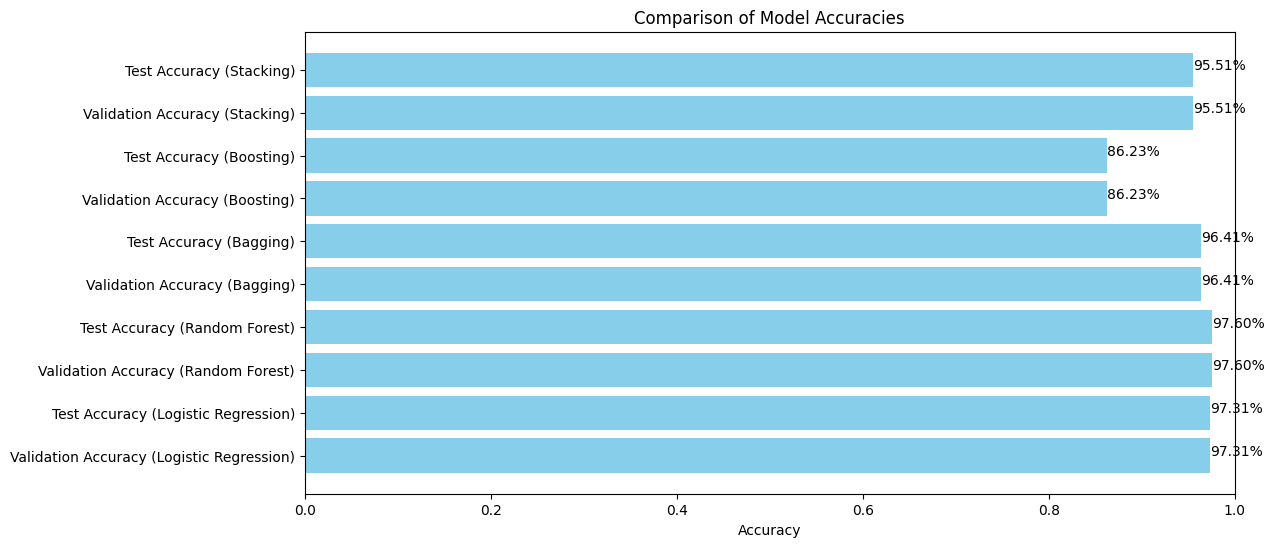

In [ ]:
import matplotlib.pyplot as plt

# Gather all accuracies
accuracies = {
    'Validation Accuracy (Logistic Regression)': val_accuracy_lr,
    'Test Accuracy (Logistic Regression)': test_accuracy_lr,
    'Validation Accuracy (Random Forest)': val_accuracy_rf,
    'Test Accuracy (Random Forest)': test_accuracy_rf,
    'Validation Accuracy (Bagging)': val_accuracy_bagging,
    'Test Accuracy (Bagging)': test_accuracy_bagging,
    'Validation Accuracy (Boosting)': val_accuracy_boosting,
    'Test Accuracy (Boosting)': test_accuracy_boosting,
    'Validation Accuracy (Stacking)': val_accuracy_stacking,
    'Test Accuracy (Stacking)': test_accuracy_stacking
}

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)
for index, value in enumerate(accuracies.values()):
    plt.text(value, index, f'{value:.2%}')
plt.show()


1/1 [==============================] - 0s 178ms/step


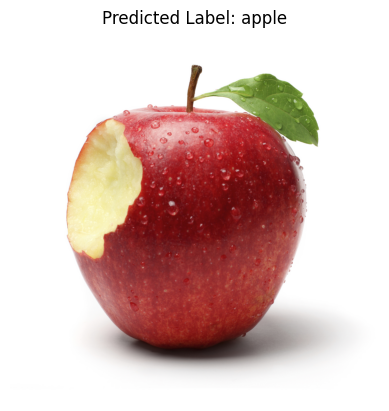

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/DataFruits/test/apple/Image_1.jpg'

def prepare_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

image = prepare_image(image_path)

image_features = pretrained_model.predict(image)

predicted_label_idx = stacking_model.predict(image_features)
predicted_label = label_encoder.inverse_transform(predicted_label_idx)[0]

img = load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()


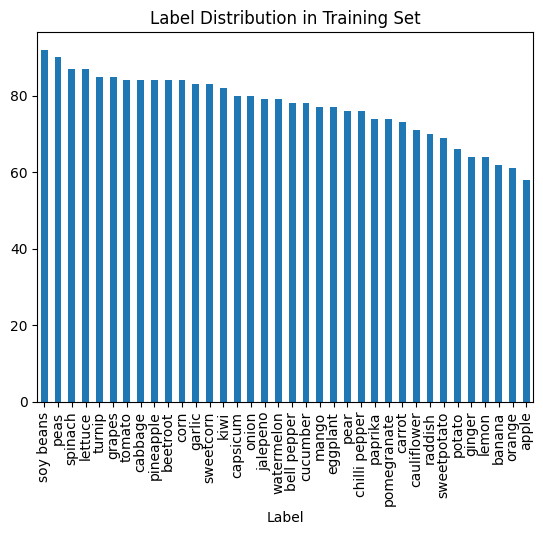

In [ ]:
train_df['Label'].value_counts().plot(kind='bar')
plt.title('Label Distribution in Training Set')
plt.show()


In [ ]:
features_1 = pretrained_model.predict(prepare_image('/content/drive/MyDrive/Colab Notebooks/DataFruits/test/eggplant/Image_1.jpg'))
features_2 = pretrained_model.predict(prepare_image('/content/drive/MyDrive/Colab Notebooks/DataFruits/test/grapes/Image_1.jpg'))

print('Feature 1:', features_1)
print('Feature 2:', features_2)
print('Are features different?', not np.allclose(features_1, features_2))


1/1 [==============================] - 0s 190ms/step
Feature 1: [[0.24357559 0.         0.01870618 ... 1.7970754  0.27172366 0.28411582]]
Feature 2: [[0.48943612 0.3208023  0.         ... 0.08788641 0.03397376 0.        ]]
Are features different? True


In [ ]:
model_with_reg = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial', penalty='l2', C=0.1)

model_with_reg.fit(train_features, train_labels)

train_predictions_with_reg = model_with_reg.predict(train_features)
train_accuracy_with_reg = accuracy_score(train_labels, train_predictions_with_reg)
print(f'Training accuracy after regularization: {train_accuracy_with_reg:.2%}')


Training accuracy after regularization: 99.35%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mô tả các đặc trưng đầu vào và đầu ra

Đầu vào:

Hình ảnh:

Định dạng: .jpg

Kích thước: Hình ảnh có kích thước ban đầu khác nhau, nhưng sẽ được thay đổi kích thước về (224, 224) khi tiền xử lý.

Nội dung: Hình ảnh của các loại trái cây khác nhau.

Filepaths:

Chuỗi ký tự: Đường dẫn đến các tệp hình ảnh trong thư mục huấn luyện, kiểm tra, và xác thực.

Đầu ra:

Labels (Nhãn):

Các chuỗi ký tự: Tên loại trái cây tương ứng với từng hình ảnh.

Đã được mã hóa thành số nguyên sử dụng LabelEncoder.

Features (Đặc trưng):

Mảng số thực: Đặc trưng trích xuất từ hình ảnh sử dụng mô hình MobileNetV2 pre-trained, mỗi đặc trưng có kích thước 1280 (vector đặc trưng cuối cùng từ MobileNetV2).

Phân tích về cấu trúc và tính chất dữ liệu

Cấu trúc:

Dữ liệu đầu vào là hình ảnh được lưu trữ dưới dạng các tệp .jpg.

Dữ liệu được chia thành ba tập: huấn luyện (train), kiểm tra (test), và xác thực (validation).

Mỗi tập dữ liệu được tổ chức trong các thư mục tương ứng với nhãn của trái cây, ví dụ: /train/apple/, /test/banana/.

Tính chất:


Hình ảnh có thể có sự biến đổi lớn về ánh sáng, góc chụp và nền.

Dữ liệu có thể không cân bằng, nghĩa là số lượng hình ảnh của mỗi loại trái cây có thể không đồng đều.

Đặc trưng đầu ra từ MobileNetV2 là các vector số thực có độ dài cố định (1280).

Các bước hoặc thao tác tiền xử lý dữ liệu trước khi đưa vào huấn luyện mô hình

1. Đọc và liệt kê các tệp hình ảnh:

Sử dụng os.walk để duyệt qua các thư mục và thu thập đường dẫn đến các tệp hình ảnh.

2. Tạo DataFrame từ danh sách các tệp hình ảnh:


Tạo các DataFrame chứa đường dẫn tệp và nhãn tương ứng với từng hình ảnh.
Ví dụ: train_df, val_df, test_df.

3. Tiền xử lý hình ảnh:

Thay đổi kích thước hình ảnh về (224, 224).

Chuẩn hóa hình ảnh sử dụng phương pháp chuẩn hóa của MobileNetV2 (tf.keras.applications.mobilenet_v2.preprocess_input).

4. Trích xuất đặc trưng từ hình ảnh:

Sử dụng mô hình MobileNetV2 pre-trained để trích xuất đặc trưng từ các hình ảnh đã tiền xử lý.

Đặc trưng trích xuất được lưu dưới dạng các mảng số thực (vector).
5. Mã hóa nhãn:

Sử dụng LabelEncoder để chuyển đổi nhãn từ chuỗi ký tự sang số nguyên.
Nhãn số nguyên được sử dụng làm đầu ra cho các mô hình học máy.
6. Trộn và chia nhỏ dữ liệu:


Trộn ngẫu nhiên các DataFrame để đảm bảo tính ngẫu nhiên của dữ liệu.

Chia nhỏ dữ liệu thành các tập huấn luyện, kiểm tra và xác thực.